In [1]:
pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=aebae24636d8e8fbf29c2e79d6f54f286154fc383e0b58db9ec1b86af6159ea1
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import torch
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision.models import mobilenet_v2 
import pickle
from cryptography.fernet import Fernet
import random
from tqdm import tqdm  # Add tqdm for live epoch updates
from imutils import paths
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
imagePaths = list(paths.list_images('/kaggle/input/autism'))

In [4]:
imagePaths

['/kaggle/input/autism/autism/validation/Autistic/45.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/20.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/30.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/38.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/42.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/33.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/10.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/35.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/41.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/03.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/37.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/46.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/44.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/01.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/50.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/29.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/16.jpg

In [5]:
# Define the transformation for the "autism" dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet-101 input size
    transforms.ToTensor()
])

In [6]:
# Load the "autism" dataset
train_dataset = ImageFolder('/kaggle/input/autism/autism/train', transform=transform)
test_dataset = ImageFolder('/kaggle/input/autism/autism/test', transform=transform)

# Print the length of the datasets
print(f"Number of samples in the training set: {len(train_dataset)}")
print(f"Number of samples in the test set: {len(test_dataset)}")

# Print the classes (categories) in the dataset
print(f"Classes in the dataset: {train_dataset.classes}")

# Print a few samples from the training set
for i in range(5):
    sample = train_dataset[i]
    print(f"Sample {i + 1}: Class {sample[1]}")

# Print a few samples from the test set
for i in range(5):
    sample = test_dataset[i]
    print(f"Sample {i + 1}: Class {sample[1]}")

Number of samples in the training set: 2540
Number of samples in the test set: 300
Classes in the dataset: ['Autistic', 'Non_Autistic']
Sample 1: Class 0
Sample 2: Class 0
Sample 3: Class 0
Sample 4: Class 0
Sample 5: Class 0
Sample 1: Class 0
Sample 2: Class 0
Sample 3: Class 0
Sample 4: Class 0
Sample 5: Class 0


In [7]:
# Define the device for computation (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
# Initialize the global model with MobileNetV2
global_model = mobilenet_v2(pretrained=True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 66.5MB/s]


In [9]:
# Adjust the classifier to match the number of classes in your dataset
num_classes = len(train_dataset.classes)
global_model.classifier[1] = torch.nn.Linear(global_model.classifier[1].in_features, num_classes)

global_model = global_model.to(device)

Communication Round 1


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:06<10:34,  6.40s/it]

Training Accuracy for Client 0 - Epoch 1: 58.27%
Training Loss for Client 0 - Epoch 1: 0.7210


Client 0:   2%|▏         | 2/100 [00:07<04:56,  3.03s/it]

Training Accuracy for Client 0 - Epoch 2: 78.35%
Training Loss for Client 0 - Epoch 2: 0.5084


Client 0:   3%|▎         | 3/100 [00:07<03:09,  1.95s/it]

Training Accuracy for Client 0 - Epoch 3: 70.08%
Training Loss for Client 0 - Epoch 3: 0.5177


Client 0:   4%|▍         | 4/100 [00:08<02:18,  1.45s/it]

Training Accuracy for Client 0 - Epoch 4: 87.01%
Training Loss for Client 0 - Epoch 4: 0.3507


Client 0:   5%|▌         | 5/100 [00:09<01:50,  1.17s/it]

Training Accuracy for Client 0 - Epoch 5: 95.67%
Training Loss for Client 0 - Epoch 5: 0.2137


Client 0:   6%|▌         | 6/100 [00:09<01:33,  1.00it/s]

Training Accuracy for Client 0 - Epoch 6: 96.06%
Training Loss for Client 0 - Epoch 6: 0.1808


Client 0:   7%|▋         | 7/100 [00:10<01:22,  1.12it/s]

Training Accuracy for Client 0 - Epoch 7: 99.61%
Training Loss for Client 0 - Epoch 7: 0.1111


Client 0:   8%|▊         | 8/100 [00:11<01:15,  1.22it/s]

Training Accuracy for Client 0 - Epoch 8: 98.03%
Training Loss for Client 0 - Epoch 8: 0.1034


Client 0:   9%|▉         | 9/100 [00:11<01:10,  1.30it/s]

Training Accuracy for Client 0 - Epoch 9: 99.21%
Training Loss for Client 0 - Epoch 9: 0.0684


Client 0:  10%|█         | 10/100 [00:12<01:06,  1.35it/s]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0388


Client 0:  11%|█         | 11/100 [00:13<01:03,  1.39it/s]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0265


Client 0:  12%|█▏        | 12/100 [00:13<01:01,  1.42it/s]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0294


Client 0:  13%|█▎        | 13/100 [00:14<01:00,  1.44it/s]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0272


Client 0:  14%|█▍        | 14/100 [00:15<00:58,  1.46it/s]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0203


Client 0:  15%|█▌        | 15/100 [00:15<00:57,  1.47it/s]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0265


Client 0:  16%|█▌        | 16/100 [00:16<00:56,  1.48it/s]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0130


Client 0:  17%|█▋        | 17/100 [00:17<00:55,  1.48it/s]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0086


Client 0:  18%|█▊        | 18/100 [00:17<00:55,  1.49it/s]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0098


Client 0:  19%|█▉        | 19/100 [00:18<00:54,  1.49it/s]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0151


Client 0:  20%|██        | 20/100 [00:19<00:53,  1.49it/s]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0102


Client 0:  21%|██        | 21/100 [00:19<00:52,  1.50it/s]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0102


Client 0:  22%|██▏       | 22/100 [00:20<00:52,  1.50it/s]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0105


Client 0:  23%|██▎       | 23/100 [00:21<00:51,  1.50it/s]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0044


Client 0:  24%|██▍       | 24/100 [00:21<00:50,  1.50it/s]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0051


Client 0:  25%|██▌       | 25/100 [00:22<00:50,  1.50it/s]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0188


Client 0:  26%|██▌       | 26/100 [00:23<00:49,  1.50it/s]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0056


Client 0:  27%|██▋       | 27/100 [00:23<00:48,  1.50it/s]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0073


Client 0:  28%|██▊       | 28/100 [00:24<00:48,  1.50it/s]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0108


Client 0:  29%|██▉       | 29/100 [00:25<00:47,  1.49it/s]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0032


Client 0:  30%|███       | 30/100 [00:25<00:46,  1.49it/s]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0049


Client 0:  31%|███       | 31/100 [00:26<00:46,  1.49it/s]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0113


Client 0:  32%|███▏      | 32/100 [00:27<00:45,  1.49it/s]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0033


Client 0:  33%|███▎      | 33/100 [00:27<00:44,  1.49it/s]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0039


Client 0:  34%|███▍      | 34/100 [00:28<00:44,  1.50it/s]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0022


Client 0:  35%|███▌      | 35/100 [00:29<00:43,  1.50it/s]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0029


Client 0:  36%|███▌      | 36/100 [00:29<00:42,  1.50it/s]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0020


Client 0:  37%|███▋      | 37/100 [00:30<00:42,  1.50it/s]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0045


Client 0:  38%|███▊      | 38/100 [00:31<00:41,  1.50it/s]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0048


Client 0:  39%|███▉      | 39/100 [00:31<00:40,  1.50it/s]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0051


Client 0:  40%|████      | 40/100 [00:32<00:40,  1.50it/s]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0021


Client 0:  41%|████      | 41/100 [00:33<00:39,  1.50it/s]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0019


Client 0:  42%|████▏     | 42/100 [00:33<00:38,  1.50it/s]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0015


Client 0:  43%|████▎     | 43/100 [00:34<00:38,  1.50it/s]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0027


Client 0:  44%|████▍     | 44/100 [00:35<00:37,  1.50it/s]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0024


Client 0:  45%|████▌     | 45/100 [00:35<00:36,  1.50it/s]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0028


Client 0:  46%|████▌     | 46/100 [00:36<00:36,  1.50it/s]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0014


Client 0:  47%|████▋     | 47/100 [00:37<00:35,  1.50it/s]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0021


Client 0:  48%|████▊     | 48/100 [00:37<00:34,  1.50it/s]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0016


Client 0:  49%|████▉     | 49/100 [00:38<00:34,  1.50it/s]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0043


Client 0:  50%|█████     | 50/100 [00:39<00:33,  1.50it/s]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0021


Client 0:  51%|█████     | 51/100 [00:39<00:32,  1.50it/s]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0035


Client 0:  52%|█████▏    | 52/100 [00:40<00:32,  1.50it/s]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0018


Client 0:  53%|█████▎    | 53/100 [00:41<00:31,  1.50it/s]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0015


Client 0:  54%|█████▍    | 54/100 [00:41<00:30,  1.50it/s]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0012


Client 0:  55%|█████▌    | 55/100 [00:42<00:30,  1.50it/s]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0027


Client 0:  56%|█████▌    | 56/100 [00:43<00:29,  1.50it/s]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0027


Client 0:  57%|█████▋    | 57/100 [00:43<00:28,  1.50it/s]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0021


Client 0:  58%|█████▊    | 58/100 [00:44<00:28,  1.50it/s]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0018


Client 0:  59%|█████▉    | 59/100 [00:45<00:27,  1.50it/s]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0009


Client 0:  60%|██████    | 60/100 [00:45<00:26,  1.50it/s]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0016


Client 0:  61%|██████    | 61/100 [00:46<00:26,  1.50it/s]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0014


Client 0:  62%|██████▏   | 62/100 [00:47<00:25,  1.50it/s]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0010


Client 0:  63%|██████▎   | 63/100 [00:47<00:24,  1.50it/s]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0014


Client 0:  64%|██████▍   | 64/100 [00:48<00:24,  1.50it/s]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0017


Client 0:  65%|██████▌   | 65/100 [00:49<00:23,  1.50it/s]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0023


Client 0:  66%|██████▌   | 66/100 [00:49<00:22,  1.50it/s]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0013


Client 0:  67%|██████▋   | 67/100 [00:50<00:22,  1.50it/s]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0016


Client 0:  68%|██████▊   | 68/100 [00:51<00:21,  1.50it/s]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0011


Client 0:  69%|██████▉   | 69/100 [00:51<00:20,  1.50it/s]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0010


Client 0:  70%|███████   | 70/100 [00:52<00:20,  1.50it/s]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0011


Client 0:  71%|███████   | 71/100 [00:53<00:19,  1.50it/s]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0007


Client 0:  72%|███████▏  | 72/100 [00:53<00:18,  1.50it/s]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0014


Client 0:  73%|███████▎  | 73/100 [00:54<00:18,  1.50it/s]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0024


Client 0:  74%|███████▍  | 74/100 [00:55<00:17,  1.49it/s]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0010


Client 0:  75%|███████▌  | 75/100 [00:55<00:16,  1.49it/s]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0015


Client 0:  76%|███████▌  | 76/100 [00:56<00:16,  1.49it/s]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0010


Client 0:  77%|███████▋  | 77/100 [00:57<00:15,  1.49it/s]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0015


Client 0:  78%|███████▊  | 78/100 [00:57<00:14,  1.49it/s]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0010


Client 0:  79%|███████▉  | 79/100 [00:58<00:14,  1.49it/s]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0009


Client 0:  80%|████████  | 80/100 [00:59<00:13,  1.49it/s]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0009


Client 0:  81%|████████  | 81/100 [00:59<00:12,  1.49it/s]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0024


Client 0:  82%|████████▏ | 82/100 [01:00<00:12,  1.50it/s]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0018


Client 0:  83%|████████▎ | 83/100 [01:01<00:11,  1.49it/s]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0008


Client 0:  84%|████████▍ | 84/100 [01:01<00:10,  1.50it/s]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0006


Client 0:  85%|████████▌ | 85/100 [01:02<00:10,  1.50it/s]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0007


Client 0:  86%|████████▌ | 86/100 [01:03<00:09,  1.49it/s]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0009


Client 0:  87%|████████▋ | 87/100 [01:03<00:08,  1.49it/s]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0009


Client 0:  88%|████████▊ | 88/100 [01:04<00:08,  1.49it/s]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0010


Client 0:  89%|████████▉ | 89/100 [01:05<00:07,  1.49it/s]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0012


Client 0:  90%|█████████ | 90/100 [01:05<00:06,  1.49it/s]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0029


Client 0:  91%|█████████ | 91/100 [01:06<00:06,  1.50it/s]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0004


Client 0:  92%|█████████▏| 92/100 [01:07<00:05,  1.50it/s]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0012


Client 0:  93%|█████████▎| 93/100 [01:07<00:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0004


Client 0:  94%|█████████▍| 94/100 [01:08<00:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0012


Client 0:  95%|█████████▌| 95/100 [01:09<00:03,  1.49it/s]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0011


Client 0:  96%|█████████▌| 96/100 [01:09<00:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0011


Client 0:  97%|█████████▋| 97/100 [01:10<00:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0010


Client 0:  98%|█████████▊| 98/100 [01:11<00:01,  1.50it/s]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0008


Client 0:  99%|█████████▉| 99/100 [01:11<00:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0006


Client 0: 100%|██████████| 100/100 [01:12<00:00,  1.38it/s]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0006


Testing Accuracy for Client 0: 78.33%
Testing Loss for Client 0: 0.6779
Precision for Client 0: 0.7943
Recall for Client 0: 0.7833
F1 Score for Client 0: 0.7813


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:00<01:07,  1.47it/s]

Training Accuracy for Client 1 - Epoch 1: 56.30%
Training Loss for Client 1 - Epoch 1: 0.7378


Client 1:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 1 - Epoch 2: 74.80%
Training Loss for Client 1 - Epoch 2: 0.5294


Client 1:   3%|▎         | 3/100 [00:02<01:05,  1.49it/s]

Training Accuracy for Client 1 - Epoch 3: 83.07%
Training Loss for Client 1 - Epoch 3: 0.4127


Client 1:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 1 - Epoch 4: 92.91%
Training Loss for Client 1 - Epoch 4: 0.2749


Client 1:   5%|▌         | 5/100 [00:03<01:03,  1.49it/s]

Training Accuracy for Client 1 - Epoch 5: 94.88%
Training Loss for Client 1 - Epoch 5: 0.2142


Client 1:   6%|▌         | 6/100 [00:04<01:03,  1.49it/s]

Training Accuracy for Client 1 - Epoch 6: 97.64%
Training Loss for Client 1 - Epoch 6: 0.1562


Client 1:   7%|▋         | 7/100 [00:04<01:02,  1.49it/s]

Training Accuracy for Client 1 - Epoch 7: 98.82%
Training Loss for Client 1 - Epoch 7: 0.1199


Client 1:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 1 - Epoch 8: 99.61%
Training Loss for Client 1 - Epoch 8: 0.0736


Client 1:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0512


Client 1:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 10: 98.82%
Training Loss for Client 1 - Epoch 10: 0.0755


Client 1:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0453


Client 1:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0349


Client 1:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0235


Client 1:  14%|█▍        | 14/100 [00:09<00:57,  1.49it/s]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0173


Client 1:  15%|█▌        | 15/100 [00:10<00:56,  1.49it/s]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0135


Client 1:  16%|█▌        | 16/100 [00:10<00:56,  1.49it/s]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0164


Client 1:  17%|█▋        | 17/100 [00:11<00:55,  1.49it/s]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0144


Client 1:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0130


Client 1:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0103


Client 1:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0076


Client 1:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0106


Client 1:  22%|██▏       | 22/100 [00:14<00:52,  1.49it/s]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0155


Client 1:  23%|██▎       | 23/100 [00:15<00:51,  1.49it/s]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0068


Client 1:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0084


Client 1:  25%|██▌       | 25/100 [00:16<00:50,  1.49it/s]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0051


Client 1:  26%|██▌       | 26/100 [00:17<00:49,  1.49it/s]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0066


Client 1:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0043


Client 1:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0051


Client 1:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0055


Client 1:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0035


Client 1:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0037


Client 1:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0028


Client 1:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0029


Client 1:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0039


Client 1:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0032


Client 1:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0032


Client 1:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0038


Client 1:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0039


Client 1:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0034


Client 1:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0024


Client 1:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0066


Client 1:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0033


Client 1:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0047


Client 1:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0021


Client 1:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0041


Client 1:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0017


Client 1:  47%|████▋     | 47/100 [00:31<00:35,  1.49it/s]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0020


Client 1:  48%|████▊     | 48/100 [00:32<00:34,  1.49it/s]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0032


Client 1:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0020


Client 1:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0016


Client 1:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0023


Client 1:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0023


Client 1:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0027


Client 1:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0020


Client 1:  55%|█████▌    | 55/100 [00:36<00:29,  1.50it/s]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0018


Client 1:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0012


Client 1:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0022


Client 1:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0016


Client 1:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0012


Client 1:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0022


Client 1:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0023


Client 1:  62%|██████▏   | 62/100 [00:41<00:25,  1.49it/s]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0019


Client 1:  63%|██████▎   | 63/100 [00:42<00:24,  1.49it/s]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0012


Client 1:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0037


Client 1:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0016


Client 1:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0021


Client 1:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0023


Client 1:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0023


Client 1:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0011


Client 1:  70%|███████   | 70/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0011


Client 1:  71%|███████   | 71/100 [00:47<00:19,  1.49it/s]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0013


Client 1:  72%|███████▏  | 72/100 [00:48<00:18,  1.49it/s]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0015


Client 1:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0015


Client 1:  74%|███████▍  | 74/100 [00:49<00:17,  1.49it/s]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0021


Client 1:  75%|███████▌  | 75/100 [00:50<00:16,  1.49it/s]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0016


Client 1:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0017


Client 1:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0009


Client 1:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0012


Client 1:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0026


Client 1:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0007


Client 1:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0020


Client 1:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0007


Client 1:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0009


Client 1:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0012


Client 1:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0005


Client 1:  86%|████████▌ | 86/100 [00:57<00:09,  1.49it/s]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0010


Client 1:  87%|████████▋ | 87/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0012


Client 1:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0007


Client 1:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0010


Client 1:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0010


Client 1:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0012


Client 1:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0014


Client 1:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0008


Client 1:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0016


Client 1:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0014


Client 1:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0007


Client 1:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0008


Client 1:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0012


Client 1:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0038


Client 1: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0009


Testing Accuracy for Client 1: 83.67%
Testing Loss for Client 1: 0.5154
Precision for Client 1: 0.8367
Recall for Client 1: 0.8367
F1 Score for Client 1: 0.8367


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 2 - Epoch 1: 55.91%
Training Loss for Client 2 - Epoch 1: 0.7293


Client 2:   2%|▏         | 2/100 [00:01<01:06,  1.48it/s]

Training Accuracy for Client 2 - Epoch 2: 76.38%
Training Loss for Client 2 - Epoch 2: 0.5112


Client 2:   3%|▎         | 3/100 [00:02<01:05,  1.48it/s]

Training Accuracy for Client 2 - Epoch 3: 81.10%
Training Loss for Client 2 - Epoch 3: 0.4335


Client 2:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 2 - Epoch 4: 87.80%
Training Loss for Client 2 - Epoch 4: 0.3215


Client 2:   5%|▌         | 5/100 [00:03<01:03,  1.49it/s]

Training Accuracy for Client 2 - Epoch 5: 94.09%
Training Loss for Client 2 - Epoch 5: 0.2078


Client 2:   6%|▌         | 6/100 [00:04<01:02,  1.49it/s]

Training Accuracy for Client 2 - Epoch 6: 97.24%
Training Loss for Client 2 - Epoch 6: 0.1692


Client 2:   7%|▋         | 7/100 [00:04<01:02,  1.49it/s]

Training Accuracy for Client 2 - Epoch 7: 98.03%
Training Loss for Client 2 - Epoch 7: 0.1277


Client 2:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 2 - Epoch 8: 99.21%
Training Loss for Client 2 - Epoch 8: 0.0778


Client 2:   9%|▉         | 9/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0601


Client 2:  10%|█         | 10/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0520


Client 2:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 2 - Epoch 11: 99.61%
Training Loss for Client 2 - Epoch 11: 0.0628


Client 2:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0368


Client 2:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0212


Client 2:  14%|█▍        | 14/100 [00:09<00:57,  1.49it/s]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0347


Client 2:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0145


Client 2:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0205


Client 2:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0145


Client 2:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0147


Client 2:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0120


Client 2:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0103


Client 2:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0133


Client 2:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0069


Client 2:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0130


Client 2:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0143


Client 2:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0042


Client 2:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0039


Client 2:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0045


Client 2:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0048


Client 2:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0044


Client 2:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0033


Client 2:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0036


Client 2:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0042


Client 2:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0033


Client 2:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0060


Client 2:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0047


Client 2:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0048


Client 2:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0036


Client 2:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0024


Client 2:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0051


Client 2:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0022


Client 2:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0032


Client 2:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0033


Client 2:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0027


Client 2:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0037


Client 2:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0025


Client 2:  46%|████▌     | 46/100 [00:30<00:35,  1.50it/s]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0017


Client 2:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0024


Client 2:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0021


Client 2:  49%|████▉     | 49/100 [00:32<00:34,  1.49it/s]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0015


Client 2:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0020


Client 2:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0026


Client 2:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0020


Client 2:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0020


Client 2:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0022


Client 2:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0018


Client 2:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0013


Client 2:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0037


Client 2:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0025


Client 2:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0020


Client 2:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0021


Client 2:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0011


Client 2:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0020


Client 2:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0019


Client 2:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0018


Client 2:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0019


Client 2:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0014


Client 2:  67%|██████▋   | 67/100 [00:44<00:22,  1.49it/s]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0029


Client 2:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0011


Client 2:  69%|██████▉   | 69/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0017


Client 2:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0010


Client 2:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0044


Client 2:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0020


Client 2:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0015


Client 2:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0020


Client 2:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0017


Client 2:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0008


Client 2:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0009


Client 2:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0009


Client 2:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0018


Client 2:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0008


Client 2:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0021


Client 2:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0009


Client 2:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0011


Client 2:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0007


Client 2:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0009


Client 2:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0007


Client 2:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0007


Client 2:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0007


Client 2:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0008


Client 2:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0006


Client 2:  91%|█████████ | 91/100 [01:00<00:05,  1.50it/s]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0010


Client 2:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0005


Client 2:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0009


Client 2:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0008


Client 2:  95%|█████████▌| 95/100 [01:03<00:03,  1.49it/s]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0011


Client 2:  96%|█████████▌| 96/100 [01:04<00:02,  1.49it/s]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0010


Client 2:  97%|█████████▋| 97/100 [01:04<00:02,  1.49it/s]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0011


Client 2:  98%|█████████▊| 98/100 [01:05<00:01,  1.49it/s]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0013


Client 2:  99%|█████████▉| 99/100 [01:06<00:00,  1.49it/s]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0006


Client 2: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0006


Testing Accuracy for Client 2: 77.67%
Testing Loss for Client 2: 0.7116
Precision for Client 2: 0.7768
Recall for Client 2: 0.7767
F1 Score for Client 2: 0.7766


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:00<01:07,  1.48it/s]

Training Accuracy for Client 3 - Epoch 1: 52.36%
Training Loss for Client 3 - Epoch 1: 0.8242


Client 3:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 3 - Epoch 2: 79.53%
Training Loss for Client 3 - Epoch 2: 0.5036


Client 3:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 3 - Epoch 3: 80.71%
Training Loss for Client 3 - Epoch 3: 0.4131


Client 3:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 3 - Epoch 4: 90.55%
Training Loss for Client 3 - Epoch 4: 0.2874


Client 3:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 3 - Epoch 5: 91.34%
Training Loss for Client 3 - Epoch 5: 0.2556


Client 3:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 6: 97.64%
Training Loss for Client 3 - Epoch 6: 0.1415


Client 3:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 7: 99.61%
Training Loss for Client 3 - Epoch 7: 0.0999


Client 3:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0632


Client 3:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0442


Client 3:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0403


Client 3:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0378


Client 3:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0258


Client 3:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0426


Client 3:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0175


Client 3:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0130


Client 3:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0115


Client 3:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0119


Client 3:  18%|█▊        | 18/100 [00:12<00:54,  1.49it/s]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0132


Client 3:  19%|█▉        | 19/100 [00:12<00:54,  1.49it/s]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0093


Client 3:  20%|██        | 20/100 [00:13<00:53,  1.49it/s]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0074


Client 3:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0072


Client 3:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0051


Client 3:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0170


Client 3:  24%|██▍       | 24/100 [00:16<00:50,  1.49it/s]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0077


Client 3:  25%|██▌       | 25/100 [00:16<00:50,  1.49it/s]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0054


Client 3:  26%|██▌       | 26/100 [00:17<00:49,  1.49it/s]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0069


Client 3:  27%|██▋       | 27/100 [00:18<00:48,  1.49it/s]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0107


Client 3:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0047


Client 3:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0034


Client 3:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0057


Client 3:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0037


Client 3:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0029


Client 3:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0030


Client 3:  34%|███▍      | 34/100 [00:22<00:43,  1.50it/s]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0031


Client 3:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0035


Client 3:  36%|███▌      | 36/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0049


Client 3:  37%|███▋      | 37/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0027


Client 3:  38%|███▊      | 38/100 [00:25<00:41,  1.49it/s]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0026


Client 3:  39%|███▉      | 39/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0030


Client 3:  40%|████      | 40/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0024


Client 3:  41%|████      | 41/100 [00:27<00:39,  1.49it/s]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0092


Client 3:  42%|████▏     | 42/100 [00:28<00:38,  1.49it/s]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0059


Client 3:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0018


Client 3:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0023


Client 3:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0050


Client 3:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0041


Client 3:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0052


Client 3:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0053


Client 3:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0034


Client 3:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0023


Client 3:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0064


Client 3:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0037


Client 3:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0015


Client 3:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0028


Client 3:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0025


Client 3:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0014


Client 3:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0029


Client 3:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0026


Client 3:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0010


Client 3:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0013


Client 3:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0012


Client 3:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0022


Client 3:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0028


Client 3:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0023


Client 3:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0009


Client 3:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0008


Client 3:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0026


Client 3:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0020


Client 3:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0013


Client 3:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0028


Client 3:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0008


Client 3:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0014


Client 3:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0010


Client 3:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0016


Client 3:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0024


Client 3:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0011


Client 3:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0012


Client 3:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0008


Client 3:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0011


Client 3:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0030


Client 3:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0005


Client 3:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0010


Client 3:  83%|████████▎ | 83/100 [00:55<00:11,  1.49it/s]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0011


Client 3:  84%|████████▍ | 84/100 [00:56<00:10,  1.49it/s]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0009


Client 3:  85%|████████▌ | 85/100 [00:56<00:10,  1.49it/s]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0007


Client 3:  86%|████████▌ | 86/100 [00:57<00:09,  1.49it/s]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0011


Client 3:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0006


Client 3:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0008


Client 3:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0012


Client 3:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0005


Client 3:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0008


Client 3:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0009


Client 3:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0006


Client 3:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0027


Client 3:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0006


Client 3:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0006


Client 3:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0007


Client 3:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0011


Client 3:  99%|█████████▉| 99/100 [01:06<00:00,  1.49it/s]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0006


Client 3: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0016


Testing Accuracy for Client 3: 80.33%
Testing Loss for Client 3: 0.5912
Precision for Client 3: 0.8044
Recall for Client 3: 0.8033
F1 Score for Client 3: 0.8032


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:00<01:06,  1.49it/s]

Training Accuracy for Client 4 - Epoch 1: 49.21%
Training Loss for Client 4 - Epoch 1: 0.7581


Client 4:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 4 - Epoch 2: 77.56%
Training Loss for Client 4 - Epoch 2: 0.5159


Client 4:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 4 - Epoch 3: 76.38%
Training Loss for Client 4 - Epoch 3: 0.4629


Client 4:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 4 - Epoch 4: 92.13%
Training Loss for Client 4 - Epoch 4: 0.2620


Client 4:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 4 - Epoch 5: 94.88%
Training Loss for Client 4 - Epoch 5: 0.2006


Client 4:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 6: 96.85%
Training Loss for Client 4 - Epoch 6: 0.1287


Client 4:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 7: 98.82%
Training Loss for Client 4 - Epoch 7: 0.1139


Client 4:   8%|▊         | 8/100 [00:05<01:01,  1.49it/s]

Training Accuracy for Client 4 - Epoch 8: 99.61%
Training Loss for Client 4 - Epoch 8: 0.0578


Client 4:   9%|▉         | 9/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0514


Client 4:  10%|█         | 10/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0409


Client 4:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0301


Client 4:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0205


Client 4:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0264


Client 4:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0247


Client 4:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0263


Client 4:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0169


Client 4:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0111


Client 4:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0077


Client 4:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0073


Client 4:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0121


Client 4:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0070


Client 4:  22%|██▏       | 22/100 [00:14<00:51,  1.50it/s]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0056


Client 4:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0057


Client 4:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0068


Client 4:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0058


Client 4:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0062


Client 4:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0035


Client 4:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0061


Client 4:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0038


Client 4:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0039


Client 4:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0042


Client 4:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0060


Client 4:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0032


Client 4:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0032


Client 4:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0075


Client 4:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0035


Client 4:  37%|███▋      | 37/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0028


Client 4:  38%|███▊      | 38/100 [00:25<00:41,  1.49it/s]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0055


Client 4:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0027


Client 4:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0031


Client 4:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0029


Client 4:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0017


Client 4:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0023


Client 4:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0043


Client 4:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0021


Client 4:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0027


Client 4:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0045


Client 4:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0023


Client 4:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0032


Client 4:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0017


Client 4:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0028


Client 4:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0023


Client 4:  53%|█████▎    | 53/100 [00:35<00:31,  1.49it/s]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0020


Client 4:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0015


Client 4:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0021


Client 4:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0017


Client 4:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0015


Client 4:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0010


Client 4:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0023


Client 4:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0016


Client 4:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0016


Client 4:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0009


Client 4:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0011


Client 4:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0019


Client 4:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0012


Client 4:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0048


Client 4:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0022


Client 4:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0017


Client 4:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0013


Client 4:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0023


Client 4:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0012


Client 4:  72%|███████▏  | 72/100 [00:48<00:18,  1.49it/s]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0012


Client 4:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0018


Client 4:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0013


Client 4:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0019


Client 4:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0007


Client 4:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0017


Client 4:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0023


Client 4:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0007


Client 4:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0014


Client 4:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0008


Client 4:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0007


Client 4:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0015


Client 4:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0007


Client 4:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0008


Client 4:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0008


Client 4:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0011


Client 4:  88%|████████▊ | 88/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0008


Client 4:  89%|████████▉ | 89/100 [00:59<00:07,  1.49it/s]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0014


Client 4:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0015


Client 4:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0010


Client 4:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0006


Client 4:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0006


Client 4:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0010


Client 4:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0005


Client 4:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0009


Client 4:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0011


Client 4:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0010


Client 4:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0008


Client 4: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0007


Testing Accuracy for Client 4: 84.00%
Testing Loss for Client 4: 0.5726
Precision for Client 4: 0.8410
Recall for Client 4: 0.8400
F1 Score for Client 4: 0.8399


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:00<01:07,  1.47it/s]

Training Accuracy for Client 5 - Epoch 1: 55.51%
Training Loss for Client 5 - Epoch 1: 0.7180


Client 5:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 5 - Epoch 2: 72.44%
Training Loss for Client 5 - Epoch 2: 0.5561


Client 5:   3%|▎         | 3/100 [00:02<01:05,  1.49it/s]

Training Accuracy for Client 5 - Epoch 3: 81.89%
Training Loss for Client 5 - Epoch 3: 0.4277


Client 5:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 5 - Epoch 4: 89.37%
Training Loss for Client 5 - Epoch 4: 0.3252


Client 5:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 5 - Epoch 5: 91.73%
Training Loss for Client 5 - Epoch 5: 0.2674


Client 5:   6%|▌         | 6/100 [00:04<01:02,  1.49it/s]

Training Accuracy for Client 5 - Epoch 6: 94.09%
Training Loss for Client 5 - Epoch 6: 0.2233


Client 5:   7%|▋         | 7/100 [00:04<01:02,  1.49it/s]

Training Accuracy for Client 5 - Epoch 7: 96.85%
Training Loss for Client 5 - Epoch 7: 0.1457


Client 5:   8%|▊         | 8/100 [00:05<01:01,  1.49it/s]

Training Accuracy for Client 5 - Epoch 8: 98.82%
Training Loss for Client 5 - Epoch 8: 0.0931


Client 5:   9%|▉         | 9/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 5 - Epoch 9: 99.61%
Training Loss for Client 5 - Epoch 9: 0.0609


Client 5:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0491


Client 5:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 5 - Epoch 11: 99.61%
Training Loss for Client 5 - Epoch 11: 0.0507


Client 5:  12%|█▏        | 12/100 [00:08<00:58,  1.49it/s]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0314


Client 5:  13%|█▎        | 13/100 [00:08<00:58,  1.49it/s]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0255


Client 5:  14%|█▍        | 14/100 [00:09<00:57,  1.49it/s]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0200


Client 5:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0159


Client 5:  16%|█▌        | 16/100 [00:10<00:56,  1.49it/s]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0173


Client 5:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0210


Client 5:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0138


Client 5:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0117


Client 5:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 5 - Epoch 20: 99.61%
Training Loss for Client 5 - Epoch 20: 0.0336


Client 5:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0193


Client 5:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0116


Client 5:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0067


Client 5:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0075


Client 5:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0058


Client 5:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0085


Client 5:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0062


Client 5:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0083


Client 5:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0083


Client 5:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0040


Client 5:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0024


Client 5:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0077


Client 5:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0028


Client 5:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0032


Client 5:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0025


Client 5:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0031


Client 5:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0021


Client 5:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0114


Client 5:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0052


Client 5:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0020


Client 5:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0030


Client 5:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0093


Client 5:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0032


Client 5:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0015


Client 5:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0026


Client 5:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0019


Client 5:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0018


Client 5:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0020


Client 5:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0019


Client 5:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0019


Client 5:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0018


Client 5:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0041


Client 5:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0011


Client 5:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0012


Client 5:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0018


Client 5:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0013


Client 5:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0011


Client 5:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0025


Client 5:  59%|█████▉    | 59/100 [00:39<00:27,  1.49it/s]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0023


Client 5:  60%|██████    | 60/100 [00:40<00:26,  1.49it/s]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0011


Client 5:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0007


Client 5:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0031


Client 5:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0015


Client 5:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0023


Client 5:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0017


Client 5:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0016


Client 5:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0012


Client 5:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0013


Client 5:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0013


Client 5:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0025


Client 5:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0018


Client 5:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0032


Client 5:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0031


Client 5:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0010


Client 5:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0013


Client 5:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0013


Client 5:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0011


Client 5:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0016


Client 5:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0011


Client 5:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0010


Client 5:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0006


Client 5:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0025


Client 5:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0009


Client 5:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0006


Client 5:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0006


Client 5:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0010


Client 5:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0016


Client 5:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0006


Client 5:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0008


Client 5:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0006


Client 5:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0008


Client 5:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0009


Client 5:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0012


Client 5:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0007


Client 5:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0012


Client 5:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0007


Client 5:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0011


Client 5:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0013


Client 5:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0012


Client 5: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0004


Testing Accuracy for Client 5: 74.67%
Testing Loss for Client 5: 0.7143
Precision for Client 5: 0.7468
Recall for Client 5: 0.7467
F1 Score for Client 5: 0.7466


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:00<01:07,  1.47it/s]

Training Accuracy for Client 6 - Epoch 1: 51.97%
Training Loss for Client 6 - Epoch 1: 0.8371


Client 6:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 6 - Epoch 2: 66.54%
Training Loss for Client 6 - Epoch 2: 0.5908


Client 6:   3%|▎         | 3/100 [00:02<01:05,  1.49it/s]

Training Accuracy for Client 6 - Epoch 3: 78.74%
Training Loss for Client 6 - Epoch 3: 0.4408


Client 6:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 6 - Epoch 4: 90.55%
Training Loss for Client 6 - Epoch 4: 0.2870


Client 6:   5%|▌         | 5/100 [00:03<01:03,  1.49it/s]

Training Accuracy for Client 6 - Epoch 5: 96.46%
Training Loss for Client 6 - Epoch 5: 0.1906


Client 6:   6%|▌         | 6/100 [00:04<01:03,  1.49it/s]

Training Accuracy for Client 6 - Epoch 6: 95.67%
Training Loss for Client 6 - Epoch 6: 0.1634


Client 6:   7%|▋         | 7/100 [00:04<01:02,  1.49it/s]

Training Accuracy for Client 6 - Epoch 7: 98.82%
Training Loss for Client 6 - Epoch 7: 0.0979


Client 6:   8%|▊         | 8/100 [00:05<01:01,  1.49it/s]

Training Accuracy for Client 6 - Epoch 8: 99.61%
Training Loss for Client 6 - Epoch 8: 0.0905


Client 6:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0499


Client 6:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 10: 99.61%
Training Loss for Client 6 - Epoch 10: 0.0510


Client 6:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0284


Client 6:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0292


Client 6:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0202


Client 6:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0218


Client 6:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0135


Client 6:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0183


Client 6:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0093


Client 6:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0118


Client 6:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0111


Client 6:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0072


Client 6:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0070


Client 6:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0068


Client 6:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0084


Client 6:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0060


Client 6:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0070


Client 6:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0048


Client 6:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0053


Client 6:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0038


Client 6:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0044


Client 6:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0042


Client 6:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0059


Client 6:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0057


Client 6:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0025


Client 6:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0064


Client 6:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0065


Client 6:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0035


Client 6:  37%|███▋      | 37/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0033


Client 6:  38%|███▊      | 38/100 [00:25<00:41,  1.49it/s]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0040


Client 6:  39%|███▉      | 39/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0018


Client 6:  40%|████      | 40/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0026


Client 6:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0034


Client 6:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0029


Client 6:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0043


Client 6:  44%|████▍     | 44/100 [00:29<00:37,  1.49it/s]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0024


Client 6:  45%|████▌     | 45/100 [00:30<00:36,  1.49it/s]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0014


Client 6:  46%|████▌     | 46/100 [00:30<00:36,  1.48it/s]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0018


Client 6:  47%|████▋     | 47/100 [00:31<00:35,  1.49it/s]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0024


Client 6:  48%|████▊     | 48/100 [00:32<00:34,  1.49it/s]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0047


Client 6:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0020


Client 6:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0021


Client 6:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0014


Client 6:  52%|█████▏    | 52/100 [00:34<00:32,  1.49it/s]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0016


Client 6:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0020


Client 6:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0012


Client 6:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0036


Client 6:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0019


Client 6:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0024


Client 6:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0019


Client 6:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0013


Client 6:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0024


Client 6:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0011


Client 6:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0028


Client 6:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0008


Client 6:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0023


Client 6:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0015


Client 6:  66%|██████▌   | 66/100 [00:44<00:22,  1.49it/s]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0017


Client 6:  67%|██████▋   | 67/100 [00:44<00:22,  1.49it/s]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0009


Client 6:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0011


Client 6:  69%|██████▉   | 69/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0014


Client 6:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0011


Client 6:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0010


Client 6:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0016


Client 6:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0011


Client 6:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0009


Client 6:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0009


Client 6:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0010


Client 6:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0028


Client 6:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0010


Client 6:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0007


Client 6:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0028


Client 6:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0008


Client 6:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0014


Client 6:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0011


Client 6:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0010


Client 6:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0026


Client 6:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0012


Client 6:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0009


Client 6:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0009


Client 6:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0008


Client 6:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0005


Client 6:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0009


Client 6:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0017


Client 6:  93%|█████████▎| 93/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0011


Client 6:  94%|█████████▍| 94/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0007


Client 6:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0006


Client 6:  96%|█████████▌| 96/100 [01:04<00:02,  1.49it/s]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0008


Client 6:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0011


Client 6:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0004


Client 6:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0005


Client 6: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0008


Testing Accuracy for Client 6: 82.67%
Testing Loss for Client 6: 0.5833
Precision for Client 6: 0.8281
Recall for Client 6: 0.8267
F1 Score for Client 6: 0.8265


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 7 - Epoch 1: 50.00%
Training Loss for Client 7 - Epoch 1: 0.7778


Client 7:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 7 - Epoch 2: 70.08%
Training Loss for Client 7 - Epoch 2: 0.5717


Client 7:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 7 - Epoch 3: 81.10%
Training Loss for Client 7 - Epoch 3: 0.4320


Client 7:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 7 - Epoch 4: 89.76%
Training Loss for Client 7 - Epoch 4: 0.3198


Client 7:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 7 - Epoch 5: 89.37%
Training Loss for Client 7 - Epoch 5: 0.2744


Client 7:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 6: 97.64%
Training Loss for Client 7 - Epoch 6: 0.1690


Client 7:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 7: 99.61%
Training Loss for Client 7 - Epoch 7: 0.1126


Client 7:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 7 - Epoch 8: 97.64%
Training Loss for Client 7 - Epoch 8: 0.1141


Client 7:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0651


Client 7:  10%|█         | 10/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0427


Client 7:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0370


Client 7:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0278


Client 7:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0285


Client 7:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0200


Client 7:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0158


Client 7:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0169


Client 7:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0122


Client 7:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0091


Client 7:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0120


Client 7:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 7 - Epoch 20: 99.61%
Training Loss for Client 7 - Epoch 20: 0.0343


Client 7:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0113


Client 7:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0129


Client 7:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0052


Client 7:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0064


Client 7:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0062


Client 7:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0049


Client 7:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0049


Client 7:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0106


Client 7:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0032


Client 7:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0038


Client 7:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0032


Client 7:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0049


Client 7:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0022


Client 7:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0035


Client 7:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0023


Client 7:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0034


Client 7:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0029


Client 7:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0034


Client 7:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0040


Client 7:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0022


Client 7:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0031


Client 7:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0046


Client 7:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0036


Client 7:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0022


Client 7:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0074


Client 7:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0027


Client 7:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0021


Client 7:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0030


Client 7:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0014


Client 7:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0017


Client 7:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0030


Client 7:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0019


Client 7:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0019


Client 7:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0016


Client 7:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0015


Client 7:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0017


Client 7:  57%|█████▋    | 57/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0019


Client 7:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0019


Client 7:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0028


Client 7:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0014


Client 7:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0016


Client 7:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0010


Client 7:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0014


Client 7:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0016


Client 7:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0019


Client 7:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0012


Client 7:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0009


Client 7:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0013


Client 7:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0011


Client 7:  70%|███████   | 70/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0010


Client 7:  71%|███████   | 71/100 [00:47<00:19,  1.49it/s]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0011


Client 7:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0009


Client 7:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0009


Client 7:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0010


Client 7:  75%|███████▌  | 75/100 [00:50<00:16,  1.49it/s]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0028


Client 7:  76%|███████▌  | 76/100 [00:50<00:16,  1.49it/s]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0011


Client 7:  77%|███████▋  | 77/100 [00:51<00:15,  1.49it/s]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0013


Client 7:  78%|███████▊  | 78/100 [00:52<00:14,  1.49it/s]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0027


Client 7:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0007


Client 7:  80%|████████  | 80/100 [00:53<00:13,  1.49it/s]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0007


Client 7:  81%|████████  | 81/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0012


Client 7:  82%|████████▏ | 82/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0008


Client 7:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0013


Client 7:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0078


Client 7:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0015


Client 7:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0010


Client 7:  87%|████████▋ | 87/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0008


Client 7:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0008


Client 7:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0015


Client 7:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0008


Client 7:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0013


Client 7:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0009


Client 7:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0017


Client 7:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0011


Client 7:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0011


Client 7:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0005


Client 7:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0024


Client 7:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0009


Client 7:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0008


Client 7: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0005


Testing Accuracy for Client 7: 81.00%
Testing Loss for Client 7: 0.6052
Precision for Client 7: 0.8100
Recall for Client 7: 0.8100
F1 Score for Client 7: 0.8100


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:00<01:06,  1.49it/s]

Training Accuracy for Client 8 - Epoch 1: 57.09%
Training Loss for Client 8 - Epoch 1: 0.6921


Client 8:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 8 - Epoch 2: 78.74%
Training Loss for Client 8 - Epoch 2: 0.4932


Client 8:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 3: 84.65%
Training Loss for Client 8 - Epoch 3: 0.3751


Client 8:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 4: 87.40%
Training Loss for Client 8 - Epoch 4: 0.3335


Client 8:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 8 - Epoch 5: 97.64%
Training Loss for Client 8 - Epoch 5: 0.1913


Client 8:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 6: 98.43%
Training Loss for Client 8 - Epoch 6: 0.1308


Client 8:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 7: 99.61%
Training Loss for Client 8 - Epoch 7: 0.0981


Client 8:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0855


Client 8:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0467


Client 8:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0410


Client 8:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0390


Client 8:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0238


Client 8:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0155


Client 8:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0181


Client 8:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0171


Client 8:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0129


Client 8:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0090


Client 8:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0083


Client 8:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0106


Client 8:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0121


Client 8:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0087


Client 8:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0072


Client 8:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0057


Client 8:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0046


Client 8:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0063


Client 8:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0067


Client 8:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0050


Client 8:  28%|██▊       | 28/100 [00:18<00:47,  1.50it/s]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0045


Client 8:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0032


Client 8:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0032


Client 8:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0039


Client 8:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0033


Client 8:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0053


Client 8:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0062


Client 8:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0025


Client 8:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0051


Client 8:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0048


Client 8:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0029


Client 8:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0037


Client 8:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0022


Client 8:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0030


Client 8:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0031


Client 8:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0041


Client 8:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0020


Client 8:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0036


Client 8:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0042


Client 8:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0036


Client 8:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0027


Client 8:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0030


Client 8:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0015


Client 8:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0017


Client 8:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0042


Client 8:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0017


Client 8:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0023


Client 8:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0022


Client 8:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0015


Client 8:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0030


Client 8:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0028


Client 8:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0033


Client 8:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0026


Client 8:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0011


Client 8:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0007


Client 8:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0014


Client 8:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0008


Client 8:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0023


Client 8:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0010


Client 8:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0015


Client 8:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0012


Client 8:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0011


Client 8:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0015


Client 8:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0017


Client 8:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0012


Client 8:  73%|███████▎  | 73/100 [00:48<00:17,  1.50it/s]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0013


Client 8:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0015


Client 8:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0006


Client 8:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0011


Client 8:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0008


Client 8:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0021


Client 8:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0012


Client 8:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0011


Client 8:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0014


Client 8:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0007


Client 8:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0024


Client 8:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0006


Client 8:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0012


Client 8:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0011


Client 8:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0009


Client 8:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0025


Client 8:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0008


Client 8:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0006


Client 8:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0040


Client 8:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0008


Client 8:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0015


Client 8:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0009


Client 8:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0009


Client 8:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0006


Client 8:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0006


Client 8:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0004


Client 8:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0010


Client 8: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0014


Testing Accuracy for Client 8: 79.00%
Testing Loss for Client 8: 0.6907
Precision for Client 8: 0.7901
Recall for Client 8: 0.7900
F1 Score for Client 8: 0.7900


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:00<01:06,  1.49it/s]

Training Accuracy for Client 9 - Epoch 1: 56.69%
Training Loss for Client 9 - Epoch 1: 0.6801


Client 9:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 9 - Epoch 2: 60.24%
Training Loss for Client 9 - Epoch 2: 0.6881


Client 9:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 3: 78.74%
Training Loss for Client 9 - Epoch 3: 0.4315


Client 9:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 4: 88.98%
Training Loss for Client 9 - Epoch 4: 0.3066


Client 9:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 9 - Epoch 5: 94.88%
Training Loss for Client 9 - Epoch 5: 0.2322


Client 9:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 6: 98.03%
Training Loss for Client 9 - Epoch 6: 0.1573


Client 9:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 7: 98.82%
Training Loss for Client 9 - Epoch 7: 0.1256


Client 9:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 9 - Epoch 8: 99.61%
Training Loss for Client 9 - Epoch 8: 0.0849


Client 9:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0652


Client 9:  10%|█         | 10/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0393


Client 9:  11%|█         | 11/100 [00:07<00:59,  1.49it/s]

Training Accuracy for Client 9 - Epoch 11: 99.61%
Training Loss for Client 9 - Epoch 11: 0.0567


Client 9:  12%|█▏        | 12/100 [00:08<00:58,  1.49it/s]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0311


Client 9:  13%|█▎        | 13/100 [00:08<00:58,  1.49it/s]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0266


Client 9:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0256


Client 9:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0166


Client 9:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0175


Client 9:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0118


Client 9:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0116


Client 9:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0099


Client 9:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0137


Client 9:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0093


Client 9:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0064


Client 9:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0097


Client 9:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0059


Client 9:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0061


Client 9:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0074


Client 9:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0074


Client 9:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0051


Client 9:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0035


Client 9:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0171


Client 9:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0046


Client 9:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0112


Client 9:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0046


Client 9:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0044


Client 9:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0248


Client 9:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0042


Client 9:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0024


Client 9:  38%|███▊      | 38/100 [00:25<00:41,  1.49it/s]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0028


Client 9:  39%|███▉      | 39/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0048


Client 9:  40%|████      | 40/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0023


Client 9:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0022


Client 9:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0032


Client 9:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0036


Client 9:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0060


Client 9:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0022


Client 9:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0022


Client 9:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0024


Client 9:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0028


Client 9:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0028


Client 9:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0016


Client 9:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0013


Client 9:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0031


Client 9:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0015


Client 9:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0015


Client 9:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0016


Client 9:  56%|█████▌    | 56/100 [00:37<00:29,  1.49it/s]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0013


Client 9:  57%|█████▋    | 57/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0015


Client 9:  58%|█████▊    | 58/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0014


Client 9:  59%|█████▉    | 59/100 [00:39<00:27,  1.49it/s]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0028


Client 9:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0013


Client 9:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0031


Client 9:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0021


Client 9:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0031


Client 9:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0011


Client 9:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0014


Client 9:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0012


Client 9:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0017


Client 9:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0011


Client 9:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0012


Client 9:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0010


Client 9:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0013


Client 9:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0020


Client 9:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0009


Client 9:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0007


Client 9:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0014


Client 9:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0010


Client 9:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0013


Client 9:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0010


Client 9:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0036


Client 9:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0009


Client 9:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0007


Client 9:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0009


Client 9:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0008


Client 9:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0037


Client 9:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0006


Client 9:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0013


Client 9:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0010


Client 9:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0008


Client 9:  89%|████████▉ | 89/100 [00:59<00:07,  1.49it/s]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0009


Client 9:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0016


Client 9:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0006


Client 9:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0020


Client 9:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0009


Client 9:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0008


Client 9:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0006


Client 9:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0010


Client 9:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0007


Client 9:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0007


Client 9:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0006


Client 9: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0008


Testing Accuracy for Client 9: 78.67%
Testing Loss for Client 9: 0.5963
Precision for Client 9: 0.7909
Recall for Client 9: 0.7867
F1 Score for Client 9: 0.7859
Communication Round 2


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 0 - Epoch 1: 87.40%
Training Loss for Client 0 - Epoch 1: 0.3483


Client 0:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 0 - Epoch 2: 95.67%
Training Loss for Client 0 - Epoch 2: 0.0904


Client 0:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 3: 100.00%
Training Loss for Client 0 - Epoch 3: 0.0397


Client 0:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 4: 100.00%
Training Loss for Client 0 - Epoch 4: 0.0181


Client 0:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 0 - Epoch 5: 100.00%
Training Loss for Client 0 - Epoch 5: 0.0219


Client 0:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 6: 99.61%
Training Loss for Client 0 - Epoch 6: 0.0287


Client 0:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0133


Client 0:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0161


Client 0:   9%|▉         | 9/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0078


Client 0:  10%|█         | 10/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0144


Client 0:  11%|█         | 11/100 [00:07<00:59,  1.49it/s]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0038


Client 0:  12%|█▏        | 12/100 [00:08<00:58,  1.49it/s]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0075


Client 0:  13%|█▎        | 13/100 [00:08<00:58,  1.49it/s]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0145


Client 0:  14%|█▍        | 14/100 [00:09<00:57,  1.49it/s]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0037


Client 0:  15%|█▌        | 15/100 [00:10<00:56,  1.49it/s]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0035


Client 0:  16%|█▌        | 16/100 [00:10<00:56,  1.49it/s]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0049


Client 0:  17%|█▋        | 17/100 [00:11<00:55,  1.49it/s]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0052


Client 0:  18%|█▊        | 18/100 [00:12<00:54,  1.49it/s]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0022


Client 0:  19%|█▉        | 19/100 [00:12<00:54,  1.49it/s]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0037


Client 0:  20%|██        | 20/100 [00:13<00:53,  1.49it/s]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0028


Client 0:  21%|██        | 21/100 [00:14<00:52,  1.49it/s]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0016


Client 0:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0034


Client 0:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0029


Client 0:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0016


Client 0:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0024


Client 0:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0023


Client 0:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0018


Client 0:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0030


Client 0:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0065


Client 0:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0015


Client 0:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0021


Client 0:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0037


Client 0:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0013


Client 0:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0084


Client 0:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0017


Client 0:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0013


Client 0:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0012


Client 0:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0015


Client 0:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0009


Client 0:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0009


Client 0:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0012


Client 0:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0013


Client 0:  43%|████▎     | 43/100 [00:28<00:37,  1.50it/s]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0009


Client 0:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0036


Client 0:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0007


Client 0:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0013


Client 0:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0006


Client 0:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0019


Client 0:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0008


Client 0:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0019


Client 0:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0009


Client 0:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0010


Client 0:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0007


Client 0:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0007


Client 0:  55%|█████▌    | 55/100 [00:36<00:30,  1.49it/s]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0015


Client 0:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0011


Client 0:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0009


Client 0:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0009


Client 0:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0010


Client 0:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0011


Client 0:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0010


Client 0:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0015


Client 0:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0010


Client 0:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0009


Client 0:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0008


Client 0:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0007


Client 0:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0032


Client 0:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0007


Client 0:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0009


Client 0:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0004


Client 0:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0007


Client 0:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0006


Client 0:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0006


Client 0:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0016


Client 0:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0009


Client 0:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0003


Client 0:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0004


Client 0:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0008


Client 0:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0004


Client 0:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0004


Client 0:  81%|████████  | 81/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0003


Client 0:  82%|████████▏ | 82/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0005


Client 0:  83%|████████▎ | 83/100 [00:55<00:11,  1.49it/s]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0006


Client 0:  84%|████████▍ | 84/100 [00:56<00:10,  1.49it/s]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0007


Client 0:  85%|████████▌ | 85/100 [00:56<00:10,  1.49it/s]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0006


Client 0:  86%|████████▌ | 86/100 [00:57<00:09,  1.49it/s]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0003


Client 0:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0006


Client 0:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0005


Client 0:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0007


Client 0:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0004


Client 0:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0008


Client 0:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0006


Client 0:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0004


Client 0:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0003


Client 0:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0004


Client 0:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0004


Client 0:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0004


Client 0:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0009


Client 0:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0003


Client 0: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0008


Testing Accuracy for Client 0: 86.00%
Testing Loss for Client 0: 0.5779
Precision for Client 0: 0.8603
Recall for Client 0: 0.8600
F1 Score for Client 0: 0.8600


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 1 - Epoch 1: 83.46%
Training Loss for Client 1 - Epoch 1: 0.4884


Client 1:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 1 - Epoch 2: 96.06%
Training Loss for Client 1 - Epoch 2: 0.1088


Client 1:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 1 - Epoch 3: 99.61%
Training Loss for Client 1 - Epoch 3: 0.0340


Client 1:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 4: 100.00%
Training Loss for Client 1 - Epoch 4: 0.0292


Client 1:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 1 - Epoch 5: 100.00%
Training Loss for Client 1 - Epoch 5: 0.0253


Client 1:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 6: 100.00%
Training Loss for Client 1 - Epoch 6: 0.0133


Client 1:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0083


Client 1:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0131


Client 1:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0142


Client 1:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0093


Client 1:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0161


Client 1:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0042


Client 1:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0054


Client 1:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0052


Client 1:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0044


Client 1:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0035


Client 1:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0025


Client 1:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0028


Client 1:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0105


Client 1:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0047


Client 1:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0033


Client 1:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0018


Client 1:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0029


Client 1:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0022


Client 1:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0029


Client 1:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0025


Client 1:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0015


Client 1:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0042


Client 1:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0034


Client 1:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0025


Client 1:  31%|███       | 31/100 [00:20<00:45,  1.50it/s]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0018


Client 1:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0013


Client 1:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0019


Client 1:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0023


Client 1:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0016


Client 1:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0009


Client 1:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0013


Client 1:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0020


Client 1:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0014


Client 1:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0027


Client 1:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0057


Client 1:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0036


Client 1:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0008


Client 1:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0020


Client 1:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0014


Client 1:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0013


Client 1:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0007


Client 1:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0014


Client 1:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0008


Client 1:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0014


Client 1:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0035


Client 1:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0009


Client 1:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0013


Client 1:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0021


Client 1:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0007


Client 1:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0006


Client 1:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0006


Client 1:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0010


Client 1:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0007


Client 1:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0008


Client 1:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0009


Client 1:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0012


Client 1:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0012


Client 1:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0010


Client 1:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0006


Client 1:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0005


Client 1:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0006


Client 1:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0014


Client 1:  69%|██████▉   | 69/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0006


Client 1:  70%|███████   | 70/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0007


Client 1:  71%|███████   | 71/100 [00:47<00:19,  1.49it/s]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0007


Client 1:  72%|███████▏  | 72/100 [00:48<00:18,  1.49it/s]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0009


Client 1:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0003


Client 1:  74%|███████▍  | 74/100 [00:49<00:17,  1.49it/s]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0023


Client 1:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0009


Client 1:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0012


Client 1:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0003


Client 1:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0007


Client 1:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0005


Client 1:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0007


Client 1:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0004


Client 1:  82%|████████▏ | 82/100 [00:54<00:11,  1.50it/s]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0009


Client 1:  83%|████████▎ | 83/100 [00:55<00:11,  1.49it/s]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0003


Client 1:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0010


Client 1:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0012


Client 1:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0006


Client 1:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0004


Client 1:  88%|████████▊ | 88/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0004


Client 1:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0011


Client 1:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0006


Client 1:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0006


Client 1:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0006


Client 1:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0012


Client 1:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0005


Client 1:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0005


Client 1:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0003


Client 1:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0009


Client 1:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0004


Client 1:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0006


Client 1: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0005


Testing Accuracy for Client 1: 86.00%
Testing Loss for Client 1: 0.4883
Precision for Client 1: 0.8601
Recall for Client 1: 0.8600
F1 Score for Client 1: 0.8600


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 2 - Epoch 1: 82.28%
Training Loss for Client 2 - Epoch 1: 0.5132


Client 2:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 2 - Epoch 2: 94.88%
Training Loss for Client 2 - Epoch 2: 0.1365


Client 2:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 3: 99.61%
Training Loss for Client 2 - Epoch 3: 0.0461


Client 2:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 4: 100.00%
Training Loss for Client 2 - Epoch 4: 0.0195


Client 2:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 2 - Epoch 5: 100.00%
Training Loss for Client 2 - Epoch 5: 0.0223


Client 2:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0196


Client 2:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0159


Client 2:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0106


Client 2:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0133


Client 2:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0119


Client 2:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0067


Client 2:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0083


Client 2:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0065


Client 2:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0054


Client 2:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0050


Client 2:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0154


Client 2:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0073


Client 2:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0044


Client 2:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0027


Client 2:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0022


Client 2:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0031


Client 2:  22%|██▏       | 22/100 [00:14<00:51,  1.50it/s]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0033


Client 2:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0061


Client 2:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0073


Client 2:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0091


Client 2:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0020


Client 2:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0015


Client 2:  28%|██▊       | 28/100 [00:18<00:47,  1.50it/s]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0053


Client 2:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0018


Client 2:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0030


Client 2:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0013


Client 2:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0017


Client 2:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0048


Client 2:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0030


Client 2:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0016


Client 2:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0042


Client 2:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0029


Client 2:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0024


Client 2:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0028


Client 2:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0026


Client 2:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0019


Client 2:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0021


Client 2:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0016


Client 2:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0015


Client 2:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0011


Client 2:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0008


Client 2:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0017


Client 2:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0026


Client 2:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0012


Client 2:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0013


Client 2:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0009


Client 2:  52%|█████▏    | 52/100 [00:34<00:31,  1.50it/s]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0007


Client 2:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0006


Client 2:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0010


Client 2:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0006


Client 2:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0007


Client 2:  57%|█████▋    | 57/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0010


Client 2:  58%|█████▊    | 58/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0009


Client 2:  59%|█████▉    | 59/100 [00:39<00:27,  1.49it/s]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0012


Client 2:  60%|██████    | 60/100 [00:40<00:26,  1.49it/s]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0018


Client 2:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0021


Client 2:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0047


Client 2:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0006


Client 2:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0013


Client 2:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0014


Client 2:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0026


Client 2:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0005


Client 2:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0004


Client 2:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0008


Client 2:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0008


Client 2:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0004


Client 2:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0009


Client 2:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0009


Client 2:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0011


Client 2:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0007


Client 2:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0010


Client 2:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0011


Client 2:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0009


Client 2:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0009


Client 2:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0010


Client 2:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0011


Client 2:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0020


Client 2:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0005


Client 2:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0005


Client 2:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0003


Client 2:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0006


Client 2:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0015


Client 2:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0005


Client 2:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0006


Client 2:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0010


Client 2:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0011


Client 2:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0005


Client 2:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0005


Client 2:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0009


Client 2:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0003


Client 2:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0007


Client 2:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0004


Client 2:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0006


Client 2:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0003


Client 2: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0004


Testing Accuracy for Client 2: 85.00%
Testing Loss for Client 2: 0.5826
Precision for Client 2: 0.8500
Recall for Client 2: 0.8500
F1 Score for Client 2: 0.8500


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:00<01:07,  1.47it/s]

Training Accuracy for Client 3 - Epoch 1: 80.31%
Training Loss for Client 3 - Epoch 1: 0.5031


Client 3:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 3 - Epoch 2: 95.67%
Training Loss for Client 3 - Epoch 2: 0.1329


Client 3:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 3 - Epoch 3: 99.21%
Training Loss for Client 3 - Epoch 3: 0.0381


Client 3:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 3 - Epoch 4: 100.00%
Training Loss for Client 3 - Epoch 4: 0.0249


Client 3:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 3 - Epoch 5: 100.00%
Training Loss for Client 3 - Epoch 5: 0.0159


Client 3:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 6: 100.00%
Training Loss for Client 3 - Epoch 6: 0.0143


Client 3:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 7: 99.21%
Training Loss for Client 3 - Epoch 7: 0.0368


Client 3:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0106


Client 3:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0097


Client 3:  10%|█         | 10/100 [00:06<00:59,  1.50it/s]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0096


Client 3:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0066


Client 3:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0059


Client 3:  13%|█▎        | 13/100 [00:08<00:57,  1.50it/s]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0050


Client 3:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0049


Client 3:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0042


Client 3:  16%|█▌        | 16/100 [00:10<00:55,  1.50it/s]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0155


Client 3:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0028


Client 3:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0034


Client 3:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0090


Client 3:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0022


Client 3:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0030


Client 3:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0025


Client 3:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0024


Client 3:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0021


Client 3:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0039


Client 3:  26%|██▌       | 26/100 [00:17<00:49,  1.49it/s]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0038


Client 3:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0028


Client 3:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0026


Client 3:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0031


Client 3:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0014


Client 3:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0011


Client 3:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0029


Client 3:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0021


Client 3:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0034


Client 3:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0012


Client 3:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0014


Client 3:  37%|███▋      | 37/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0019


Client 3:  38%|███▊      | 38/100 [00:25<00:41,  1.49it/s]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0029


Client 3:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0023


Client 3:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0008


Client 3:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0020


Client 3:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0013


Client 3:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0016


Client 3:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0010


Client 3:  45%|████▌     | 45/100 [00:30<00:36,  1.49it/s]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0012


Client 3:  46%|████▌     | 46/100 [00:30<00:36,  1.49it/s]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0027


Client 3:  47%|████▋     | 47/100 [00:31<00:35,  1.49it/s]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0014


Client 3:  48%|████▊     | 48/100 [00:32<00:34,  1.49it/s]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0007


Client 3:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0010


Client 3:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0006


Client 3:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0023


Client 3:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0024


Client 3:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0032


Client 3:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0005


Client 3:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0009


Client 3:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0011


Client 3:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0005


Client 3:  58%|█████▊    | 58/100 [00:38<00:27,  1.50it/s]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0009


Client 3:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0006


Client 3:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0005


Client 3:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0012


Client 3:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0020


Client 3:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0041


Client 3:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0008


Client 3:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0014


Client 3:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0024


Client 3:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0008


Client 3:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0011


Client 3:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0007


Client 3:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0011


Client 3:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0006


Client 3:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0010


Client 3:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0003


Client 3:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0025


Client 3:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0010


Client 3:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0007


Client 3:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0009


Client 3:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0007


Client 3:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0004


Client 3:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0009


Client 3:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0006


Client 3:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0006


Client 3:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0016


Client 3:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0005


Client 3:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0004


Client 3:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0005


Client 3:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0009


Client 3:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0005


Client 3:  89%|████████▉ | 89/100 [00:59<00:07,  1.49it/s]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0008


Client 3:  90%|█████████ | 90/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0013


Client 3:  91%|█████████ | 91/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0010


Client 3:  92%|█████████▏| 92/100 [01:01<00:05,  1.49it/s]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0007


Client 3:  93%|█████████▎| 93/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0005


Client 3:  94%|█████████▍| 94/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0004


Client 3:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0005


Client 3:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0002


Client 3:  97%|█████████▋| 97/100 [01:04<00:02,  1.49it/s]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0007


Client 3:  98%|█████████▊| 98/100 [01:05<00:01,  1.49it/s]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0020


Client 3:  99%|█████████▉| 99/100 [01:06<00:00,  1.49it/s]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0003


Client 3: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0003


Testing Accuracy for Client 3: 84.67%
Testing Loss for Client 3: 0.5263
Precision for Client 3: 0.8469
Recall for Client 3: 0.8467
F1 Score for Client 3: 0.8466


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 4 - Epoch 1: 79.92%
Training Loss for Client 4 - Epoch 1: 0.4900


Client 4:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 4 - Epoch 2: 96.46%
Training Loss for Client 4 - Epoch 2: 0.1047


Client 4:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 4 - Epoch 3: 99.21%
Training Loss for Client 4 - Epoch 3: 0.0569


Client 4:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 4 - Epoch 4: 100.00%
Training Loss for Client 4 - Epoch 4: 0.0379


Client 4:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 4 - Epoch 5: 100.00%
Training Loss for Client 4 - Epoch 5: 0.0270


Client 4:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 6: 99.61%
Training Loss for Client 4 - Epoch 6: 0.0250


Client 4:   7%|▋         | 7/100 [00:04<01:02,  1.49it/s]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0127


Client 4:   8%|▊         | 8/100 [00:05<01:01,  1.49it/s]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0103


Client 4:   9%|▉         | 9/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0073


Client 4:  10%|█         | 10/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0117


Client 4:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0090


Client 4:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0059


Client 4:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0112


Client 4:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0091


Client 4:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0070


Client 4:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0042


Client 4:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0038


Client 4:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0030


Client 4:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0065


Client 4:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0046


Client 4:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0028


Client 4:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0031


Client 4:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0029


Client 4:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0042


Client 4:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0057


Client 4:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0018


Client 4:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0035


Client 4:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0015


Client 4:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0023


Client 4:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0027


Client 4:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0039


Client 4:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0019


Client 4:  33%|███▎      | 33/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0040


Client 4:  34%|███▍      | 34/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0056


Client 4:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0019


Client 4:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0016


Client 4:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0014


Client 4:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0012


Client 4:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0023


Client 4:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0018


Client 4:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0010


Client 4:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0019


Client 4:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0078


Client 4:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0010


Client 4:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0009


Client 4:  46%|████▌     | 46/100 [00:30<00:35,  1.50it/s]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0011


Client 4:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0024


Client 4:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0014


Client 4:  49%|████▉     | 49/100 [00:32<00:33,  1.50it/s]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0010


Client 4:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0019


Client 4:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0017


Client 4:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0055


Client 4:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0026


Client 4:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0010


Client 4:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0005


Client 4:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0007


Client 4:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0013


Client 4:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0011


Client 4:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0007


Client 4:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0015


Client 4:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0010


Client 4:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0008


Client 4:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0010


Client 4:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0014


Client 4:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0006


Client 4:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0010


Client 4:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0012


Client 4:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0018


Client 4:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0013


Client 4:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0006


Client 4:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0008


Client 4:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0028


Client 4:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0005


Client 4:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0015


Client 4:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0007


Client 4:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0005


Client 4:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0009


Client 4:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0003


Client 4:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0010


Client 4:  80%|████████  | 80/100 [00:53<00:13,  1.49it/s]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0005


Client 4:  81%|████████  | 81/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0006


Client 4:  82%|████████▏ | 82/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0007


Client 4:  83%|████████▎ | 83/100 [00:55<00:11,  1.49it/s]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0017


Client 4:  84%|████████▍ | 84/100 [00:56<00:10,  1.49it/s]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0004


Client 4:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0016


Client 4:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0005


Client 4:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0019


Client 4:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0005


Client 4:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0002


Client 4:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0005


Client 4:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0008


Client 4:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0002


Client 4:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0004


Client 4:  94%|█████████▍| 94/100 [01:02<00:03,  1.50it/s]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0013


Client 4:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0010


Client 4:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0004


Client 4:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0008


Client 4:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0005


Client 4:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0011


Client 4: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0003


Testing Accuracy for Client 4: 88.00%
Testing Loss for Client 4: 0.4952
Precision for Client 4: 0.8801
Recall for Client 4: 0.8800
F1 Score for Client 4: 0.8800


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:00<01:06,  1.49it/s]

Training Accuracy for Client 5 - Epoch 1: 85.83%
Training Loss for Client 5 - Epoch 1: 0.3942


Client 5:   2%|▏         | 2/100 [00:01<01:05,  1.50it/s]

Training Accuracy for Client 5 - Epoch 2: 95.28%
Training Loss for Client 5 - Epoch 2: 0.1159


Client 5:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 3: 99.61%
Training Loss for Client 5 - Epoch 3: 0.0288


Client 5:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 4: 100.00%
Training Loss for Client 5 - Epoch 4: 0.0225


Client 5:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 5 - Epoch 5: 98.82%
Training Loss for Client 5 - Epoch 5: 0.0385


Client 5:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0111


Client 5:   7%|▋         | 7/100 [00:04<01:02,  1.49it/s]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0135


Client 5:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0083


Client 5:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0153


Client 5:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0124


Client 5:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0093


Client 5:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0078


Client 5:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0088


Client 5:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0036


Client 5:  15%|█▌        | 15/100 [00:10<00:56,  1.49it/s]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0078


Client 5:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0039


Client 5:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0066


Client 5:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0040


Client 5:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0028


Client 5:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0060


Client 5:  21%|██        | 21/100 [00:14<00:53,  1.49it/s]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0032


Client 5:  22%|██▏       | 22/100 [00:14<00:52,  1.49it/s]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0037


Client 5:  23%|██▎       | 23/100 [00:15<00:51,  1.49it/s]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0028


Client 5:  24%|██▍       | 24/100 [00:16<00:50,  1.49it/s]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0016


Client 5:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0020


Client 5:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0036


Client 5:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0034


Client 5:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0014


Client 5:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0014


Client 5:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0027


Client 5:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0023


Client 5:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0012


Client 5:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0011


Client 5:  34%|███▍      | 34/100 [00:22<00:43,  1.50it/s]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0017


Client 5:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0021


Client 5:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0015


Client 5:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0013


Client 5:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0012


Client 5:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0011


Client 5:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0023


Client 5:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0020


Client 5:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0011


Client 5:  43%|████▎     | 43/100 [00:28<00:37,  1.50it/s]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0020


Client 5:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0012


Client 5:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0039


Client 5:  46%|████▌     | 46/100 [00:30<00:35,  1.50it/s]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0012


Client 5:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0017


Client 5:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0006


Client 5:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0026


Client 5:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0006


Client 5:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0011


Client 5:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0008


Client 5:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0004


Client 5:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0005


Client 5:  55%|█████▌    | 55/100 [00:36<00:29,  1.50it/s]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0008


Client 5:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0010


Client 5:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0019


Client 5:  58%|█████▊    | 58/100 [00:38<00:27,  1.50it/s]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0006


Client 5:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0008


Client 5:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0009


Client 5:  61%|██████    | 61/100 [00:40<00:25,  1.50it/s]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0008


Client 5:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0008


Client 5:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0007


Client 5:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0011


Client 5:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0012


Client 5:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0014


Client 5:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0048


Client 5:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0009


Client 5:  69%|██████▉   | 69/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0013


Client 5:  70%|███████   | 70/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0008


Client 5:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0008


Client 5:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0018


Client 5:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0011


Client 5:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0005


Client 5:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0006


Client 5:  76%|███████▌  | 76/100 [00:50<00:15,  1.50it/s]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0003


Client 5:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0009


Client 5:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0008


Client 5:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0004


Client 5:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0022


Client 5:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0006


Client 5:  82%|████████▏ | 82/100 [00:54<00:11,  1.50it/s]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0021


Client 5:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0017


Client 5:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0006


Client 5:  85%|████████▌ | 85/100 [00:56<00:09,  1.50it/s]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0005


Client 5:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0005


Client 5:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0014


Client 5:  88%|████████▊ | 88/100 [00:58<00:07,  1.50it/s]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0006


Client 5:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0009


Client 5:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0002


Client 5:  91%|█████████ | 91/100 [01:00<00:05,  1.50it/s]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0003


Client 5:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0004


Client 5:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0002


Client 5:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0006


Client 5:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0008


Client 5:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0006


Client 5:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0005


Client 5:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0002


Client 5:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0011


Client 5: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0002


Testing Accuracy for Client 5: 84.67%
Testing Loss for Client 5: 0.5819
Precision for Client 5: 0.8507
Recall for Client 5: 0.8467
F1 Score for Client 5: 0.8462


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 6 - Epoch 1: 80.71%
Training Loss for Client 6 - Epoch 1: 0.5068


Client 6:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 6 - Epoch 2: 94.88%
Training Loss for Client 6 - Epoch 2: 0.1465


Client 6:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 6 - Epoch 3: 98.82%
Training Loss for Client 6 - Epoch 3: 0.0592


Client 6:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 6 - Epoch 4: 100.00%
Training Loss for Client 6 - Epoch 4: 0.0261


Client 6:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 6 - Epoch 5: 100.00%
Training Loss for Client 6 - Epoch 5: 0.0189


Client 6:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 6: 100.00%
Training Loss for Client 6 - Epoch 6: 0.0165


Client 6:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0155


Client 6:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0114


Client 6:   9%|▉         | 9/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0180


Client 6:  10%|█         | 10/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0107


Client 6:  11%|█         | 11/100 [00:07<00:59,  1.49it/s]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0127


Client 6:  12%|█▏        | 12/100 [00:08<00:58,  1.49it/s]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0067


Client 6:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0081


Client 6:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0041


Client 6:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0220


Client 6:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0064


Client 6:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0134


Client 6:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0026


Client 6:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0033


Client 6:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0025


Client 6:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0026


Client 6:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0025


Client 6:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0030


Client 6:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0038


Client 6:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0023


Client 6:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0031


Client 6:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0017


Client 6:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0023


Client 6:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0033


Client 6:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0020


Client 6:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0148


Client 6:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0033


Client 6:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0047


Client 6:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0022


Client 6:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0014


Client 6:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0022


Client 6:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0023


Client 6:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0030


Client 6:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0013


Client 6:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0010


Client 6:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0021


Client 6:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0011


Client 6:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0020


Client 6:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0009


Client 6:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0019


Client 6:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0009


Client 6:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0013


Client 6:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0020


Client 6:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0012


Client 6:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0010


Client 6:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0009


Client 6:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0039


Client 6:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0010


Client 6:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0006


Client 6:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0007


Client 6:  56%|█████▌    | 56/100 [00:37<00:29,  1.49it/s]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0006


Client 6:  57%|█████▋    | 57/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0023


Client 6:  58%|█████▊    | 58/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0008


Client 6:  59%|█████▉    | 59/100 [00:39<00:27,  1.49it/s]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0010


Client 6:  60%|██████    | 60/100 [00:40<00:26,  1.49it/s]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0005


Client 6:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0008


Client 6:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0009


Client 6:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0009


Client 6:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0007


Client 6:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0005


Client 6:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0010


Client 6:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0015


Client 6:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0007


Client 6:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0007


Client 6:  70%|███████   | 70/100 [00:46<00:19,  1.50it/s]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0005


Client 6:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0027


Client 6:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0007


Client 6:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0005


Client 6:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0005


Client 6:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0008


Client 6:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0012


Client 6:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0004


Client 6:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0004


Client 6:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0013


Client 6:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0005


Client 6:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0012


Client 6:  82%|████████▏ | 82/100 [00:54<00:11,  1.50it/s]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0006


Client 6:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0006


Client 6:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0004


Client 6:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0058


Client 6:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0008


Client 6:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0004


Client 6:  88%|████████▊ | 88/100 [00:58<00:07,  1.50it/s]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0015


Client 6:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0006


Client 6:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0013


Client 6:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0010


Client 6:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0007


Client 6:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0004


Client 6:  94%|█████████▍| 94/100 [01:02<00:03,  1.50it/s]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0013


Client 6:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0003


Client 6:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0007


Client 6:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0007


Client 6:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0003


Client 6:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0004


Client 6: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0007


Testing Accuracy for Client 6: 85.67%
Testing Loss for Client 6: 0.5400
Precision for Client 6: 0.8567
Recall for Client 6: 0.8567
F1 Score for Client 6: 0.8567


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 7 - Epoch 1: 78.74%
Training Loss for Client 7 - Epoch 1: 0.5974


Client 7:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 7 - Epoch 2: 96.85%
Training Loss for Client 7 - Epoch 2: 0.1180


Client 7:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 7 - Epoch 3: 96.06%
Training Loss for Client 7 - Epoch 3: 0.1126


Client 7:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 7 - Epoch 4: 99.61%
Training Loss for Client 7 - Epoch 4: 0.0339


Client 7:   5%|▌         | 5/100 [00:03<01:03,  1.49it/s]

Training Accuracy for Client 7 - Epoch 5: 100.00%
Training Loss for Client 7 - Epoch 5: 0.0184


Client 7:   6%|▌         | 6/100 [00:04<01:02,  1.49it/s]

Training Accuracy for Client 7 - Epoch 6: 100.00%
Training Loss for Client 7 - Epoch 6: 0.0171


Client 7:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 7: 100.00%
Training Loss for Client 7 - Epoch 7: 0.0144


Client 7:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0083


Client 7:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0075


Client 7:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0070


Client 7:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0068


Client 7:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0080


Client 7:  13%|█▎        | 13/100 [00:08<00:57,  1.50it/s]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0087


Client 7:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0055


Client 7:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0052


Client 7:  16%|█▌        | 16/100 [00:10<00:55,  1.50it/s]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0027


Client 7:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0031


Client 7:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0042


Client 7:  19%|█▉        | 19/100 [00:12<00:53,  1.50it/s]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0026


Client 7:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0036


Client 7:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0053


Client 7:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0033


Client 7:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0046


Client 7:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0030


Client 7:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0038


Client 7:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0021


Client 7:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0029


Client 7:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0020


Client 7:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0026


Client 7:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0021


Client 7:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0015


Client 7:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0019


Client 7:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0023


Client 7:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0015


Client 7:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0012


Client 7:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0012


Client 7:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0023


Client 7:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0013


Client 7:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0025


Client 7:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0032


Client 7:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0017


Client 7:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0041


Client 7:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0027


Client 7:  44%|████▍     | 44/100 [00:29<00:37,  1.49it/s]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0012


Client 7:  45%|████▌     | 45/100 [00:30<00:36,  1.49it/s]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0007


Client 7:  46%|████▌     | 46/100 [00:30<00:36,  1.49it/s]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0025


Client 7:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0013


Client 7:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0011


Client 7:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0011


Client 7:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0013


Client 7:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0018


Client 7:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0012


Client 7:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0011


Client 7:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0007


Client 7:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0006


Client 7:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0014


Client 7:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0030


Client 7:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0004


Client 7:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0011


Client 7:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0004


Client 7:  61%|██████    | 61/100 [00:40<00:25,  1.50it/s]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0005


Client 7:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0017


Client 7:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0010


Client 7:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0010


Client 7:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0006


Client 7:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0008


Client 7:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0017


Client 7:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0006


Client 7:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0009


Client 7:  70%|███████   | 70/100 [00:46<00:19,  1.50it/s]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0006


Client 7:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0005


Client 7:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0015


Client 7:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0005


Client 7:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0013


Client 7:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0005


Client 7:  76%|███████▌  | 76/100 [00:50<00:15,  1.50it/s]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0008


Client 7:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0016


Client 7:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0009


Client 7:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0004


Client 7:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0004


Client 7:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0085


Client 7:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0012


Client 7:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0012


Client 7:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0006


Client 7:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0012


Client 7:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0005


Client 7:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0011


Client 7:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0004


Client 7:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0012


Client 7:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0006


Client 7:  91%|█████████ | 91/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0004


Client 7:  92%|█████████▏| 92/100 [01:01<00:05,  1.49it/s]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0004


Client 7:  93%|█████████▎| 93/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0007


Client 7:  94%|█████████▍| 94/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0003


Client 7:  95%|█████████▌| 95/100 [01:03<00:03,  1.49it/s]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0012


Client 7:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0031


Client 7:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0003


Client 7:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0007


Client 7:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0004


Client 7: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0006


Testing Accuracy for Client 7: 80.67%
Testing Loss for Client 7: 0.6275
Precision for Client 7: 0.8072
Recall for Client 7: 0.8067
F1 Score for Client 7: 0.8066


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:00<01:06,  1.49it/s]

Training Accuracy for Client 8 - Epoch 1: 82.68%
Training Loss for Client 8 - Epoch 1: 0.4426


Client 8:   2%|▏         | 2/100 [00:01<01:05,  1.50it/s]

Training Accuracy for Client 8 - Epoch 2: 96.46%
Training Loss for Client 8 - Epoch 2: 0.0947


Client 8:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 3: 98.43%
Training Loss for Client 8 - Epoch 3: 0.0535


Client 8:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 4: 100.00%
Training Loss for Client 8 - Epoch 4: 0.0395


Client 8:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 8 - Epoch 5: 100.00%
Training Loss for Client 8 - Epoch 5: 0.0175


Client 8:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 6: 99.61%
Training Loss for Client 8 - Epoch 6: 0.0250


Client 8:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0189


Client 8:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0094


Client 8:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0087


Client 8:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0174


Client 8:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0061


Client 8:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0059


Client 8:  13%|█▎        | 13/100 [00:08<00:57,  1.50it/s]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0064


Client 8:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0057


Client 8:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0041


Client 8:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0044


Client 8:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0088


Client 8:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0043


Client 8:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0039


Client 8:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0079


Client 8:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0044


Client 8:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0035


Client 8:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0037


Client 8:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0035


Client 8:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0031


Client 8:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0032


Client 8:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0025


Client 8:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0032


Client 8:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0057


Client 8:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0025


Client 8:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0023


Client 8:  32%|███▏      | 32/100 [00:21<00:45,  1.49it/s]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0012


Client 8:  33%|███▎      | 33/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0020


Client 8:  34%|███▍      | 34/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0014


Client 8:  35%|███▌      | 35/100 [00:23<00:43,  1.49it/s]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0019


Client 8:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0013


Client 8:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0015


Client 8:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0017


Client 8:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0010


Client 8:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0020


Client 8:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0011


Client 8:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0017


Client 8:  43%|████▎     | 43/100 [00:28<00:37,  1.50it/s]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0013


Client 8:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0007


Client 8:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0021


Client 8:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0035


Client 8:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0011


Client 8:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0009


Client 8:  49%|████▉     | 49/100 [00:32<00:33,  1.50it/s]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0024


Client 8:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0025


Client 8:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0011


Client 8:  52%|█████▏    | 52/100 [00:34<00:31,  1.50it/s]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0008


Client 8:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0009


Client 8:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0006


Client 8:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0011


Client 8:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0012


Client 8:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0010


Client 8:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0013


Client 8:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0020


Client 8:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0010


Client 8:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0014


Client 8:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0012


Client 8:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0008


Client 8:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0005


Client 8:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0010


Client 8:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0005


Client 8:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0006


Client 8:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0006


Client 8:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0017


Client 8:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0009


Client 8:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0011


Client 8:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0008


Client 8:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0007


Client 8:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0009


Client 8:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0009


Client 8:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0006


Client 8:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0010


Client 8:  78%|███████▊  | 78/100 [00:52<00:14,  1.49it/s]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0007


Client 8:  79%|███████▉  | 79/100 [00:52<00:14,  1.49it/s]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0009


Client 8:  80%|████████  | 80/100 [00:53<00:13,  1.49it/s]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0013


Client 8:  81%|████████  | 81/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0004


Client 8:  82%|████████▏ | 82/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0020


Client 8:  83%|████████▎ | 83/100 [00:55<00:11,  1.49it/s]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0018


Client 8:  84%|████████▍ | 84/100 [00:56<00:10,  1.49it/s]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0010


Client 8:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0027


Client 8:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0010


Client 8:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0004


Client 8:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0009


Client 8:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0010


Client 8:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0007


Client 8:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0005


Client 8:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0003


Client 8:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0003


Client 8:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0006


Client 8:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0006


Client 8:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0018


Client 8:  97%|█████████▋| 97/100 [01:04<00:01,  1.50it/s]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0008


Client 8:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0012


Client 8:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0005


Client 8: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0002


Testing Accuracy for Client 8: 86.33%
Testing Loss for Client 8: 0.5088
Precision for Client 8: 0.8637
Recall for Client 8: 0.8633
F1 Score for Client 8: 0.8633


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:00<01:07,  1.48it/s]

Training Accuracy for Client 9 - Epoch 1: 82.68%
Training Loss for Client 9 - Epoch 1: 0.4472


Client 9:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 9 - Epoch 2: 96.46%
Training Loss for Client 9 - Epoch 2: 0.1098


Client 9:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 9 - Epoch 3: 98.82%
Training Loss for Client 9 - Epoch 3: 0.0644


Client 9:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 4: 100.00%
Training Loss for Client 9 - Epoch 4: 0.0203


Client 9:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 9 - Epoch 5: 100.00%
Training Loss for Client 9 - Epoch 5: 0.0168


Client 9:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.0129


Client 9:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0107


Client 9:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0123


Client 9:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0095


Client 9:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0073


Client 9:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0104


Client 9:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0079


Client 9:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0124


Client 9:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0080


Client 9:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0031


Client 9:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0043


Client 9:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0039


Client 9:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0036


Client 9:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0032


Client 9:  20%|██        | 20/100 [00:13<00:53,  1.49it/s]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0063


Client 9:  21%|██        | 21/100 [00:14<00:53,  1.49it/s]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0029


Client 9:  22%|██▏       | 22/100 [00:14<00:52,  1.49it/s]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0029


Client 9:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0040


Client 9:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0018


Client 9:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0023


Client 9:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0028


Client 9:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0061


Client 9:  28%|██▊       | 28/100 [00:18<00:47,  1.50it/s]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0015


Client 9:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0047


Client 9:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0059


Client 9:  31%|███       | 31/100 [00:20<00:45,  1.50it/s]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0034


Client 9:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0021


Client 9:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0013


Client 9:  34%|███▍      | 34/100 [00:22<00:43,  1.50it/s]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0038


Client 9:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0013


Client 9:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0010


Client 9:  37%|███▋      | 37/100 [00:24<00:41,  1.50it/s]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0021


Client 9:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0022


Client 9:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0012


Client 9:  40%|████      | 40/100 [00:26<00:39,  1.50it/s]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0015


Client 9:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0025


Client 9:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0016


Client 9:  43%|████▎     | 43/100 [00:28<00:37,  1.50it/s]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0013


Client 9:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0008


Client 9:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0015


Client 9:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0007


Client 9:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0018


Client 9:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0009


Client 9:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0010


Client 9:  50%|█████     | 50/100 [00:33<00:33,  1.49it/s]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0012


Client 9:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0009


Client 9:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0016


Client 9:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0014


Client 9:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0016


Client 9:  55%|█████▌    | 55/100 [00:36<00:30,  1.49it/s]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0036


Client 9:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0007


Client 9:  57%|█████▋    | 57/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0021


Client 9:  58%|█████▊    | 58/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0008


Client 9:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0006


Client 9:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0017


Client 9:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0007


Client 9:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0009


Client 9:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0010


Client 9:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0005


Client 9:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0011


Client 9:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0010


Client 9:  67%|██████▋   | 67/100 [00:44<00:22,  1.49it/s]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0005


Client 9:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0007


Client 9:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0005


Client 9:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0007


Client 9:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0012


Client 9:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0026


Client 9:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0020


Client 9:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0013


Client 9:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0006


Client 9:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0008


Client 9:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0008


Client 9:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0007


Client 9:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0014


Client 9:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0008


Client 9:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0010


Client 9:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0004


Client 9:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0005


Client 9:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0017


Client 9:  85%|████████▌ | 85/100 [00:56<00:09,  1.50it/s]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0008


Client 9:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0004


Client 9:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0009


Client 9:  88%|████████▊ | 88/100 [00:58<00:07,  1.50it/s]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0005


Client 9:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0005


Client 9:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0006


Client 9:  91%|█████████ | 91/100 [01:00<00:05,  1.50it/s]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0014


Client 9:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0008


Client 9:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0004


Client 9:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0004


Client 9:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0015


Client 9:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0022


Client 9:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0005


Client 9:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0003


Client 9:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0007


Client 9: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0005


Testing Accuracy for Client 9: 84.00%
Testing Loss for Client 9: 0.6319
Precision for Client 9: 0.8402
Recall for Client 9: 0.8400
F1 Score for Client 9: 0.8400
Communication Round 3


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:00<01:07,  1.48it/s]

Training Accuracy for Client 0 - Epoch 1: 85.43%
Training Loss for Client 0 - Epoch 1: 0.4680


Client 0:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 0 - Epoch 2: 91.73%
Training Loss for Client 0 - Epoch 2: 0.2182


Client 0:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 0 - Epoch 3: 99.21%
Training Loss for Client 0 - Epoch 3: 0.0238


Client 0:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 4: 100.00%
Training Loss for Client 0 - Epoch 4: 0.0086


Client 0:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 0 - Epoch 5: 100.00%
Training Loss for Client 0 - Epoch 5: 0.0101


Client 0:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 6: 100.00%
Training Loss for Client 0 - Epoch 6: 0.0093


Client 0:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0106


Client 0:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0040


Client 0:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0028


Client 0:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0041


Client 0:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0041


Client 0:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0029


Client 0:  13%|█▎        | 13/100 [00:08<00:58,  1.49it/s]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0028


Client 0:  14%|█▍        | 14/100 [00:09<00:57,  1.49it/s]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0028


Client 0:  15%|█▌        | 15/100 [00:10<00:56,  1.49it/s]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0024


Client 0:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0038


Client 0:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0045


Client 0:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0034


Client 0:  19%|█▉        | 19/100 [00:12<00:53,  1.50it/s]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0018


Client 0:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0016


Client 0:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0027


Client 0:  22%|██▏       | 22/100 [00:14<00:51,  1.50it/s]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0018


Client 0:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0022


Client 0:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0019


Client 0:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0018


Client 0:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0020


Client 0:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0038


Client 0:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0021


Client 0:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0009


Client 0:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0016


Client 0:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0017


Client 0:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0005


Client 0:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0016


Client 0:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0014


Client 0:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0009


Client 0:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0007


Client 0:  37%|███▋      | 37/100 [00:24<00:41,  1.50it/s]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0028


Client 0:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0011


Client 0:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0011


Client 0:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0012


Client 0:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0009


Client 0:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0006


Client 0:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0007


Client 0:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0010


Client 0:  45%|████▌     | 45/100 [00:30<00:36,  1.49it/s]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0011


Client 0:  46%|████▌     | 46/100 [00:30<00:36,  1.49it/s]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0008


Client 0:  47%|████▋     | 47/100 [00:31<00:35,  1.49it/s]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0006


Client 0:  48%|████▊     | 48/100 [00:32<00:34,  1.49it/s]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0004


Client 0:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0010


Client 0:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0008


Client 0:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0014


Client 0:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0006


Client 0:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0005


Client 0:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0005


Client 0:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0017


Client 0:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0011


Client 0:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0004


Client 0:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0003


Client 0:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0005


Client 0:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0007


Client 0:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0008


Client 0:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0009


Client 0:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0009


Client 0:  64%|██████▍   | 64/100 [00:42<00:23,  1.50it/s]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0005


Client 0:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0003


Client 0:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0010


Client 0:  67%|██████▋   | 67/100 [00:44<00:21,  1.50it/s]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0005


Client 0:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0004


Client 0:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0004


Client 0:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0004


Client 0:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0003


Client 0:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0004


Client 0:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0009


Client 0:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0003


Client 0:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0004


Client 0:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0008


Client 0:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0005


Client 0:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0004


Client 0:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0005


Client 0:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0002


Client 0:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0004


Client 0:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0005


Client 0:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0002


Client 0:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0006


Client 0:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0005


Client 0:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0012


Client 0:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0003


Client 0:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0006


Client 0:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0006


Client 0:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0003


Client 0:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0003


Client 0:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0010


Client 0:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0008


Client 0:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0006


Client 0:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0014


Client 0:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0003


Client 0:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0010


Client 0:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0002


Client 0:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0009


Client 0: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0005


Testing Accuracy for Client 0: 86.00%
Testing Loss for Client 0: 0.5097
Precision for Client 0: 0.8610
Recall for Client 0: 0.8600
F1 Score for Client 0: 0.8599


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 1 - Epoch 1: 86.22%
Training Loss for Client 1 - Epoch 1: 0.4853


Client 1:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 1 - Epoch 2: 96.85%
Training Loss for Client 1 - Epoch 2: 0.0809


Client 1:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 3: 98.03%
Training Loss for Client 1 - Epoch 3: 0.0522


Client 1:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 4: 98.82%
Training Loss for Client 1 - Epoch 4: 0.0432


Client 1:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 1 - Epoch 5: 99.61%
Training Loss for Client 1 - Epoch 5: 0.0122


Client 1:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 6: 100.00%
Training Loss for Client 1 - Epoch 6: 0.0070


Client 1:   7%|▋         | 7/100 [00:04<01:01,  1.50it/s]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0070


Client 1:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0038


Client 1:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0044


Client 1:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0025


Client 1:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0031


Client 1:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0042


Client 1:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0024


Client 1:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0027


Client 1:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0019


Client 1:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0016


Client 1:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0029


Client 1:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0015


Client 1:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0022


Client 1:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0014


Client 1:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0046


Client 1:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0038


Client 1:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0017


Client 1:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0031


Client 1:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0014


Client 1:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0017


Client 1:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0016


Client 1:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0007


Client 1:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0042


Client 1:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0008


Client 1:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0010


Client 1:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0007


Client 1:  33%|███▎      | 33/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0011


Client 1:  34%|███▍      | 34/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0016


Client 1:  35%|███▌      | 35/100 [00:23<00:43,  1.49it/s]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0010


Client 1:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0007


Client 1:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0020


Client 1:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0007


Client 1:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0032


Client 1:  40%|████      | 40/100 [00:26<00:39,  1.50it/s]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0006


Client 1:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0005


Client 1:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0006


Client 1:  43%|████▎     | 43/100 [00:28<00:37,  1.50it/s]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0010


Client 1:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0004


Client 1:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0004


Client 1:  46%|████▌     | 46/100 [00:30<00:35,  1.50it/s]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0013


Client 1:  47%|████▋     | 47/100 [00:31<00:35,  1.51it/s]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0010


Client 1:  48%|████▊     | 48/100 [00:32<00:34,  1.51it/s]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0008


Client 1:  49%|████▉     | 49/100 [00:32<00:33,  1.51it/s]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0036


Client 1:  50%|█████     | 50/100 [00:33<00:33,  1.51it/s]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0003


Client 1:  51%|█████     | 51/100 [00:33<00:32,  1.51it/s]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0012


Client 1:  52%|█████▏    | 52/100 [00:34<00:31,  1.51it/s]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0004


Client 1:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0005


Client 1:  54%|█████▍    | 54/100 [00:35<00:30,  1.50it/s]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0003


Client 1:  55%|█████▌    | 55/100 [00:36<00:29,  1.50it/s]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0004


Client 1:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0003


Client 1:  57%|█████▋    | 57/100 [00:37<00:28,  1.50it/s]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0014


Client 1:  58%|█████▊    | 58/100 [00:38<00:27,  1.50it/s]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0006


Client 1:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0004


Client 1:  60%|██████    | 60/100 [00:39<00:26,  1.50it/s]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0009


Client 1:  61%|██████    | 61/100 [00:40<00:25,  1.50it/s]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0007


Client 1:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0006


Client 1:  63%|██████▎   | 63/100 [00:41<00:24,  1.50it/s]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0012


Client 1:  64%|██████▍   | 64/100 [00:42<00:23,  1.50it/s]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0005


Client 1:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0004


Client 1:  66%|██████▌   | 66/100 [00:43<00:22,  1.51it/s]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0004


Client 1:  67%|██████▋   | 67/100 [00:44<00:21,  1.51it/s]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0004


Client 1:  68%|██████▊   | 68/100 [00:45<00:21,  1.51it/s]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0004


Client 1:  69%|██████▉   | 69/100 [00:45<00:20,  1.51it/s]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0009


Client 1:  70%|███████   | 70/100 [00:46<00:19,  1.51it/s]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0005


Client 1:  71%|███████   | 71/100 [00:47<00:19,  1.51it/s]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0009


Client 1:  72%|███████▏  | 72/100 [00:47<00:18,  1.51it/s]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0010


Client 1:  73%|███████▎  | 73/100 [00:48<00:17,  1.51it/s]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0005


Client 1:  74%|███████▍  | 74/100 [00:49<00:17,  1.51it/s]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0003


Client 1:  75%|███████▌  | 75/100 [00:49<00:16,  1.51it/s]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0004


Client 1:  76%|███████▌  | 76/100 [00:50<00:15,  1.51it/s]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0006


Client 1:  77%|███████▋  | 77/100 [00:51<00:15,  1.51it/s]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0003


Client 1:  78%|███████▊  | 78/100 [00:51<00:14,  1.51it/s]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0005


Client 1:  79%|███████▉  | 79/100 [00:52<00:13,  1.51it/s]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0004


Client 1:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0014


Client 1:  81%|████████  | 81/100 [00:53<00:12,  1.50it/s]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0004


Client 1:  82%|████████▏ | 82/100 [00:54<00:11,  1.51it/s]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0002


Client 1:  83%|████████▎ | 83/100 [00:55<00:11,  1.51it/s]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0003


Client 1:  84%|████████▍ | 84/100 [00:55<00:10,  1.51it/s]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0008


Client 1:  85%|████████▌ | 85/100 [00:56<00:09,  1.51it/s]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0005


Client 1:  86%|████████▌ | 86/100 [00:57<00:09,  1.51it/s]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0013


Client 1:  87%|████████▋ | 87/100 [00:57<00:08,  1.51it/s]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0008


Client 1:  88%|████████▊ | 88/100 [00:58<00:07,  1.51it/s]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0003


Client 1:  89%|████████▉ | 89/100 [00:59<00:07,  1.51it/s]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0004


Client 1:  90%|█████████ | 90/100 [00:59<00:06,  1.51it/s]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0004


Client 1:  91%|█████████ | 91/100 [01:00<00:05,  1.51it/s]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0003


Client 1:  92%|█████████▏| 92/100 [01:01<00:05,  1.51it/s]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0002


Client 1:  93%|█████████▎| 93/100 [01:01<00:04,  1.51it/s]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0002


Client 1:  94%|█████████▍| 94/100 [01:02<00:03,  1.51it/s]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0006


Client 1:  95%|█████████▌| 95/100 [01:03<00:03,  1.51it/s]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0002


Client 1:  96%|█████████▌| 96/100 [01:03<00:02,  1.51it/s]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0003


Client 1:  97%|█████████▋| 97/100 [01:04<00:01,  1.52it/s]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0006


Client 1:  98%|█████████▊| 98/100 [01:05<00:01,  1.51it/s]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0002


Client 1:  99%|█████████▉| 99/100 [01:05<00:00,  1.51it/s]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0002


Client 1: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0003


Testing Accuracy for Client 1: 86.00%
Testing Loss for Client 1: 0.4942
Precision for Client 1: 0.8616
Recall for Client 1: 0.8600
F1 Score for Client 1: 0.8598


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 2 - Epoch 1: 83.07%
Training Loss for Client 2 - Epoch 1: 0.5653


Client 2:   2%|▏         | 2/100 [00:01<01:05,  1.50it/s]

Training Accuracy for Client 2 - Epoch 2: 96.85%
Training Loss for Client 2 - Epoch 2: 0.1191


Client 2:   3%|▎         | 3/100 [00:01<01:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 3: 99.61%
Training Loss for Client 2 - Epoch 3: 0.0173


Client 2:   4%|▍         | 4/100 [00:02<01:03,  1.51it/s]

Training Accuracy for Client 2 - Epoch 4: 100.00%
Training Loss for Client 2 - Epoch 4: 0.0082


Client 2:   5%|▌         | 5/100 [00:03<01:03,  1.51it/s]

Training Accuracy for Client 2 - Epoch 5: 100.00%
Training Loss for Client 2 - Epoch 5: 0.0156


Client 2:   6%|▌         | 6/100 [00:03<01:02,  1.51it/s]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0136


Client 2:   7%|▋         | 7/100 [00:04<01:01,  1.51it/s]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0098


Client 2:   8%|▊         | 8/100 [00:05<01:01,  1.51it/s]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0075


Client 2:   9%|▉         | 9/100 [00:05<01:00,  1.51it/s]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0034


Client 2:  10%|█         | 10/100 [00:06<00:59,  1.51it/s]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0038


Client 2:  11%|█         | 11/100 [00:07<00:59,  1.51it/s]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0034


Client 2:  12%|█▏        | 12/100 [00:07<00:58,  1.51it/s]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0049


Client 2:  13%|█▎        | 13/100 [00:08<00:57,  1.51it/s]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0017


Client 2:  14%|█▍        | 14/100 [00:09<00:56,  1.51it/s]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0026


Client 2:  15%|█▌        | 15/100 [00:09<00:56,  1.51it/s]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0055


Client 2:  16%|█▌        | 16/100 [00:10<00:55,  1.51it/s]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0022


Client 2:  17%|█▋        | 17/100 [00:11<00:54,  1.51it/s]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0014


Client 2:  18%|█▊        | 18/100 [00:11<00:54,  1.51it/s]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0017


Client 2:  19%|█▉        | 19/100 [00:12<00:53,  1.51it/s]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0016


Client 2:  20%|██        | 20/100 [00:13<00:53,  1.51it/s]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0016


Client 2:  21%|██        | 21/100 [00:13<00:52,  1.49it/s]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0016


Client 2:  22%|██▏       | 22/100 [00:14<00:52,  1.49it/s]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0016


Client 2:  23%|██▎       | 23/100 [00:15<00:51,  1.49it/s]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0029


Client 2:  24%|██▍       | 24/100 [00:15<00:50,  1.50it/s]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0012


Client 2:  25%|██▌       | 25/100 [00:16<00:49,  1.50it/s]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0010


Client 2:  26%|██▌       | 26/100 [00:17<00:49,  1.51it/s]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0026


Client 2:  27%|██▋       | 27/100 [00:17<00:48,  1.51it/s]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0015


Client 2:  28%|██▊       | 28/100 [00:18<00:47,  1.51it/s]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0014


Client 2:  29%|██▉       | 29/100 [00:19<00:47,  1.51it/s]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0024


Client 2:  30%|███       | 30/100 [00:19<00:46,  1.51it/s]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0008


Client 2:  31%|███       | 31/100 [00:20<00:45,  1.51it/s]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0016


Client 2:  32%|███▏      | 32/100 [00:21<00:44,  1.51it/s]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0009


Client 2:  33%|███▎      | 33/100 [00:21<00:44,  1.51it/s]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0011


Client 2:  34%|███▍      | 34/100 [00:22<00:43,  1.51it/s]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0015


Client 2:  35%|███▌      | 35/100 [00:23<00:43,  1.51it/s]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0025


Client 2:  36%|███▌      | 36/100 [00:23<00:42,  1.50it/s]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0009


Client 2:  37%|███▋      | 37/100 [00:24<00:41,  1.50it/s]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0010


Client 2:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0009


Client 2:  39%|███▉      | 39/100 [00:25<00:40,  1.50it/s]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0005


Client 2:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0019


Client 2:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0011


Client 2:  42%|████▏     | 42/100 [00:27<00:38,  1.50it/s]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0006


Client 2:  43%|████▎     | 43/100 [00:28<00:37,  1.50it/s]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0008


Client 2:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0006


Client 2:  45%|████▌     | 45/100 [00:29<00:36,  1.50it/s]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0005


Client 2:  46%|████▌     | 46/100 [00:30<00:35,  1.50it/s]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0008


Client 2:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0012


Client 2:  48%|████▊     | 48/100 [00:31<00:34,  1.50it/s]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0015


Client 2:  49%|████▉     | 49/100 [00:32<00:33,  1.50it/s]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0011


Client 2:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0010


Client 2:  51%|█████     | 51/100 [00:33<00:32,  1.50it/s]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0011


Client 2:  52%|█████▏    | 52/100 [00:34<00:31,  1.50it/s]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0016


Client 2:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0003


Client 2:  54%|█████▍    | 54/100 [00:35<00:30,  1.50it/s]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0009


Client 2:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0007


Client 2:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0005


Client 2:  57%|█████▋    | 57/100 [00:37<00:28,  1.50it/s]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0005


Client 2:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0004


Client 2:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0005


Client 2:  60%|██████    | 60/100 [00:39<00:26,  1.50it/s]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0005


Client 2:  61%|██████    | 61/100 [00:40<00:25,  1.50it/s]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0011


Client 2:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0005


Client 2:  63%|██████▎   | 63/100 [00:41<00:24,  1.50it/s]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0009


Client 2:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0003


Client 2:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0011


Client 2:  66%|██████▌   | 66/100 [00:43<00:22,  1.50it/s]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0002


Client 2:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0003


Client 2:  68%|██████▊   | 68/100 [00:45<00:21,  1.49it/s]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0005


Client 2:  69%|██████▉   | 69/100 [00:45<00:20,  1.49it/s]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0005


Client 2:  70%|███████   | 70/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0008


Client 2:  71%|███████   | 71/100 [00:47<00:19,  1.49it/s]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0003


Client 2:  72%|███████▏  | 72/100 [00:47<00:18,  1.50it/s]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0004


Client 2:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0004


Client 2:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0003


Client 2:  75%|███████▌  | 75/100 [00:49<00:16,  1.50it/s]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0004


Client 2:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0005


Client 2:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0006


Client 2:  78%|███████▊  | 78/100 [00:51<00:14,  1.50it/s]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0005


Client 2:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0003


Client 2:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0002


Client 2:  81%|████████  | 81/100 [00:53<00:12,  1.50it/s]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0004


Client 2:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0006


Client 2:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0004


Client 2:  84%|████████▍ | 84/100 [00:55<00:10,  1.50it/s]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0005


Client 2:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0004


Client 2:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0003


Client 2:  87%|████████▋ | 87/100 [00:57<00:08,  1.50it/s]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0003


Client 2:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0006


Client 2:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0007


Client 2:  90%|█████████ | 90/100 [00:59<00:06,  1.50it/s]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0017


Client 2:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0003


Client 2:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0004


Client 2:  93%|█████████▎| 93/100 [01:01<00:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0004


Client 2:  94%|█████████▍| 94/100 [01:02<00:03,  1.50it/s]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0004


Client 2:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0003


Client 2:  96%|█████████▌| 96/100 [01:03<00:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0005


Client 2:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0007


Client 2:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0004


Client 2:  99%|█████████▉| 99/100 [01:05<00:00,  1.49it/s]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0005


Client 2: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0004


Testing Accuracy for Client 2: 85.00%
Testing Loss for Client 2: 0.5388
Precision for Client 2: 0.8504
Recall for Client 2: 0.8500
F1 Score for Client 2: 0.8500


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 3 - Epoch 1: 76.38%
Training Loss for Client 3 - Epoch 1: 0.7490


Client 3:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 3 - Epoch 2: 95.67%
Training Loss for Client 3 - Epoch 2: 0.1375


Client 3:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 3 - Epoch 3: 97.64%
Training Loss for Client 3 - Epoch 3: 0.0638


Client 3:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 3 - Epoch 4: 99.61%
Training Loss for Client 3 - Epoch 4: 0.0148


Client 3:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 3 - Epoch 5: 100.00%
Training Loss for Client 3 - Epoch 5: 0.0094


Client 3:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 6: 100.00%
Training Loss for Client 3 - Epoch 6: 0.0061


Client 3:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 7: 100.00%
Training Loss for Client 3 - Epoch 7: 0.0075


Client 3:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0063


Client 3:   9%|▉         | 9/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0027


Client 3:  10%|█         | 10/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 3 - Epoch 10: 99.21%
Training Loss for Client 3 - Epoch 10: 0.0236


Client 3:  11%|█         | 11/100 [00:07<00:59,  1.49it/s]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0052


Client 3:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0043


Client 3:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0045


Client 3:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0034


Client 3:  15%|█▌        | 15/100 [00:10<00:56,  1.49it/s]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0019


Client 3:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0024


Client 3:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0038


Client 3:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0023


Client 3:  19%|█▉        | 19/100 [00:12<00:54,  1.49it/s]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0027


Client 3:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0012


Client 3:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0033


Client 3:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0017


Client 3:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0014


Client 3:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0020


Client 3:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0022


Client 3:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0012


Client 3:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0009


Client 3:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0011


Client 3:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0015


Client 3:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0021


Client 3:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0022


Client 3:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0107


Client 3:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 3 - Epoch 33: 99.21%
Training Loss for Client 3 - Epoch 33: 0.0142


Client 3:  34%|███▍      | 34/100 [00:22<00:43,  1.50it/s]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0055


Client 3:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0018


Client 3:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0017


Client 3:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0030


Client 3:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0011


Client 3:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0010


Client 3:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0005


Client 3:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0010


Client 3:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0014


Client 3:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0013


Client 3:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0030


Client 3:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0009


Client 3:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0008


Client 3:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0015


Client 3:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0008


Client 3:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0023


Client 3:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0014


Client 3:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0006


Client 3:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0008


Client 3:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0004


Client 3:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0017


Client 3:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0013


Client 3:  56%|█████▌    | 56/100 [00:37<00:29,  1.49it/s]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0009


Client 3:  57%|█████▋    | 57/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0008


Client 3:  58%|█████▊    | 58/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0008


Client 3:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0010


Client 3:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0006


Client 3:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0004


Client 3:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0014


Client 3:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0003


Client 3:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0017


Client 3:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0006


Client 3:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0006


Client 3:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0007


Client 3:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0003


Client 3:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0006


Client 3:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0016


Client 3:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0003


Client 3:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0004


Client 3:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0004


Client 3:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0008


Client 3:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0005


Client 3:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0004


Client 3:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0005


Client 3:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0005


Client 3:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0004


Client 3:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0003


Client 3:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0003


Client 3:  82%|████████▏ | 82/100 [00:54<00:11,  1.50it/s]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0012


Client 3:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0004


Client 3:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0008


Client 3:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0004


Client 3:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0005


Client 3:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0008


Client 3:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0003


Client 3:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0002


Client 3:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0003


Client 3:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0011


Client 3:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0005


Client 3:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0009


Client 3:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0007


Client 3:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0004


Client 3:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0003


Client 3:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0005


Client 3:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0004


Client 3:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0002


Client 3: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0003


Testing Accuracy for Client 3: 86.00%
Testing Loss for Client 3: 0.5035
Precision for Client 3: 0.8601
Recall for Client 3: 0.8600
F1 Score for Client 3: 0.8600


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:00<01:06,  1.49it/s]

Training Accuracy for Client 4 - Epoch 1: 82.28%
Training Loss for Client 4 - Epoch 1: 0.5844


Client 4:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 4 - Epoch 2: 92.91%
Training Loss for Client 4 - Epoch 2: 0.1714


Client 4:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 4 - Epoch 3: 99.21%
Training Loss for Client 4 - Epoch 3: 0.0311


Client 4:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 4 - Epoch 4: 100.00%
Training Loss for Client 4 - Epoch 4: 0.0083


Client 4:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 4 - Epoch 5: 100.00%
Training Loss for Client 4 - Epoch 5: 0.0100


Client 4:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 6: 100.00%
Training Loss for Client 4 - Epoch 6: 0.0145


Client 4:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0054


Client 4:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0065


Client 4:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0048


Client 4:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0030


Client 4:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0034


Client 4:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0027


Client 4:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0032


Client 4:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0038


Client 4:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0031


Client 4:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0028


Client 4:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0021


Client 4:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0040


Client 4:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0017


Client 4:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0017


Client 4:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0025


Client 4:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0017


Client 4:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0071


Client 4:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0039


Client 4:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0023


Client 4:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0011


Client 4:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0007


Client 4:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0022


Client 4:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0012


Client 4:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0061


Client 4:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0011


Client 4:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0017


Client 4:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0011


Client 4:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0053


Client 4:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0013


Client 4:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0010


Client 4:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0012


Client 4:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0017


Client 4:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0005


Client 4:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0007


Client 4:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0010


Client 4:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0005


Client 4:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0020


Client 4:  44%|████▍     | 44/100 [00:29<00:37,  1.49it/s]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0008


Client 4:  45%|████▌     | 45/100 [00:30<00:36,  1.49it/s]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0007


Client 4:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0016


Client 4:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0006


Client 4:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0017


Client 4:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0017


Client 4:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0016


Client 4:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0011


Client 4:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0009


Client 4:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0010


Client 4:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0014


Client 4:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0026


Client 4:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0004


Client 4:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0004


Client 4:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0005


Client 4:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0016


Client 4:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0005


Client 4:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0020


Client 4:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0007


Client 4:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0005


Client 4:  64%|██████▍   | 64/100 [00:42<00:23,  1.50it/s]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0009


Client 4:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0005


Client 4:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0004


Client 4:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0006


Client 4:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0003


Client 4:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0011


Client 4:  70%|███████   | 70/100 [00:46<00:19,  1.50it/s]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0004


Client 4:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0009


Client 4:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0012


Client 4:  73%|███████▎  | 73/100 [00:48<00:17,  1.50it/s]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0030


Client 4:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0007


Client 4:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0008


Client 4:  76%|███████▌  | 76/100 [00:50<00:15,  1.50it/s]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0006


Client 4:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0004


Client 4:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0004


Client 4:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0012


Client 4:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0003


Client 4:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0009


Client 4:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0009


Client 4:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0007


Client 4:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0015


Client 4:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0004


Client 4:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0003


Client 4:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0005


Client 4:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 4 - Epoch 88: 99.61%
Training Loss for Client 4 - Epoch 88: 0.0134


Client 4:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0007


Client 4:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0026


Client 4:  91%|█████████ | 91/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0030


Client 4:  92%|█████████▏| 92/100 [01:01<00:05,  1.49it/s]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0005


Client 4:  93%|█████████▎| 93/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0013


Client 4:  94%|█████████▍| 94/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0012


Client 4:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0006


Client 4:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0025


Client 4:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0006


Client 4:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0008


Client 4:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0006


Client 4: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0004


Testing Accuracy for Client 4: 84.67%
Testing Loss for Client 4: 0.5421
Precision for Client 4: 0.8469
Recall for Client 4: 0.8467
F1 Score for Client 4: 0.8466


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 5 - Epoch 1: 83.86%
Training Loss for Client 5 - Epoch 1: 0.5479


Client 5:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 5 - Epoch 2: 93.70%
Training Loss for Client 5 - Epoch 2: 0.1503


Client 5:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 3: 99.61%
Training Loss for Client 5 - Epoch 3: 0.0277


Client 5:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 4: 100.00%
Training Loss for Client 5 - Epoch 4: 0.0136


Client 5:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 5 - Epoch 5: 100.00%
Training Loss for Client 5 - Epoch 5: 0.0085


Client 5:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0071


Client 5:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0069


Client 5:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0033


Client 5:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0050


Client 5:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0044


Client 5:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0042


Client 5:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0060


Client 5:  13%|█▎        | 13/100 [00:08<00:57,  1.50it/s]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0032


Client 5:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0037


Client 5:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0027


Client 5:  16%|█▌        | 16/100 [00:10<00:55,  1.50it/s]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0014


Client 5:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0022


Client 5:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0017


Client 5:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0022


Client 5:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0023


Client 5:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0025


Client 5:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0019


Client 5:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0022


Client 5:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0020


Client 5:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0012


Client 5:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0017


Client 5:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0008


Client 5:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0008


Client 5:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0042


Client 5:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0013


Client 5:  31%|███       | 31/100 [00:20<00:46,  1.49it/s]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0011


Client 5:  32%|███▏      | 32/100 [00:21<00:45,  1.49it/s]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0023


Client 5:  33%|███▎      | 33/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0013


Client 5:  34%|███▍      | 34/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0010


Client 5:  35%|███▌      | 35/100 [00:23<00:43,  1.49it/s]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0011


Client 5:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0021


Client 5:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0004


Client 5:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0004


Client 5:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0041


Client 5:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0028


Client 5:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0009


Client 5:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0026


Client 5:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0009


Client 5:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0009


Client 5:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0009


Client 5:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0010


Client 5:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0016


Client 5:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0006


Client 5:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0005


Client 5:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0007


Client 5:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0038


Client 5:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0007


Client 5:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0013


Client 5:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0005


Client 5:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0013


Client 5:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0014


Client 5:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0004


Client 5:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0018


Client 5:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0003


Client 5:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0007


Client 5:  61%|██████    | 61/100 [00:40<00:25,  1.50it/s]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0015


Client 5:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0003


Client 5:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0003


Client 5:  64%|██████▍   | 64/100 [00:42<00:23,  1.50it/s]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0008


Client 5:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0004


Client 5:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0005


Client 5:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0006


Client 5:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0006


Client 5:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0016


Client 5:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0005


Client 5:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0010


Client 5:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0004


Client 5:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0003


Client 5:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0004


Client 5:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0007


Client 5:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0012


Client 5:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0004


Client 5:  78%|███████▊  | 78/100 [00:52<00:14,  1.49it/s]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0006


Client 5:  79%|███████▉  | 79/100 [00:52<00:14,  1.49it/s]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0004


Client 5:  80%|████████  | 80/100 [00:53<00:13,  1.49it/s]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0006


Client 5:  81%|████████  | 81/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0006


Client 5:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0004


Client 5:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0006


Client 5:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0005


Client 5:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0002


Client 5:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0003


Client 5:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0006


Client 5:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0002


Client 5:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0003


Client 5:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0002


Client 5:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0005


Client 5:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0003


Client 5:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0014


Client 5:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0007


Client 5:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0005


Client 5:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0004


Client 5:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0004


Client 5:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0003


Client 5:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0004


Client 5: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0006


Testing Accuracy for Client 5: 85.67%
Testing Loss for Client 5: 0.5242
Precision for Client 5: 0.8580
Recall for Client 5: 0.8567
F1 Score for Client 5: 0.8565


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:00<01:06,  1.50it/s]

Training Accuracy for Client 6 - Epoch 1: 75.98%
Training Loss for Client 6 - Epoch 1: 0.8198


Client 6:   2%|▏         | 2/100 [00:01<01:05,  1.50it/s]

Training Accuracy for Client 6 - Epoch 2: 93.31%
Training Loss for Client 6 - Epoch 2: 0.1298


Client 6:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 6 - Epoch 3: 100.00%
Training Loss for Client 6 - Epoch 3: 0.0279


Client 6:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 6 - Epoch 4: 99.61%
Training Loss for Client 6 - Epoch 4: 0.0207


Client 6:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 6 - Epoch 5: 100.00%
Training Loss for Client 6 - Epoch 5: 0.0067


Client 6:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 6: 100.00%
Training Loss for Client 6 - Epoch 6: 0.0068


Client 6:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0056


Client 6:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0046


Client 6:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0043


Client 6:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0091


Client 6:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0040


Client 6:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0085


Client 6:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0027


Client 6:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0053


Client 6:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0032


Client 6:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0024


Client 6:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0029


Client 6:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0024


Client 6:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0024


Client 6:  20%|██        | 20/100 [00:13<00:53,  1.49it/s]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0028


Client 6:  21%|██        | 21/100 [00:14<00:52,  1.49it/s]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0017


Client 6:  22%|██▏       | 22/100 [00:14<00:52,  1.49it/s]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0011


Client 6:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0025


Client 6:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0020


Client 6:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0027


Client 6:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0016


Client 6:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0022


Client 6:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0014


Client 6:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0010


Client 6:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0019


Client 6:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0015


Client 6:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0028


Client 6:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0011


Client 6:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0008


Client 6:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0011


Client 6:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0024


Client 6:  37%|███▋      | 37/100 [00:24<00:41,  1.50it/s]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0015


Client 6:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0011


Client 6:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0018


Client 6:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0007


Client 6:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0006


Client 6:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0013


Client 6:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0014


Client 6:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0013


Client 6:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0017


Client 6:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0017


Client 6:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0022


Client 6:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0006


Client 6:  49%|████▉     | 49/100 [00:32<00:33,  1.50it/s]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0014


Client 6:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0010


Client 6:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0008


Client 6:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0005


Client 6:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0010


Client 6:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0004


Client 6:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0007


Client 6:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0012


Client 6:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0008


Client 6:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0008


Client 6:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0006


Client 6:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0051


Client 6:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0005


Client 6:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0005


Client 6:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0005


Client 6:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0005


Client 6:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0008


Client 6:  66%|██████▌   | 66/100 [00:44<00:22,  1.49it/s]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0011


Client 6:  67%|██████▋   | 67/100 [00:44<00:22,  1.49it/s]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0034


Client 6:  68%|██████▊   | 68/100 [00:45<00:21,  1.49it/s]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0004


Client 6:  69%|██████▉   | 69/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0009


Client 6:  70%|███████   | 70/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0004


Client 6:  71%|███████   | 71/100 [00:47<00:19,  1.49it/s]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0003


Client 6:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0005


Client 6:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0006


Client 6:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0005


Client 6:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0011


Client 6:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0009


Client 6:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0004


Client 6:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0007


Client 6:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0006


Client 6:  80%|████████  | 80/100 [00:53<00:13,  1.49it/s]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0008


Client 6:  81%|████████  | 81/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0010


Client 6:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0003


Client 6:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0006


Client 6:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0003


Client 6:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0003


Client 6:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0015


Client 6:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0006


Client 6:  88%|████████▊ | 88/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0003


Client 6:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0011


Client 6:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0007


Client 6:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0004


Client 6:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0003


Client 6:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0005


Client 6:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0004


Client 6:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0004


Client 6:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0004


Client 6:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0044


Client 6:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0003


Client 6:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0006


Client 6: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0006


Testing Accuracy for Client 6: 85.00%
Testing Loss for Client 6: 0.4874
Precision for Client 6: 0.8500
Recall for Client 6: 0.8500
F1 Score for Client 6: 0.8500


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 7 - Epoch 1: 85.83%
Training Loss for Client 7 - Epoch 1: 0.4685


Client 7:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 7 - Epoch 2: 96.06%
Training Loss for Client 7 - Epoch 2: 0.1011


Client 7:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 7 - Epoch 3: 99.61%
Training Loss for Client 7 - Epoch 3: 0.0373


Client 7:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 7 - Epoch 4: 100.00%
Training Loss for Client 7 - Epoch 4: 0.0217


Client 7:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 7 - Epoch 5: 100.00%
Training Loss for Client 7 - Epoch 5: 0.0187


Client 7:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 6: 99.61%
Training Loss for Client 7 - Epoch 6: 0.0240


Client 7:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 7: 99.61%
Training Loss for Client 7 - Epoch 7: 0.0108


Client 7:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0044


Client 7:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 9: 99.61%
Training Loss for Client 7 - Epoch 9: 0.0068


Client 7:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0052


Client 7:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0033


Client 7:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0048


Client 7:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0015


Client 7:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0013


Client 7:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0067


Client 7:  16%|█▌        | 16/100 [00:10<00:55,  1.50it/s]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0021


Client 7:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0017


Client 7:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0053


Client 7:  19%|█▉        | 19/100 [00:12<00:53,  1.50it/s]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0018


Client 7:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0013


Client 7:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0011


Client 7:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0011


Client 7:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0009


Client 7:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0021


Client 7:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0022


Client 7:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0036


Client 7:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0014


Client 7:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0023


Client 7:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0021


Client 7:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0006


Client 7:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0008


Client 7:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0017


Client 7:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0008


Client 7:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0007


Client 7:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0041


Client 7:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0005


Client 7:  37%|███▋      | 37/100 [00:24<00:41,  1.50it/s]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0022


Client 7:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0008


Client 7:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0006


Client 7:  40%|████      | 40/100 [00:26<00:39,  1.50it/s]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0010


Client 7:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0005


Client 7:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0010


Client 7:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0005


Client 7:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0009


Client 7:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0050


Client 7:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0005


Client 7:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0012


Client 7:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0008


Client 7:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0019


Client 7:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0005


Client 7:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0004


Client 7:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0005


Client 7:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0010


Client 7:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0043


Client 7:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0023


Client 7:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0008


Client 7:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0005


Client 7:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0003


Client 7:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0006


Client 7:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0006


Client 7:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0015


Client 7:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0005


Client 7:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0006


Client 7:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0006


Client 7:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0013


Client 7:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0014


Client 7:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0002


Client 7:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0006


Client 7:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0006


Client 7:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0003


Client 7:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0002


Client 7:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0005


Client 7:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0007


Client 7:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0003


Client 7:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0003


Client 7:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0009


Client 7:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0002


Client 7:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0008


Client 7:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0005


Client 7:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0005


Client 7:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0001


Client 7:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0002


Client 7:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0002


Client 7:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0006


Client 7:  85%|████████▌ | 85/100 [00:56<00:09,  1.50it/s]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0005


Client 7:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0024


Client 7:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0002


Client 7:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0003


Client 7:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0003


Client 7:  90%|█████████ | 90/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0002


Client 7:  91%|█████████ | 91/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0003


Client 7:  92%|█████████▏| 92/100 [01:01<00:05,  1.49it/s]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0004


Client 7:  93%|█████████▎| 93/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0003


Client 7:  94%|█████████▍| 94/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0002


Client 7:  95%|█████████▌| 95/100 [01:03<00:03,  1.49it/s]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0003


Client 7:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0003


Client 7:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0009


Client 7:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0003


Client 7:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0002


Client 7: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0009


Testing Accuracy for Client 7: 85.33%
Testing Loss for Client 7: 0.6218
Precision for Client 7: 0.8539
Recall for Client 7: 0.8533
F1 Score for Client 7: 0.8533


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 8 - Epoch 1: 84.65%
Training Loss for Client 8 - Epoch 1: 0.5463


Client 8:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 8 - Epoch 2: 96.85%
Training Loss for Client 8 - Epoch 2: 0.0785


Client 8:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 8 - Epoch 3: 98.43%
Training Loss for Client 8 - Epoch 3: 0.0427


Client 8:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 8 - Epoch 4: 100.00%
Training Loss for Client 8 - Epoch 4: 0.0075


Client 8:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 8 - Epoch 5: 100.00%
Training Loss for Client 8 - Epoch 5: 0.0065


Client 8:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 6: 100.00%
Training Loss for Client 8 - Epoch 6: 0.0066


Client 8:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0044


Client 8:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0060


Client 8:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0041


Client 8:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0033


Client 8:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0020


Client 8:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0048


Client 8:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0029


Client 8:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0021


Client 8:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0024


Client 8:  16%|█▌        | 16/100 [00:10<00:55,  1.50it/s]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0014


Client 8:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0018


Client 8:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0020


Client 8:  19%|█▉        | 19/100 [00:12<00:53,  1.50it/s]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0019


Client 8:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0019


Client 8:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0009


Client 8:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0011


Client 8:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0073


Client 8:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0023


Client 8:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0032


Client 8:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0010


Client 8:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0057


Client 8:  28%|██▊       | 28/100 [00:18<00:47,  1.50it/s]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0009


Client 8:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0015


Client 8:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0007


Client 8:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0027


Client 8:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0022


Client 8:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0006


Client 8:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0009


Client 8:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0026


Client 8:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0009


Client 8:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0021


Client 8:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0008


Client 8:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0006


Client 8:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0013


Client 8:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0032


Client 8:  42%|████▏     | 42/100 [00:28<00:38,  1.49it/s]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0006


Client 8:  43%|████▎     | 43/100 [00:28<00:38,  1.49it/s]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0016


Client 8:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0006


Client 8:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0006


Client 8:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0007


Client 8:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0010


Client 8:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0007


Client 8:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0008


Client 8:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0012


Client 8:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0007


Client 8:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0005


Client 8:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0023


Client 8:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0012


Client 8:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0012


Client 8:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0010


Client 8:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0006


Client 8:  58%|█████▊    | 58/100 [00:38<00:27,  1.50it/s]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0005


Client 8:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0007


Client 8:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0013


Client 8:  61%|██████    | 61/100 [00:40<00:25,  1.50it/s]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0006


Client 8:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0005


Client 8:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0008


Client 8:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0006


Client 8:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0005


Client 8:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0005


Client 8:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0005


Client 8:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0005


Client 8:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0011


Client 8:  70%|███████   | 70/100 [00:46<00:19,  1.50it/s]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0002


Client 8:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0004


Client 8:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0014


Client 8:  73%|███████▎  | 73/100 [00:48<00:17,  1.50it/s]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0008


Client 8:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0004


Client 8:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0005


Client 8:  76%|███████▌  | 76/100 [00:50<00:15,  1.50it/s]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0006


Client 8:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0005


Client 8:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0006


Client 8:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0003


Client 8:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0005


Client 8:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0009


Client 8:  82%|████████▏ | 82/100 [00:54<00:11,  1.50it/s]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0002


Client 8:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0008


Client 8:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0002


Client 8:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0027


Client 8:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0003


Client 8:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0006


Client 8:  88%|████████▊ | 88/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0002


Client 8:  89%|████████▉ | 89/100 [00:59<00:07,  1.49it/s]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0008


Client 8:  90%|█████████ | 90/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0006


Client 8:  91%|█████████ | 91/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0002


Client 8:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0012


Client 8:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0012


Client 8:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0005


Client 8:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0003


Client 8:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0002


Client 8:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0004


Client 8:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0005


Client 8:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0003


Client 8: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0041


Testing Accuracy for Client 8: 84.00%
Testing Loss for Client 8: 0.5825
Precision for Client 8: 0.8410
Recall for Client 8: 0.8400
F1 Score for Client 8: 0.8399


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 9 - Epoch 1: 83.86%
Training Loss for Client 9 - Epoch 1: 0.5577


Client 9:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 9 - Epoch 2: 94.49%
Training Loss for Client 9 - Epoch 2: 0.1633


Client 9:   3%|▎         | 3/100 [00:02<01:05,  1.49it/s]

Training Accuracy for Client 9 - Epoch 3: 98.82%
Training Loss for Client 9 - Epoch 3: 0.0435


Client 9:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 9 - Epoch 4: 100.00%
Training Loss for Client 9 - Epoch 4: 0.0210


Client 9:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 9 - Epoch 5: 99.61%
Training Loss for Client 9 - Epoch 5: 0.0165


Client 9:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.0076


Client 9:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0105


Client 9:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0069


Client 9:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0025


Client 9:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0028


Client 9:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0037


Client 9:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0052


Client 9:  13%|█▎        | 13/100 [00:08<00:57,  1.50it/s]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0025


Client 9:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0027


Client 9:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0016


Client 9:  16%|█▌        | 16/100 [00:10<00:55,  1.50it/s]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0018


Client 9:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0043


Client 9:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0022


Client 9:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0015


Client 9:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0019


Client 9:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0020


Client 9:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0027


Client 9:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0020


Client 9:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0011


Client 9:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0068


Client 9:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0035


Client 9:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0039


Client 9:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0038


Client 9:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0010


Client 9:  30%|███       | 30/100 [00:20<00:46,  1.49it/s]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0014


Client 9:  31%|███       | 31/100 [00:20<00:46,  1.49it/s]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0020


Client 9:  32%|███▏      | 32/100 [00:21<00:45,  1.49it/s]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0011


Client 9:  33%|███▎      | 33/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0011


Client 9:  34%|███▍      | 34/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0010


Client 9:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0007


Client 9:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0012


Client 9:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0011


Client 9:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0010


Client 9:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0014


Client 9:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0010


Client 9:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0004


Client 9:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0005


Client 9:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0005


Client 9:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0009


Client 9:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0007


Client 9:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0005


Client 9:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0010


Client 9:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0019


Client 9:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0005


Client 9:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0010


Client 9:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0021


Client 9:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0010


Client 9:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0012


Client 9:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0008


Client 9:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0016


Client 9:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0003


Client 9:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0008


Client 9:  58%|█████▊    | 58/100 [00:38<00:27,  1.50it/s]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0007


Client 9:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0005


Client 9:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0010


Client 9:  61%|██████    | 61/100 [00:40<00:25,  1.50it/s]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0018


Client 9:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0011


Client 9:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0005


Client 9:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0004


Client 9:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0006


Client 9:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0032


Client 9:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0016


Client 9:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0006


Client 9:  69%|██████▉   | 69/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0004


Client 9:  70%|███████   | 70/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0003


Client 9:  71%|███████   | 71/100 [00:47<00:19,  1.49it/s]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0006


Client 9:  72%|███████▏  | 72/100 [00:48<00:18,  1.49it/s]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0003


Client 9:  73%|███████▎  | 73/100 [00:48<00:18,  1.49it/s]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0019


Client 9:  74%|███████▍  | 74/100 [00:49<00:17,  1.49it/s]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0010


Client 9:  75%|███████▌  | 75/100 [00:50<00:16,  1.49it/s]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0003


Client 9:  76%|███████▌  | 76/100 [00:50<00:16,  1.49it/s]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0005


Client 9:  77%|███████▋  | 77/100 [00:51<00:15,  1.49it/s]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0007


Client 9:  78%|███████▊  | 78/100 [00:52<00:14,  1.49it/s]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0011


Client 9:  79%|███████▉  | 79/100 [00:52<00:14,  1.49it/s]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0013


Client 9:  80%|████████  | 80/100 [00:53<00:13,  1.49it/s]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0006


Client 9:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0020


Client 9:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0002


Client 9:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0005


Client 9:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0009


Client 9:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0002


Client 9:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0003


Client 9:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0002


Client 9:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0003


Client 9:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0002


Client 9:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0006


Client 9:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0005


Client 9:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0002


Client 9:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0006


Client 9:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0003


Client 9:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0002


Client 9:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0004


Client 9:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0001


Client 9:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0003


Client 9:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0007


Client 9: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0016


Testing Accuracy for Client 9: 88.00%
Testing Loss for Client 9: 0.5217
Precision for Client 9: 0.8833
Recall for Client 9: 0.8800
F1 Score for Client 9: 0.8797
Communication Round 4


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 0 - Epoch 1: 86.22%
Training Loss for Client 0 - Epoch 1: 0.5026


Client 0:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 0 - Epoch 2: 95.67%
Training Loss for Client 0 - Epoch 2: 0.1160


Client 0:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 3: 98.43%
Training Loss for Client 0 - Epoch 3: 0.0379


Client 0:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 4: 99.21%
Training Loss for Client 0 - Epoch 4: 0.0248


Client 0:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 0 - Epoch 5: 100.00%
Training Loss for Client 0 - Epoch 5: 0.0086


Client 0:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 6: 100.00%
Training Loss for Client 0 - Epoch 6: 0.0044


Client 0:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0039


Client 0:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0029


Client 0:   9%|▉         | 9/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0045


Client 0:  10%|█         | 10/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0062


Client 0:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0052


Client 0:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0027


Client 0:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0105


Client 0:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0010


Client 0:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0031


Client 0:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0016


Client 0:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0007


Client 0:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0022


Client 0:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0020


Client 0:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0015


Client 0:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0018


Client 0:  22%|██▏       | 22/100 [00:14<00:51,  1.50it/s]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0008


Client 0:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0028


Client 0:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0010


Client 0:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0017


Client 0:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0014


Client 0:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0009


Client 0:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0016


Client 0:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0006


Client 0:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0006


Client 0:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0008


Client 0:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0016


Client 0:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0010


Client 0:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0008


Client 0:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0011


Client 0:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0021


Client 0:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0020


Client 0:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0008


Client 0:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0003


Client 0:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0014


Client 0:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0008


Client 0:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0008


Client 0:  43%|████▎     | 43/100 [00:28<00:37,  1.50it/s]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0004


Client 0:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0078


Client 0:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0005


Client 0:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0014


Client 0:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0011


Client 0:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0004


Client 0:  49%|████▉     | 49/100 [00:32<00:34,  1.49it/s]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0005


Client 0:  50%|█████     | 50/100 [00:33<00:33,  1.49it/s]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0039


Client 0:  51%|█████     | 51/100 [00:34<00:32,  1.49it/s]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0009


Client 0:  52%|█████▏    | 52/100 [00:34<00:32,  1.49it/s]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0010


Client 0:  53%|█████▎    | 53/100 [00:35<00:31,  1.49it/s]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0006


Client 0:  54%|█████▍    | 54/100 [00:36<00:30,  1.49it/s]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0009


Client 0:  55%|█████▌    | 55/100 [00:36<00:30,  1.49it/s]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0003


Client 0:  56%|█████▌    | 56/100 [00:37<00:29,  1.49it/s]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0007


Client 0:  57%|█████▋    | 57/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0010


Client 0:  58%|█████▊    | 58/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0003


Client 0:  59%|█████▉    | 59/100 [00:39<00:27,  1.49it/s]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0003


Client 0:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0006


Client 0:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0004


Client 0:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0003


Client 0:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0007


Client 0:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0006


Client 0:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0015


Client 0:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0004


Client 0:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0003


Client 0:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0009


Client 0:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0017


Client 0:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0004


Client 0:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0002


Client 0:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0001


Client 0:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0006


Client 0:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0006


Client 0:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0004


Client 0:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0005


Client 0:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0008


Client 0:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0004


Client 0:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0006


Client 0:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0001


Client 0:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0004


Client 0:  82%|████████▏ | 82/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0004


Client 0:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0003


Client 0:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0002


Client 0:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0004


Client 0:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0004


Client 0:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0004


Client 0:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0002


Client 0:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0011


Client 0:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0003


Client 0:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0004


Client 0:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0009


Client 0:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0003


Client 0:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0006


Client 0:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0003


Client 0:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0008


Client 0:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0001


Client 0:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0006


Client 0:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0003


Client 0: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0001


Testing Accuracy for Client 0: 86.33%
Testing Loss for Client 0: 0.4416
Precision for Client 0: 0.8635
Recall for Client 0: 0.8633
F1 Score for Client 0: 0.8633


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:00<01:07,  1.47it/s]

Training Accuracy for Client 1 - Epoch 1: 81.89%
Training Loss for Client 1 - Epoch 1: 0.5608


Client 1:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 1 - Epoch 2: 94.09%
Training Loss for Client 1 - Epoch 2: 0.1365


Client 1:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 1 - Epoch 3: 100.00%
Training Loss for Client 1 - Epoch 3: 0.0125


Client 1:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 4: 100.00%
Training Loss for Client 1 - Epoch 4: 0.0132


Client 1:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 1 - Epoch 5: 100.00%
Training Loss for Client 1 - Epoch 5: 0.0087


Client 1:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 6: 100.00%
Training Loss for Client 1 - Epoch 6: 0.0113


Client 1:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0032


Client 1:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0049


Client 1:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0053


Client 1:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0019


Client 1:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0024


Client 1:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0046


Client 1:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0016


Client 1:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0028


Client 1:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0020


Client 1:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0024


Client 1:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0013


Client 1:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0034


Client 1:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0016


Client 1:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0017


Client 1:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0009


Client 1:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0020


Client 1:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0015


Client 1:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0017


Client 1:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0014


Client 1:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0010


Client 1:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0114


Client 1:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0013


Client 1:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0018


Client 1:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0014


Client 1:  31%|███       | 31/100 [00:20<00:45,  1.50it/s]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0006


Client 1:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0016


Client 1:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0027


Client 1:  34%|███▍      | 34/100 [00:22<00:43,  1.50it/s]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0006


Client 1:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0014


Client 1:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0008


Client 1:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0010


Client 1:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0004


Client 1:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0014


Client 1:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0009


Client 1:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0007


Client 1:  42%|████▏     | 42/100 [00:28<00:38,  1.49it/s]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0005


Client 1:  43%|████▎     | 43/100 [00:28<00:38,  1.49it/s]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0016


Client 1:  44%|████▍     | 44/100 [00:29<00:37,  1.49it/s]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0016


Client 1:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0011


Client 1:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0007


Client 1:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0008


Client 1:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0016


Client 1:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0013


Client 1:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0004


Client 1:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0013


Client 1:  52%|█████▏    | 52/100 [00:34<00:31,  1.50it/s]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0006


Client 1:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0005


Client 1:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0004


Client 1:  55%|█████▌    | 55/100 [00:36<00:29,  1.50it/s]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0008


Client 1:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0008


Client 1:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0005


Client 1:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0009


Client 1:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0005


Client 1:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0008


Client 1:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0003


Client 1:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0012


Client 1:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0009


Client 1:  64%|██████▍   | 64/100 [00:42<00:23,  1.50it/s]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0005


Client 1:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0003


Client 1:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0004


Client 1:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0006


Client 1:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0005


Client 1:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0003


Client 1:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0003


Client 1:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0011


Client 1:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0003


Client 1:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0006


Client 1:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0049


Client 1:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0006


Client 1:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0005


Client 1:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0004


Client 1:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0007


Client 1:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0007


Client 1:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0005


Client 1:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0006


Client 1:  82%|████████▏ | 82/100 [00:54<00:11,  1.50it/s]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0003


Client 1:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0005


Client 1:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0001


Client 1:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0007


Client 1:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0002


Client 1:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0005


Client 1:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0002


Client 1:  89%|████████▉ | 89/100 [00:59<00:07,  1.49it/s]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0003


Client 1:  90%|█████████ | 90/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0005


Client 1:  91%|█████████ | 91/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0005


Client 1:  92%|█████████▏| 92/100 [01:01<00:05,  1.49it/s]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0002


Client 1:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0002


Client 1:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0007


Client 1:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0002


Client 1:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0003


Client 1:  97%|█████████▋| 97/100 [01:04<00:02,  1.49it/s]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0005


Client 1:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0010


Client 1:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0004


Client 1: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0005


Testing Accuracy for Client 1: 86.00%
Testing Loss for Client 1: 0.3952
Precision for Client 1: 0.8653
Recall for Client 1: 0.8600
F1 Score for Client 1: 0.8595


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:00<01:06,  1.49it/s]

Training Accuracy for Client 2 - Epoch 1: 89.76%
Training Loss for Client 2 - Epoch 1: 0.3407


Client 2:   2%|▏         | 2/100 [00:01<01:05,  1.50it/s]

Training Accuracy for Client 2 - Epoch 2: 93.31%
Training Loss for Client 2 - Epoch 2: 0.1214


Client 2:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 3: 99.61%
Training Loss for Client 2 - Epoch 3: 0.0218


Client 2:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 4: 99.61%
Training Loss for Client 2 - Epoch 4: 0.0130


Client 2:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 2 - Epoch 5: 100.00%
Training Loss for Client 2 - Epoch 5: 0.0057


Client 2:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0064


Client 2:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0044


Client 2:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0025


Client 2:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0013


Client 2:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0021


Client 2:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0011


Client 2:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0014


Client 2:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0018


Client 2:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0032


Client 2:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0057


Client 2:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0014


Client 2:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0051


Client 2:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0030


Client 2:  19%|█▉        | 19/100 [00:12<00:53,  1.50it/s]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0015


Client 2:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0007


Client 2:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0006


Client 2:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0007


Client 2:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0009


Client 2:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0020


Client 2:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0047


Client 2:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0005


Client 2:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0006


Client 2:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0004


Client 2:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0020


Client 2:  30%|███       | 30/100 [00:20<00:46,  1.49it/s]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0036


Client 2:  31%|███       | 31/100 [00:20<00:46,  1.49it/s]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0014


Client 2:  32%|███▏      | 32/100 [00:21<00:45,  1.49it/s]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0005


Client 2:  33%|███▎      | 33/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0011


Client 2:  34%|███▍      | 34/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0004


Client 2:  35%|███▌      | 35/100 [00:23<00:43,  1.49it/s]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0006


Client 2:  36%|███▌      | 36/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0004


Client 2:  37%|███▋      | 37/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0016


Client 2:  38%|███▊      | 38/100 [00:25<00:41,  1.49it/s]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0009


Client 2:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0015


Client 2:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0007


Client 2:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0004


Client 2:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0007


Client 2:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0011


Client 2:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0008


Client 2:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0003


Client 2:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0059


Client 2:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0003


Client 2:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0006


Client 2:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0005


Client 2:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0004


Client 2:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0002


Client 2:  52%|█████▏    | 52/100 [00:34<00:32,  1.49it/s]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0007


Client 2:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0004


Client 2:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0004


Client 2:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0012


Client 2:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0004


Client 2:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0005


Client 2:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0006


Client 2:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0016


Client 2:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0005


Client 2:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0002


Client 2:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0003


Client 2:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0008


Client 2:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0005


Client 2:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0005


Client 2:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0005


Client 2:  67%|██████▋   | 67/100 [00:44<00:21,  1.50it/s]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0002


Client 2:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0004


Client 2:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0007


Client 2:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0005


Client 2:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0003


Client 2:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0002


Client 2:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0002


Client 2:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0003


Client 2:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0002


Client 2:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0016


Client 2:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0005


Client 2:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0002


Client 2:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0005


Client 2:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0003


Client 2:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0004


Client 2:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0005


Client 2:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0004


Client 2:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0002


Client 2:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0003


Client 2:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0002


Client 2:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0003


Client 2:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0005


Client 2:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0002


Client 2:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0003


Client 2:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0002


Client 2:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0003


Client 2:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0001


Client 2:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0003


Client 2:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0003


Client 2:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0003


Client 2:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0001


Client 2:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0002


Client 2:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0001


Client 2: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0003


Testing Accuracy for Client 2: 84.67%
Testing Loss for Client 2: 0.5568
Precision for Client 2: 0.8467
Recall for Client 2: 0.8467
F1 Score for Client 2: 0.8467


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:00<01:07,  1.47it/s]

Training Accuracy for Client 3 - Epoch 1: 87.01%
Training Loss for Client 3 - Epoch 1: 0.3904


Client 3:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 3 - Epoch 2: 94.49%
Training Loss for Client 3 - Epoch 2: 0.0908


Client 3:   3%|▎         | 3/100 [00:02<01:05,  1.48it/s]

Training Accuracy for Client 3 - Epoch 3: 98.82%
Training Loss for Client 3 - Epoch 3: 0.0234


Client 3:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 3 - Epoch 4: 98.03%
Training Loss for Client 3 - Epoch 4: 0.0374


Client 3:   5%|▌         | 5/100 [00:03<01:03,  1.49it/s]

Training Accuracy for Client 3 - Epoch 5: 99.21%
Training Loss for Client 3 - Epoch 5: 0.0194


Client 3:   6%|▌         | 6/100 [00:04<01:03,  1.49it/s]

Training Accuracy for Client 3 - Epoch 6: 100.00%
Training Loss for Client 3 - Epoch 6: 0.0075


Client 3:   7%|▋         | 7/100 [00:04<01:02,  1.49it/s]

Training Accuracy for Client 3 - Epoch 7: 100.00%
Training Loss for Client 3 - Epoch 7: 0.0060


Client 3:   8%|▊         | 8/100 [00:05<01:01,  1.49it/s]

Training Accuracy for Client 3 - Epoch 8: 99.61%
Training Loss for Client 3 - Epoch 8: 0.0231


Client 3:   9%|▉         | 9/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 3 - Epoch 9: 99.21%
Training Loss for Client 3 - Epoch 9: 0.0086


Client 3:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0056


Client 3:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0034


Client 3:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0022


Client 3:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0015


Client 3:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 3 - Epoch 14: 99.61%
Training Loss for Client 3 - Epoch 14: 0.0081


Client 3:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0011


Client 3:  16%|█▌        | 16/100 [00:10<00:55,  1.50it/s]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0009


Client 3:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0018


Client 3:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0022


Client 3:  19%|█▉        | 19/100 [00:12<00:54,  1.49it/s]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0041


Client 3:  20%|██        | 20/100 [00:13<00:53,  1.49it/s]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0072


Client 3:  21%|██        | 21/100 [00:14<00:53,  1.49it/s]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0017


Client 3:  22%|██▏       | 22/100 [00:14<00:52,  1.49it/s]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0011


Client 3:  23%|██▎       | 23/100 [00:15<00:51,  1.49it/s]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0044


Client 3:  24%|██▍       | 24/100 [00:16<00:50,  1.49it/s]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0016


Client 3:  25%|██▌       | 25/100 [00:16<00:50,  1.49it/s]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0005


Client 3:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0004


Client 3:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0007


Client 3:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0008


Client 3:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0005


Client 3:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0004


Client 3:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0014


Client 3:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0021


Client 3:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0015


Client 3:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0003


Client 3:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0008


Client 3:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0011


Client 3:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0016


Client 3:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0004


Client 3:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0003


Client 3:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0006


Client 3:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0002


Client 3:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0008


Client 3:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0015


Client 3:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0007


Client 3:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0005


Client 3:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0011


Client 3:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0007


Client 3:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0004


Client 3:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0004


Client 3:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0005


Client 3:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0002


Client 3:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0006


Client 3:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0011


Client 3:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0002


Client 3:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0007


Client 3:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0008


Client 3:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0004


Client 3:  58%|█████▊    | 58/100 [00:38<00:27,  1.50it/s]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0005


Client 3:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0012


Client 3:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0005


Client 3:  61%|██████    | 61/100 [00:40<00:25,  1.50it/s]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0005


Client 3:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0002


Client 3:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0003


Client 3:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0004


Client 3:  65%|██████▌   | 65/100 [00:43<00:23,  1.49it/s]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0004


Client 3:  66%|██████▌   | 66/100 [00:44<00:22,  1.49it/s]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0002


Client 3:  67%|██████▋   | 67/100 [00:44<00:22,  1.49it/s]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0009


Client 3:  68%|██████▊   | 68/100 [00:45<00:21,  1.49it/s]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0014


Client 3:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0003


Client 3:  70%|███████   | 70/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0002


Client 3:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0002


Client 3:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0004


Client 3:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0005


Client 3:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0003


Client 3:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0004


Client 3:  76%|███████▌  | 76/100 [00:50<00:15,  1.50it/s]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0004


Client 3:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0007


Client 3:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0002


Client 3:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0003


Client 3:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0001


Client 3:  81%|████████  | 81/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0003


Client 3:  82%|████████▏ | 82/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0006


Client 3:  83%|████████▎ | 83/100 [00:55<00:11,  1.49it/s]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0003


Client 3:  84%|████████▍ | 84/100 [00:56<00:10,  1.49it/s]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0002


Client 3:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0003


Client 3:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0004


Client 3:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0003


Client 3:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0001


Client 3:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0001


Client 3:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0003


Client 3:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0002


Client 3:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0004


Client 3:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0003


Client 3:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0005


Client 3:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0002


Client 3:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0003


Client 3:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0002


Client 3:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0003


Client 3:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0003


Client 3: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0001


Testing Accuracy for Client 3: 87.67%
Testing Loss for Client 3: 0.4699
Precision for Client 3: 0.8768
Recall for Client 3: 0.8767
F1 Score for Client 3: 0.8767


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 4 - Epoch 1: 86.61%
Training Loss for Client 4 - Epoch 1: 0.4873


Client 4:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 4 - Epoch 2: 96.06%
Training Loss for Client 4 - Epoch 2: 0.1327


Client 4:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 4 - Epoch 3: 98.03%
Training Loss for Client 4 - Epoch 3: 0.0665


Client 4:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 4 - Epoch 4: 98.03%
Training Loss for Client 4 - Epoch 4: 0.0427


Client 4:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 4 - Epoch 5: 100.00%
Training Loss for Client 4 - Epoch 5: 0.0051


Client 4:   6%|▌         | 6/100 [00:04<01:03,  1.49it/s]

Training Accuracy for Client 4 - Epoch 6: 100.00%
Training Loss for Client 4 - Epoch 6: 0.0151


Client 4:   7%|▋         | 7/100 [00:04<01:02,  1.48it/s]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0054


Client 4:   8%|▊         | 8/100 [00:05<01:01,  1.49it/s]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0021


Client 4:   9%|▉         | 9/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0055


Client 4:  10%|█         | 10/100 [00:06<01:00,  1.49it/s]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0019


Client 4:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0100


Client 4:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0034


Client 4:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0015


Client 4:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0013


Client 4:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0019


Client 4:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0020


Client 4:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0045


Client 4:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0064


Client 4:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0018


Client 4:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0014


Client 4:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0026


Client 4:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0025


Client 4:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0008


Client 4:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0016


Client 4:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0008


Client 4:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0029


Client 4:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0006


Client 4:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0020


Client 4:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0006


Client 4:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0006


Client 4:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0017


Client 4:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0008


Client 4:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0009


Client 4:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0011


Client 4:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0005


Client 4:  36%|███▌      | 36/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0005


Client 4:  37%|███▋      | 37/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0010


Client 4:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0013


Client 4:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0005


Client 4:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0005


Client 4:  41%|████      | 41/100 [00:27<00:39,  1.49it/s]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0008


Client 4:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0006


Client 4:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0003


Client 4:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0007


Client 4:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0023


Client 4:  46%|████▌     | 46/100 [00:30<00:35,  1.50it/s]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0006


Client 4:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0002


Client 4:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0014


Client 4:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0009


Client 4:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0004


Client 4:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0003


Client 4:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0008


Client 4:  53%|█████▎    | 53/100 [00:35<00:31,  1.49it/s]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0004


Client 4:  54%|█████▍    | 54/100 [00:36<00:30,  1.49it/s]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0003


Client 4:  55%|█████▌    | 55/100 [00:36<00:30,  1.49it/s]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0006


Client 4:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0008


Client 4:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0003


Client 4:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0004


Client 4:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0005


Client 4:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0007


Client 4:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0013


Client 4:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0006


Client 4:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0003


Client 4:  64%|██████▍   | 64/100 [00:42<00:23,  1.50it/s]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0006


Client 4:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0015


Client 4:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0002


Client 4:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0004


Client 4:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0003


Client 4:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0003


Client 4:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0005


Client 4:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0005


Client 4:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0006


Client 4:  73%|███████▎  | 73/100 [00:48<00:17,  1.50it/s]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0009


Client 4:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0002


Client 4:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0003


Client 4:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0008


Client 4:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0003


Client 4:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0006


Client 4:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0003


Client 4:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0004


Client 4:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0006


Client 4:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0004


Client 4:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0004


Client 4:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0004


Client 4:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0003


Client 4:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0008


Client 4:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0012


Client 4:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0003


Client 4:  89%|████████▉ | 89/100 [00:59<00:07,  1.49it/s]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0002


Client 4:  90%|█████████ | 90/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0003


Client 4:  91%|█████████ | 91/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0003


Client 4:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0006


Client 4:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0005


Client 4:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0001


Client 4:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0003


Client 4:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0003


Client 4:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0002


Client 4:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0002


Client 4:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0002


Client 4: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0004


Testing Accuracy for Client 4: 85.67%
Testing Loss for Client 4: 0.6285
Precision for Client 4: 0.8594
Recall for Client 4: 0.8567
F1 Score for Client 4: 0.8564


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:00<01:07,  1.47it/s]

Training Accuracy for Client 5 - Epoch 1: 85.83%
Training Loss for Client 5 - Epoch 1: 0.4742


Client 5:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 5 - Epoch 2: 94.49%
Training Loss for Client 5 - Epoch 2: 0.1506


Client 5:   3%|▎         | 3/100 [00:02<01:05,  1.49it/s]

Training Accuracy for Client 5 - Epoch 3: 98.82%
Training Loss for Client 5 - Epoch 3: 0.0294


Client 5:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 5 - Epoch 4: 99.61%
Training Loss for Client 5 - Epoch 4: 0.0194


Client 5:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 5 - Epoch 5: 99.61%
Training Loss for Client 5 - Epoch 5: 0.0135


Client 5:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0057


Client 5:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0144


Client 5:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0069


Client 5:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0034


Client 5:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0025


Client 5:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0020


Client 5:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0039


Client 5:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0012


Client 5:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0017


Client 5:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0117


Client 5:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0047


Client 5:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0019


Client 5:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0022


Client 5:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0028


Client 5:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0007


Client 5:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0012


Client 5:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0114


Client 5:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0021


Client 5:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0011


Client 5:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0010


Client 5:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0012


Client 5:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0012


Client 5:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0012


Client 5:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0012


Client 5:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0019


Client 5:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0007


Client 5:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0009


Client 5:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0010


Client 5:  34%|███▍      | 34/100 [00:22<00:43,  1.50it/s]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0029


Client 5:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0014


Client 5:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0012


Client 5:  37%|███▋      | 37/100 [00:24<00:41,  1.50it/s]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0005


Client 5:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0003


Client 5:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0005


Client 5:  40%|████      | 40/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0008


Client 5:  41%|████      | 41/100 [00:27<00:39,  1.49it/s]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0010


Client 5:  42%|████▏     | 42/100 [00:28<00:38,  1.49it/s]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0009


Client 5:  43%|████▎     | 43/100 [00:28<00:38,  1.49it/s]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0009


Client 5:  44%|████▍     | 44/100 [00:29<00:37,  1.49it/s]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0004


Client 5:  45%|████▌     | 45/100 [00:30<00:36,  1.49it/s]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0005


Client 5:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0016


Client 5:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0005


Client 5:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0002


Client 5:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0004


Client 5:  50%|█████     | 50/100 [00:33<00:33,  1.49it/s]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0005


Client 5:  51%|█████     | 51/100 [00:34<00:32,  1.49it/s]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0012


Client 5:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0005


Client 5:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0003


Client 5:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0003


Client 5:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0010


Client 5:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0005


Client 5:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0004


Client 5:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0004


Client 5:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0021


Client 5:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0009


Client 5:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0044


Client 5:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0046


Client 5:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0003


Client 5:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0004


Client 5:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0010


Client 5:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0006


Client 5:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0002


Client 5:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0006


Client 5:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0004


Client 5:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0004


Client 5:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0116


Client 5:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0004


Client 5:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0003


Client 5:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0013


Client 5:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0005


Client 5:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0006


Client 5:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0003


Client 5:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0009


Client 5:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0005


Client 5:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0003


Client 5:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0002


Client 5:  82%|████████▏ | 82/100 [00:54<00:11,  1.50it/s]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0004


Client 5:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0004


Client 5:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0002


Client 5:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0004


Client 5:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0002


Client 5:  87%|████████▋ | 87/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0002


Client 5:  88%|████████▊ | 88/100 [00:58<00:08,  1.48it/s]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0004


Client 5:  89%|████████▉ | 89/100 [00:59<00:07,  1.49it/s]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0002


Client 5:  90%|█████████ | 90/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0009


Client 5:  91%|█████████ | 91/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0001


Client 5:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0011


Client 5:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0002


Client 5:  94%|█████████▍| 94/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0011


Client 5:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0002


Client 5:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0002


Client 5:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0005


Client 5:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0002


Client 5:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0003


Client 5: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0002


Testing Accuracy for Client 5: 82.67%
Testing Loss for Client 5: 0.5835
Precision for Client 5: 0.8267
Recall for Client 5: 0.8267
F1 Score for Client 5: 0.8267


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 6 - Epoch 1: 83.86%
Training Loss for Client 6 - Epoch 1: 0.6297


Client 6:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 6 - Epoch 2: 94.49%
Training Loss for Client 6 - Epoch 2: 0.1169


Client 6:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 6 - Epoch 3: 99.61%
Training Loss for Client 6 - Epoch 3: 0.0291


Client 6:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 6 - Epoch 4: 99.61%
Training Loss for Client 6 - Epoch 4: 0.0166


Client 6:   5%|▌         | 5/100 [00:03<01:03,  1.49it/s]

Training Accuracy for Client 6 - Epoch 5: 100.00%
Training Loss for Client 6 - Epoch 5: 0.0110


Client 6:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 6: 100.00%
Training Loss for Client 6 - Epoch 6: 0.0046


Client 6:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0035


Client 6:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0066


Client 6:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0043


Client 6:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0087


Client 6:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0038


Client 6:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0058


Client 6:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0052


Client 6:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0015


Client 6:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0024


Client 6:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0032


Client 6:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0019


Client 6:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0020


Client 6:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0010


Client 6:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0015


Client 6:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0046


Client 6:  22%|██▏       | 22/100 [00:14<00:51,  1.50it/s]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0024


Client 6:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0032


Client 6:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0010


Client 6:  25%|██▌       | 25/100 [00:16<00:49,  1.50it/s]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0014


Client 6:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0010


Client 6:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0010


Client 6:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0009


Client 6:  29%|██▉       | 29/100 [00:19<00:47,  1.49it/s]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0009


Client 6:  30%|███       | 30/100 [00:20<00:46,  1.49it/s]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0011


Client 6:  31%|███       | 31/100 [00:20<00:46,  1.49it/s]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0010


Client 6:  32%|███▏      | 32/100 [00:21<00:45,  1.49it/s]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0013


Client 6:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0022


Client 6:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0021


Client 6:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0013


Client 6:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0016


Client 6:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0026


Client 6:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0008


Client 6:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0039


Client 6:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0012


Client 6:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0006


Client 6:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0006


Client 6:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0015


Client 6:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0006


Client 6:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0006


Client 6:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0008


Client 6:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0009


Client 6:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0007


Client 6:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0006


Client 6:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 6 - Epoch 50: 99.61%
Training Loss for Client 6 - Epoch 50: 0.0119


Client 6:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0012


Client 6:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0010


Client 6:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0024


Client 6:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0012


Client 6:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0008


Client 6:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0004


Client 6:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0017


Client 6:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0015


Client 6:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0006


Client 6:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0011


Client 6:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0007


Client 6:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0007


Client 6:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0026


Client 6:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0005


Client 6:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0013


Client 6:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0024


Client 6:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0007


Client 6:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0004


Client 6:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0007


Client 6:  70%|███████   | 70/100 [00:46<00:19,  1.50it/s]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0016


Client 6:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0004


Client 6:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0005


Client 6:  73%|███████▎  | 73/100 [00:48<00:17,  1.50it/s]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0013


Client 6:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0013


Client 6:  75%|███████▌  | 75/100 [00:50<00:16,  1.49it/s]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0008


Client 6:  76%|███████▌  | 76/100 [00:50<00:16,  1.49it/s]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0002


Client 6:  77%|███████▋  | 77/100 [00:51<00:15,  1.49it/s]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0007


Client 6:  78%|███████▊  | 78/100 [00:52<00:14,  1.49it/s]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0004


Client 6:  79%|███████▉  | 79/100 [00:52<00:14,  1.49it/s]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0007


Client 6:  80%|████████  | 80/100 [00:53<00:13,  1.49it/s]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0002


Client 6:  81%|████████  | 81/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0090


Client 6:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0004


Client 6:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0037


Client 6:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0005


Client 6:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0003


Client 6:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0008


Client 6:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0008


Client 6:  88%|████████▊ | 88/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0002


Client 6:  89%|████████▉ | 89/100 [00:59<00:07,  1.49it/s]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0004


Client 6:  90%|█████████ | 90/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0018


Client 6:  91%|█████████ | 91/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0014


Client 6:  92%|█████████▏| 92/100 [01:01<00:05,  1.49it/s]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0002


Client 6:  93%|█████████▎| 93/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0002


Client 6:  94%|█████████▍| 94/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0017


Client 6:  95%|█████████▌| 95/100 [01:03<00:03,  1.49it/s]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0002


Client 6:  96%|█████████▌| 96/100 [01:04<00:02,  1.49it/s]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0002


Client 6:  97%|█████████▋| 97/100 [01:04<00:02,  1.49it/s]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0006


Client 6:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0002


Client 6:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0002


Client 6: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0007


Testing Accuracy for Client 6: 87.00%
Testing Loss for Client 6: 0.5277
Precision for Client 6: 0.8701
Recall for Client 6: 0.8700
F1 Score for Client 6: 0.8700


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 7 - Epoch 1: 88.58%
Training Loss for Client 7 - Epoch 1: 0.4927


Client 7:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 7 - Epoch 2: 94.88%
Training Loss for Client 7 - Epoch 2: 0.1110


Client 7:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 7 - Epoch 3: 97.64%
Training Loss for Client 7 - Epoch 3: 0.0515


Client 7:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 7 - Epoch 4: 99.21%
Training Loss for Client 7 - Epoch 4: 0.0189


Client 7:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 7 - Epoch 5: 99.61%
Training Loss for Client 7 - Epoch 5: 0.0236


Client 7:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 6: 99.61%
Training Loss for Client 7 - Epoch 6: 0.0136


Client 7:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 7: 100.00%
Training Loss for Client 7 - Epoch 7: 0.0054


Client 7:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0030


Client 7:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0074


Client 7:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0054


Client 7:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0031


Client 7:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0012


Client 7:  13%|█▎        | 13/100 [00:08<00:57,  1.50it/s]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0015


Client 7:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0028


Client 7:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0015


Client 7:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0023


Client 7:  17%|█▋        | 17/100 [00:11<00:55,  1.49it/s]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0019


Client 7:  18%|█▊        | 18/100 [00:12<00:54,  1.49it/s]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0016


Client 7:  19%|█▉        | 19/100 [00:12<00:54,  1.49it/s]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0010


Client 7:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0007


Client 7:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0009


Client 7:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0009


Client 7:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0027


Client 7:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0012


Client 7:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0020


Client 7:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0006


Client 7:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0011


Client 7:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0011


Client 7:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0021


Client 7:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0027


Client 7:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0017


Client 7:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0005


Client 7:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0012


Client 7:  34%|███▍      | 34/100 [00:22<00:43,  1.50it/s]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0005


Client 7:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0015


Client 7:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0016


Client 7:  37%|███▋      | 37/100 [00:24<00:41,  1.50it/s]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0003


Client 7:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0003


Client 7:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0005


Client 7:  40%|████      | 40/100 [00:26<00:39,  1.50it/s]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0012


Client 7:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0023


Client 7:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0004


Client 7:  43%|████▎     | 43/100 [00:28<00:37,  1.50it/s]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0004


Client 7:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0007


Client 7:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0023


Client 7:  46%|████▌     | 46/100 [00:30<00:35,  1.50it/s]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0016


Client 7:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0006


Client 7:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0007


Client 7:  49%|████▉     | 49/100 [00:32<00:33,  1.50it/s]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0005


Client 7:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0008


Client 7:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0003


Client 7:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0005


Client 7:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0005


Client 7:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0004


Client 7:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0012


Client 7:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0003


Client 7:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0012


Client 7:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0003


Client 7:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0004


Client 7:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0006


Client 7:  61%|██████    | 61/100 [00:40<00:25,  1.50it/s]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0002


Client 7:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0016


Client 7:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0004


Client 7:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0004


Client 7:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0002


Client 7:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0004


Client 7:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0004


Client 7:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0020


Client 7:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0006


Client 7:  70%|███████   | 70/100 [00:46<00:19,  1.50it/s]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0032


Client 7:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0008


Client 7:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0008


Client 7:  73%|███████▎  | 73/100 [00:48<00:17,  1.50it/s]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0003


Client 7:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0001


Client 7:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0006


Client 7:  76%|███████▌  | 76/100 [00:50<00:15,  1.50it/s]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0004


Client 7:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0003


Client 7:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0002


Client 7:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0003


Client 7:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0003


Client 7:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0002


Client 7:  82%|████████▏ | 82/100 [00:54<00:11,  1.50it/s]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0005


Client 7:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0002


Client 7:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0003


Client 7:  85%|████████▌ | 85/100 [00:56<00:09,  1.50it/s]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0011


Client 7:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0007


Client 7:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0001


Client 7:  88%|████████▊ | 88/100 [00:58<00:07,  1.50it/s]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0004


Client 7:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0002


Client 7:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0005


Client 7:  91%|█████████ | 91/100 [01:00<00:05,  1.50it/s]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0007


Client 7:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0007


Client 7:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0002


Client 7:  94%|█████████▍| 94/100 [01:02<00:03,  1.50it/s]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0002


Client 7:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0004


Client 7:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0002


Client 7:  97%|█████████▋| 97/100 [01:04<00:01,  1.50it/s]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0003


Client 7:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0003


Client 7:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0002


Client 7: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0005


Testing Accuracy for Client 7: 87.67%
Testing Loss for Client 7: 0.4732
Precision for Client 7: 0.8767
Recall for Client 7: 0.8767
F1 Score for Client 7: 0.8767


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 8 - Epoch 1: 87.40%
Training Loss for Client 8 - Epoch 1: 0.4291


Client 8:   2%|▏         | 2/100 [00:01<01:05,  1.50it/s]

Training Accuracy for Client 8 - Epoch 2: 95.28%
Training Loss for Client 8 - Epoch 2: 0.0875


Client 8:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 3: 99.61%
Training Loss for Client 8 - Epoch 3: 0.0216


Client 8:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 8 - Epoch 4: 100.00%
Training Loss for Client 8 - Epoch 4: 0.0114


Client 8:   5%|▌         | 5/100 [00:03<01:03,  1.49it/s]

Training Accuracy for Client 8 - Epoch 5: 100.00%
Training Loss for Client 8 - Epoch 5: 0.0067


Client 8:   6%|▌         | 6/100 [00:04<01:03,  1.49it/s]

Training Accuracy for Client 8 - Epoch 6: 100.00%
Training Loss for Client 8 - Epoch 6: 0.0089


Client 8:   7%|▋         | 7/100 [00:04<01:02,  1.49it/s]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0045


Client 8:   8%|▊         | 8/100 [00:05<01:01,  1.49it/s]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0049


Client 8:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0036


Client 8:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0028


Client 8:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0049


Client 8:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0037


Client 8:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0024


Client 8:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0019


Client 8:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0014


Client 8:  16%|█▌        | 16/100 [00:10<00:55,  1.50it/s]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0044


Client 8:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0016


Client 8:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0010


Client 8:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0027


Client 8:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0021


Client 8:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0012


Client 8:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0008


Client 8:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0027


Client 8:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0007


Client 8:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0017


Client 8:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0024


Client 8:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0011


Client 8:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0012


Client 8:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0016


Client 8:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0010


Client 8:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0021


Client 8:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0004


Client 8:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0005


Client 8:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0006


Client 8:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0005


Client 8:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0003


Client 8:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0005


Client 8:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0013


Client 8:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0009


Client 8:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0004


Client 8:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0010


Client 8:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0005


Client 8:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0005


Client 8:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0005


Client 8:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0008


Client 8:  46%|████▌     | 46/100 [00:30<00:35,  1.50it/s]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0005


Client 8:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0004


Client 8:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0003


Client 8:  49%|████▉     | 49/100 [00:32<00:33,  1.50it/s]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0006


Client 8:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0011


Client 8:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0009


Client 8:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0005


Client 8:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0018


Client 8:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0007


Client 8:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0006


Client 8:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0070


Client 8:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0019


Client 8:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0007


Client 8:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0006


Client 8:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0006


Client 8:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0004


Client 8:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0004


Client 8:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0006


Client 8:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0004


Client 8:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0003


Client 8:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0011


Client 8:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0013


Client 8:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0004


Client 8:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0007


Client 8:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0004


Client 8:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0004


Client 8:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0005


Client 8:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0003


Client 8:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0002


Client 8:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0002


Client 8:  76%|███████▌  | 76/100 [00:50<00:15,  1.50it/s]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0004


Client 8:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0002


Client 8:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0003


Client 8:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0004


Client 8:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0009


Client 8:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0003


Client 8:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0002


Client 8:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0003


Client 8:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0004


Client 8:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0004


Client 8:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0001


Client 8:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0005


Client 8:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0005


Client 8:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0007


Client 8:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0002


Client 8:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0003


Client 8:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0002


Client 8:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0012


Client 8:  94%|█████████▍| 94/100 [01:02<00:03,  1.50it/s]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0008


Client 8:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0001


Client 8:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0004


Client 8:  97%|█████████▋| 97/100 [01:04<00:01,  1.51it/s]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0034


Client 8:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0002


Client 8:  99%|█████████▉| 99/100 [01:06<00:00,  1.49it/s]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0002


Client 8: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0002


Testing Accuracy for Client 8: 84.67%
Testing Loss for Client 8: 0.5016
Precision for Client 8: 0.8482
Recall for Client 8: 0.8467
F1 Score for Client 8: 0.8465


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:00<01:07,  1.47it/s]

Training Accuracy for Client 9 - Epoch 1: 85.43%
Training Loss for Client 9 - Epoch 1: 0.3938


Client 9:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 9 - Epoch 2: 93.70%
Training Loss for Client 9 - Epoch 2: 0.1424


Client 9:   3%|▎         | 3/100 [00:02<01:05,  1.49it/s]

Training Accuracy for Client 9 - Epoch 3: 98.43%
Training Loss for Client 9 - Epoch 3: 0.0391


Client 9:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 9 - Epoch 4: 99.21%
Training Loss for Client 9 - Epoch 4: 0.0321


Client 9:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 9 - Epoch 5: 100.00%
Training Loss for Client 9 - Epoch 5: 0.0058


Client 9:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.0071


Client 9:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0063


Client 9:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0055


Client 9:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0037


Client 9:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0021


Client 9:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0021


Client 9:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0041


Client 9:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0068


Client 9:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0027


Client 9:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0021


Client 9:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0008


Client 9:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0014


Client 9:  18%|█▊        | 18/100 [00:12<00:54,  1.49it/s]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0008


Client 9:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0008


Client 9:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0015


Client 9:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0008


Client 9:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0006


Client 9:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0023


Client 9:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0013


Client 9:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0011


Client 9:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0008


Client 9:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0016


Client 9:  28%|██▊       | 28/100 [00:18<00:47,  1.50it/s]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0005


Client 9:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0009


Client 9:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0006


Client 9:  31%|███       | 31/100 [00:20<00:45,  1.50it/s]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0010


Client 9:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0007


Client 9:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0014


Client 9:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0016


Client 9:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0017


Client 9:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0006


Client 9:  37%|███▋      | 37/100 [00:24<00:41,  1.50it/s]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0008


Client 9:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0004


Client 9:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0010


Client 9:  40%|████      | 40/100 [00:26<00:39,  1.50it/s]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0002


Client 9:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0010


Client 9:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0005


Client 9:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0005


Client 9:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0007


Client 9:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0004


Client 9:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0005


Client 9:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0002


Client 9:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0007


Client 9:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0005


Client 9:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0004


Client 9:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0005


Client 9:  52%|█████▏    | 52/100 [00:34<00:31,  1.50it/s]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0006


Client 9:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0004


Client 9:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0012


Client 9:  55%|█████▌    | 55/100 [00:36<00:29,  1.50it/s]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0005


Client 9:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0005


Client 9:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0006


Client 9:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0009


Client 9:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0005


Client 9:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0002


Client 9:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0004


Client 9:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0004


Client 9:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0009


Client 9:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0003


Client 9:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0003


Client 9:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0005


Client 9:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0006


Client 9:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0002


Client 9:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0005


Client 9:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0003


Client 9:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0003


Client 9:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0006


Client 9:  73%|███████▎  | 73/100 [00:48<00:17,  1.50it/s]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0005


Client 9:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0003


Client 9:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0006


Client 9:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0003


Client 9:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0003


Client 9:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0001


Client 9:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0002


Client 9:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0002


Client 9:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0003


Client 9:  82%|████████▏ | 82/100 [00:54<00:11,  1.50it/s]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0004


Client 9:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0006


Client 9:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0003


Client 9:  85%|████████▌ | 85/100 [00:56<00:09,  1.50it/s]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0002


Client 9:  86%|████████▌ | 86/100 [00:57<00:09,  1.49it/s]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0011


Client 9:  87%|████████▋ | 87/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0003


Client 9:  88%|████████▊ | 88/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0002


Client 9:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0004


Client 9:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0002


Client 9:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0003


Client 9:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0006


Client 9:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0002


Client 9:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0002


Client 9:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0003


Client 9:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0003


Client 9:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0005


Client 9:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0012


Client 9:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0009


Client 9: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0010


Testing Accuracy for Client 9: 86.00%
Testing Loss for Client 9: 0.4581
Precision for Client 9: 0.8616
Recall for Client 9: 0.8600
F1 Score for Client 9: 0.8598
Communication Round 5


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:00<01:07,  1.46it/s]

Training Accuracy for Client 0 - Epoch 1: 89.76%
Training Loss for Client 0 - Epoch 1: 0.3268


Client 0:   2%|▏         | 2/100 [00:01<01:06,  1.48it/s]

Training Accuracy for Client 0 - Epoch 2: 94.09%
Training Loss for Client 0 - Epoch 2: 0.1673


Client 0:   3%|▎         | 3/100 [00:02<01:05,  1.49it/s]

Training Accuracy for Client 0 - Epoch 3: 99.21%
Training Loss for Client 0 - Epoch 3: 0.0282


Client 0:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 0 - Epoch 4: 100.00%
Training Loss for Client 0 - Epoch 4: 0.0114


Client 0:   5%|▌         | 5/100 [00:03<01:03,  1.49it/s]

Training Accuracy for Client 0 - Epoch 5: 100.00%
Training Loss for Client 0 - Epoch 5: 0.0049


Client 0:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 6: 100.00%
Training Loss for Client 0 - Epoch 6: 0.0037


Client 0:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0104


Client 0:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0012


Client 0:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0023


Client 0:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0012


Client 0:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0027


Client 0:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0027


Client 0:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0066


Client 0:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0014


Client 0:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0017


Client 0:  16%|█▌        | 16/100 [00:10<00:55,  1.50it/s]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0016


Client 0:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0010


Client 0:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0006


Client 0:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0010


Client 0:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0033


Client 0:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0008


Client 0:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0007


Client 0:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0010


Client 0:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0006


Client 0:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0004


Client 0:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0012


Client 0:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0021


Client 0:  28%|██▊       | 28/100 [00:18<00:47,  1.50it/s]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0011


Client 0:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0013


Client 0:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0007


Client 0:  31%|███       | 31/100 [00:20<00:45,  1.50it/s]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0016


Client 0:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0015


Client 0:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0006


Client 0:  34%|███▍      | 34/100 [00:22<00:43,  1.50it/s]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0004


Client 0:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0006


Client 0:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0031


Client 0:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0004


Client 0:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0017


Client 0:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0003


Client 0:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0010


Client 0:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0032


Client 0:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0002


Client 0:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0004


Client 0:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0005


Client 0:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0008


Client 0:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0011


Client 0:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0003


Client 0:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0005


Client 0:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0017


Client 0:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0034


Client 0:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0002


Client 0:  52%|█████▏    | 52/100 [00:34<00:31,  1.50it/s]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0003


Client 0:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0002


Client 0:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0001


Client 0:  55%|█████▌    | 55/100 [00:36<00:29,  1.50it/s]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0017


Client 0:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0008


Client 0:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0003


Client 0:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0005


Client 0:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0014


Client 0:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0002


Client 0:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0004


Client 0:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0003


Client 0:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0003


Client 0:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0003


Client 0:  65%|██████▌   | 65/100 [00:43<00:23,  1.49it/s]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0004


Client 0:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0003


Client 0:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0019


Client 0:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0002


Client 0:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0004


Client 0:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0004


Client 0:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0010


Client 0:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0002


Client 0:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0002


Client 0:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0005


Client 0:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0005


Client 0:  76%|███████▌  | 76/100 [00:50<00:15,  1.50it/s]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0005


Client 0:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0002


Client 0:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0005


Client 0:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0003


Client 0:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0001


Client 0:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0002


Client 0:  82%|████████▏ | 82/100 [00:54<00:11,  1.50it/s]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0002


Client 0:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0004


Client 0:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0006


Client 0:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0003


Client 0:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0002


Client 0:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0002


Client 0:  88%|████████▊ | 88/100 [00:58<00:07,  1.50it/s]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0003


Client 0:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0004


Client 0:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0004


Client 0:  91%|█████████ | 91/100 [01:00<00:05,  1.50it/s]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0003


Client 0:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0003


Client 0:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0002


Client 0:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0004


Client 0:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0003


Client 0:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0005


Client 0:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0001


Client 0:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0005


Client 0:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0002


Client 0: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0001


Testing Accuracy for Client 0: 87.00%
Testing Loss for Client 0: 0.5661
Precision for Client 0: 0.8720
Recall for Client 0: 0.8700
F1 Score for Client 0: 0.8698


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 1 - Epoch 1: 87.80%
Training Loss for Client 1 - Epoch 1: 0.3204


Client 1:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 1 - Epoch 2: 94.88%
Training Loss for Client 1 - Epoch 2: 0.1569


Client 1:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 3: 98.82%
Training Loss for Client 1 - Epoch 3: 0.0383


Client 1:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 4: 100.00%
Training Loss for Client 1 - Epoch 4: 0.0136


Client 1:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 1 - Epoch 5: 100.00%
Training Loss for Client 1 - Epoch 5: 0.0049


Client 1:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 6: 100.00%
Training Loss for Client 1 - Epoch 6: 0.0056


Client 1:   7%|▋         | 7/100 [00:04<01:01,  1.50it/s]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0065


Client 1:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0052


Client 1:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0036


Client 1:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0037


Client 1:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0022


Client 1:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0045


Client 1:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0010


Client 1:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0022


Client 1:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0087


Client 1:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0007


Client 1:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 1 - Epoch 17: 99.61%
Training Loss for Client 1 - Epoch 17: 0.0050


Client 1:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0029


Client 1:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0021


Client 1:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0043


Client 1:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0021


Client 1:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0010


Client 1:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0007


Client 1:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0010


Client 1:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0005


Client 1:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0009


Client 1:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0012


Client 1:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0004


Client 1:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0005


Client 1:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0008


Client 1:  31%|███       | 31/100 [00:20<00:45,  1.50it/s]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0012


Client 1:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0013


Client 1:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0023


Client 1:  34%|███▍      | 34/100 [00:22<00:43,  1.50it/s]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0002


Client 1:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0007


Client 1:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0004


Client 1:  37%|███▋      | 37/100 [00:24<00:41,  1.50it/s]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0004


Client 1:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0004


Client 1:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0006


Client 1:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0017


Client 1:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0008


Client 1:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0003


Client 1:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0003


Client 1:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0003


Client 1:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0003


Client 1:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0003


Client 1:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0012


Client 1:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0008


Client 1:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0005


Client 1:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0002


Client 1:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0006


Client 1:  52%|█████▏    | 52/100 [00:34<00:32,  1.49it/s]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0003


Client 1:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0003


Client 1:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0003


Client 1:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0003


Client 1:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0002


Client 1:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0004


Client 1:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0017


Client 1:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0007


Client 1:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0003


Client 1:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0001


Client 1:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0004


Client 1:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0003


Client 1:  64%|██████▍   | 64/100 [00:42<00:23,  1.50it/s]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0004


Client 1:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0006


Client 1:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0028


Client 1:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0006


Client 1:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0007


Client 1:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0014


Client 1:  70%|███████   | 70/100 [00:46<00:19,  1.50it/s]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0004


Client 1:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0002


Client 1:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0003


Client 1:  73%|███████▎  | 73/100 [00:48<00:17,  1.50it/s]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0003


Client 1:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0003


Client 1:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0006


Client 1:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0001


Client 1:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0002


Client 1:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0005


Client 1:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0001


Client 1:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0003


Client 1:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0004


Client 1:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0001


Client 1:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0002


Client 1:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0003


Client 1:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0001


Client 1:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0003


Client 1:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0004


Client 1:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0003


Client 1:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0003


Client 1:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0025


Client 1:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0004


Client 1:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0005


Client 1:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0001


Client 1:  94%|█████████▍| 94/100 [01:02<00:03,  1.50it/s]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0002


Client 1:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0002


Client 1:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0002


Client 1:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0001


Client 1:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0001


Client 1:  99%|█████████▉| 99/100 [01:06<00:00,  1.49it/s]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0004


Client 1: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0001


Testing Accuracy for Client 1: 86.33%
Testing Loss for Client 1: 0.5931
Precision for Client 1: 0.8646
Recall for Client 1: 0.8633
F1 Score for Client 1: 0.8632


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:00<01:06,  1.49it/s]

Training Accuracy for Client 2 - Epoch 1: 86.61%
Training Loss for Client 2 - Epoch 1: 0.4715


Client 2:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 2 - Epoch 2: 93.70%
Training Loss for Client 2 - Epoch 2: 0.1393


Client 2:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 2 - Epoch 3: 100.00%
Training Loss for Client 2 - Epoch 3: 0.0147


Client 2:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 4: 100.00%
Training Loss for Client 2 - Epoch 4: 0.0100


Client 2:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 2 - Epoch 5: 100.00%
Training Loss for Client 2 - Epoch 5: 0.0097


Client 2:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0046


Client 2:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0023


Client 2:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 2 - Epoch 8: 99.21%
Training Loss for Client 2 - Epoch 8: 0.0187


Client 2:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0039


Client 2:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0013


Client 2:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0019


Client 2:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0018


Client 2:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0016


Client 2:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0030


Client 2:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0018


Client 2:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0038


Client 2:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0019


Client 2:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0040


Client 2:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0012


Client 2:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0007


Client 2:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0008


Client 2:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0015


Client 2:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0008


Client 2:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0010


Client 2:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0015


Client 2:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0007


Client 2:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0006


Client 2:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0018


Client 2:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0005


Client 2:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0013


Client 2:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0008


Client 2:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0008


Client 2:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0005


Client 2:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0003


Client 2:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0007


Client 2:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0004


Client 2:  37%|███▋      | 37/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0040


Client 2:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0007


Client 2:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0004


Client 2:  40%|████      | 40/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0011


Client 2:  41%|████      | 41/100 [00:27<00:39,  1.49it/s]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0006


Client 2:  42%|████▏     | 42/100 [00:28<00:38,  1.49it/s]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0033


Client 2:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0003


Client 2:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0010


Client 2:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0004


Client 2:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0016


Client 2:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0002


Client 2:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0013


Client 2:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0004


Client 2:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0035


Client 2:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0008


Client 2:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0006


Client 2:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0005


Client 2:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0004


Client 2:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0009


Client 2:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0003


Client 2:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0002


Client 2:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0002


Client 2:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0004


Client 2:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0003


Client 2:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0006


Client 2:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0009


Client 2:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0017


Client 2:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0005


Client 2:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0007


Client 2:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0008


Client 2:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0008


Client 2:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0005


Client 2:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0004


Client 2:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0001


Client 2:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0003


Client 2:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0002


Client 2:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0007


Client 2:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0005


Client 2:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0002


Client 2:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0005


Client 2:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0004


Client 2:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0011


Client 2:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0003


Client 2:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0002


Client 2:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0002


Client 2:  82%|████████▏ | 82/100 [00:54<00:12,  1.49it/s]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0003


Client 2:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0006


Client 2:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0003


Client 2:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0002


Client 2:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0003


Client 2:  87%|████████▋ | 87/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0003


Client 2:  88%|████████▊ | 88/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0002


Client 2:  89%|████████▉ | 89/100 [00:59<00:07,  1.49it/s]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0003


Client 2:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0001


Client 2:  91%|█████████ | 91/100 [01:00<00:05,  1.50it/s]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0003


Client 2:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0005


Client 2:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0002


Client 2:  94%|█████████▍| 94/100 [01:02<00:03,  1.50it/s]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0001


Client 2:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0002


Client 2:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0002


Client 2:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0002


Client 2:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0003


Client 2:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0002


Client 2: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0002


Testing Accuracy for Client 2: 84.00%
Testing Loss for Client 2: 0.5104
Precision for Client 2: 0.8405
Recall for Client 2: 0.8400
F1 Score for Client 2: 0.8399


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 3 - Epoch 1: 91.34%
Training Loss for Client 3 - Epoch 1: 0.3260


Client 3:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 3 - Epoch 2: 95.67%
Training Loss for Client 3 - Epoch 2: 0.0910


Client 3:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 3 - Epoch 3: 100.00%
Training Loss for Client 3 - Epoch 3: 0.0132


Client 3:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 3 - Epoch 4: 99.61%
Training Loss for Client 3 - Epoch 4: 0.0180


Client 3:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 3 - Epoch 5: 100.00%
Training Loss for Client 3 - Epoch 5: 0.0143


Client 3:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 6: 97.64%
Training Loss for Client 3 - Epoch 6: 0.0494


Client 3:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 7: 100.00%
Training Loss for Client 3 - Epoch 7: 0.0070


Client 3:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0023


Client 3:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0019


Client 3:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0099


Client 3:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0037


Client 3:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0016


Client 3:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0010


Client 3:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0026


Client 3:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0040


Client 3:  16%|█▌        | 16/100 [00:10<00:55,  1.50it/s]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0031


Client 3:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0011


Client 3:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0020


Client 3:  19%|█▉        | 19/100 [00:12<00:53,  1.50it/s]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0010


Client 3:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0009


Client 3:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0009


Client 3:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0007


Client 3:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0008


Client 3:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0007


Client 3:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0009


Client 3:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0046


Client 3:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0003


Client 3:  28%|██▊       | 28/100 [00:18<00:48,  1.49it/s]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0020


Client 3:  29%|██▉       | 29/100 [00:19<00:47,  1.49it/s]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0013


Client 3:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0016


Client 3:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0006


Client 3:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0009


Client 3:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0009


Client 3:  34%|███▍      | 34/100 [00:22<00:43,  1.50it/s]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0008


Client 3:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0006


Client 3:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0009


Client 3:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0004


Client 3:  38%|███▊      | 38/100 [00:25<00:41,  1.49it/s]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0008


Client 3:  39%|███▉      | 39/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0003


Client 3:  40%|████      | 40/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0008


Client 3:  41%|████      | 41/100 [00:27<00:39,  1.49it/s]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0004


Client 3:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0010


Client 3:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0005


Client 3:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0007


Client 3:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0007


Client 3:  46%|████▌     | 46/100 [00:30<00:35,  1.50it/s]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0004


Client 3:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0011


Client 3:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0003


Client 3:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0007


Client 3:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0003


Client 3:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0003


Client 3:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0008


Client 3:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0004


Client 3:  54%|█████▍    | 54/100 [00:36<00:30,  1.49it/s]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0005


Client 3:  55%|█████▌    | 55/100 [00:36<00:30,  1.49it/s]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0004


Client 3:  56%|█████▌    | 56/100 [00:37<00:29,  1.49it/s]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0004


Client 3:  57%|█████▋    | 57/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0004


Client 3:  58%|█████▊    | 58/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0006


Client 3:  59%|█████▉    | 59/100 [00:39<00:27,  1.49it/s]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0004


Client 3:  60%|██████    | 60/100 [00:40<00:26,  1.49it/s]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0010


Client 3:  61%|██████    | 61/100 [00:40<00:26,  1.49it/s]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0004


Client 3:  62%|██████▏   | 62/100 [00:41<00:25,  1.49it/s]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0002


Client 3:  63%|██████▎   | 63/100 [00:42<00:24,  1.49it/s]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0002


Client 3:  64%|██████▍   | 64/100 [00:42<00:24,  1.49it/s]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0002


Client 3:  65%|██████▌   | 65/100 [00:43<00:23,  1.49it/s]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0003


Client 3:  66%|██████▌   | 66/100 [00:44<00:22,  1.49it/s]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0004


Client 3:  67%|██████▋   | 67/100 [00:44<00:22,  1.49it/s]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0006


Client 3:  68%|██████▊   | 68/100 [00:45<00:21,  1.49it/s]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0003


Client 3:  69%|██████▉   | 69/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0003


Client 3:  70%|███████   | 70/100 [00:46<00:20,  1.49it/s]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0035


Client 3:  71%|███████   | 71/100 [00:47<00:19,  1.49it/s]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0010


Client 3:  72%|███████▏  | 72/100 [00:48<00:18,  1.49it/s]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0002


Client 3:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0006


Client 3:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0003


Client 3:  75%|███████▌  | 75/100 [00:50<00:16,  1.49it/s]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0002


Client 3:  76%|███████▌  | 76/100 [00:50<00:16,  1.49it/s]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0003


Client 3:  77%|███████▋  | 77/100 [00:51<00:15,  1.49it/s]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0002


Client 3:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0002


Client 3:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0002


Client 3:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0006


Client 3:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0004


Client 3:  82%|████████▏ | 82/100 [00:54<00:11,  1.50it/s]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0004


Client 3:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0004


Client 3:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0003


Client 3:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0009


Client 3:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0002


Client 3:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0006


Client 3:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0001


Client 3:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0005


Client 3:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0002


Client 3:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0002


Client 3:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0003


Client 3:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0002


Client 3:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0004


Client 3:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0002


Client 3:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0003


Client 3:  97%|█████████▋| 97/100 [01:04<00:01,  1.50it/s]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0001


Client 3:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0004


Client 3:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0009


Client 3: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0003


Testing Accuracy for Client 3: 85.33%
Testing Loss for Client 3: 0.4567
Precision for Client 3: 0.8543
Recall for Client 3: 0.8533
F1 Score for Client 3: 0.8532


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 4 - Epoch 1: 91.34%
Training Loss for Client 4 - Epoch 1: 0.2861


Client 4:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 4 - Epoch 2: 97.64%
Training Loss for Client 4 - Epoch 2: 0.0558


Client 4:   3%|▎         | 3/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 4 - Epoch 3: 98.82%
Training Loss for Client 4 - Epoch 3: 0.0299


Client 4:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 4 - Epoch 4: 100.00%
Training Loss for Client 4 - Epoch 4: 0.0143


Client 4:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 4 - Epoch 5: 100.00%
Training Loss for Client 4 - Epoch 5: 0.0044


Client 4:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 6: 100.00%
Training Loss for Client 4 - Epoch 6: 0.0090


Client 4:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0018


Client 4:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0038


Client 4:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0013


Client 4:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0009


Client 4:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0016


Client 4:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0007


Client 4:  13%|█▎        | 13/100 [00:08<00:57,  1.50it/s]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0027


Client 4:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0008


Client 4:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0029


Client 4:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0017


Client 4:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0008


Client 4:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0013


Client 4:  19%|█▉        | 19/100 [00:12<00:53,  1.50it/s]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0011


Client 4:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0010


Client 4:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0006


Client 4:  22%|██▏       | 22/100 [00:14<00:51,  1.50it/s]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0010


Client 4:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0007


Client 4:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0020


Client 4:  25%|██▌       | 25/100 [00:16<00:49,  1.50it/s]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0006


Client 4:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0014


Client 4:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0008


Client 4:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0006


Client 4:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0006


Client 4:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0005


Client 4:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0006


Client 4:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0007


Client 4:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0005


Client 4:  34%|███▍      | 34/100 [00:22<00:43,  1.50it/s]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0005


Client 4:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0011


Client 4:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0011


Client 4:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0017


Client 4:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0008


Client 4:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0004


Client 4:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0005


Client 4:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0003


Client 4:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0030


Client 4:  43%|████▎     | 43/100 [00:28<00:38,  1.49it/s]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0009


Client 4:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0007


Client 4:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0003


Client 4:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0005


Client 4:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0011


Client 4:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0003


Client 4:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0007


Client 4:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0003


Client 4:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0007


Client 4:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0004


Client 4:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0003


Client 4:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0003


Client 4:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0003


Client 4:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0003


Client 4:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0002


Client 4:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0025


Client 4:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0003


Client 4:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0001


Client 4:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0013


Client 4:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0004


Client 4:  63%|██████▎   | 63/100 [00:42<00:24,  1.49it/s]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0065


Client 4:  64%|██████▍   | 64/100 [00:42<00:24,  1.49it/s]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0002


Client 4:  65%|██████▌   | 65/100 [00:43<00:23,  1.49it/s]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0002


Client 4:  66%|██████▌   | 66/100 [00:44<00:22,  1.49it/s]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0003


Client 4:  67%|██████▋   | 67/100 [00:44<00:22,  1.49it/s]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0005


Client 4:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0001


Client 4:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0003


Client 4:  70%|███████   | 70/100 [00:46<00:19,  1.50it/s]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0005


Client 4:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0004


Client 4:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0002


Client 4:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0002


Client 4:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0005


Client 4:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0002


Client 4:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0003


Client 4:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0002


Client 4:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0004


Client 4:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0006


Client 4:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0020


Client 4:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0012


Client 4:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0002


Client 4:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0007


Client 4:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0002


Client 4:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0005


Client 4:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0019


Client 4:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0004


Client 4:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0006


Client 4:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0004


Client 4:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0002


Client 4:  91%|█████████ | 91/100 [01:00<00:05,  1.50it/s]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0002


Client 4:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0002


Client 4:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0008


Client 4:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0002


Client 4:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0002


Client 4:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0002


Client 4:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0011


Client 4:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0003


Client 4:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0005


Client 4: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0008


Testing Accuracy for Client 4: 89.00%
Testing Loss for Client 4: 0.4046
Precision for Client 4: 0.8904
Recall for Client 4: 0.8900
F1 Score for Client 4: 0.8900


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:00<01:07,  1.48it/s]

Training Accuracy for Client 5 - Epoch 1: 90.55%
Training Loss for Client 5 - Epoch 1: 0.2974


Client 5:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 5 - Epoch 2: 97.24%
Training Loss for Client 5 - Epoch 2: 0.1118


Client 5:   3%|▎         | 3/100 [00:02<01:05,  1.48it/s]

Training Accuracy for Client 5 - Epoch 3: 99.61%
Training Loss for Client 5 - Epoch 3: 0.0428


Client 5:   4%|▍         | 4/100 [00:02<01:04,  1.48it/s]

Training Accuracy for Client 5 - Epoch 4: 100.00%
Training Loss for Client 5 - Epoch 4: 0.0101


Client 5:   5%|▌         | 5/100 [00:03<01:04,  1.48it/s]

Training Accuracy for Client 5 - Epoch 5: 99.61%
Training Loss for Client 5 - Epoch 5: 0.0186


Client 5:   6%|▌         | 6/100 [00:04<01:03,  1.49it/s]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0092


Client 5:   7%|▋         | 7/100 [00:04<01:02,  1.49it/s]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0044


Client 5:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0114


Client 5:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0064


Client 5:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0022


Client 5:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0057


Client 5:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0012


Client 5:  13%|█▎        | 13/100 [00:08<00:57,  1.50it/s]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0018


Client 5:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0017


Client 5:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0008


Client 5:  16%|█▌        | 16/100 [00:10<00:55,  1.50it/s]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0010


Client 5:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0039


Client 5:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0009


Client 5:  19%|█▉        | 19/100 [00:12<00:53,  1.50it/s]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0011


Client 5:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0007


Client 5:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 5 - Epoch 21: 99.61%
Training Loss for Client 5 - Epoch 21: 0.0087


Client 5:  22%|██▏       | 22/100 [00:14<00:51,  1.50it/s]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0012


Client 5:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0020


Client 5:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0010


Client 5:  25%|██▌       | 25/100 [00:16<00:49,  1.50it/s]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0028


Client 5:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0017


Client 5:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0007


Client 5:  28%|██▊       | 28/100 [00:18<00:47,  1.50it/s]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0007


Client 5:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 5 - Epoch 29: 99.21%
Training Loss for Client 5 - Epoch 29: 0.0176


Client 5:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0030


Client 5:  31%|███       | 31/100 [00:20<00:45,  1.50it/s]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0029


Client 5:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0015


Client 5:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0010


Client 5:  34%|███▍      | 34/100 [00:22<00:43,  1.50it/s]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0014


Client 5:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0038


Client 5:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0007


Client 5:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0021


Client 5:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0007


Client 5:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0008


Client 5:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0018


Client 5:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0009


Client 5:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0004


Client 5:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0004


Client 5:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0012


Client 5:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0021


Client 5:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0009


Client 5:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0006


Client 5:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0011


Client 5:  49%|████▉     | 49/100 [00:32<00:33,  1.50it/s]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0043


Client 5:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0006


Client 5:  51%|█████     | 51/100 [00:34<00:32,  1.49it/s]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0015


Client 5:  52%|█████▏    | 52/100 [00:34<00:32,  1.49it/s]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0006


Client 5:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0004


Client 5:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0004


Client 5:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0007


Client 5:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0003


Client 5:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0009


Client 5:  58%|█████▊    | 58/100 [00:38<00:27,  1.50it/s]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0003


Client 5:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0011


Client 5:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0002


Client 5:  61%|██████    | 61/100 [00:40<00:25,  1.50it/s]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0004


Client 5:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0002


Client 5:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0002


Client 5:  64%|██████▍   | 64/100 [00:42<00:23,  1.50it/s]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0002


Client 5:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0007


Client 5:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0010


Client 5:  67%|██████▋   | 67/100 [00:44<00:21,  1.50it/s]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0003


Client 5:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0006


Client 5:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0008


Client 5:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0002


Client 5:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0005


Client 5:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0005


Client 5:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0004


Client 5:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0002


Client 5:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0004


Client 5:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0004


Client 5:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0001


Client 5:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0015


Client 5:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0001


Client 5:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0009


Client 5:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0001


Client 5:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0001


Client 5:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0002


Client 5:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0002


Client 5:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0003


Client 5:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0007


Client 5:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0003


Client 5:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0009


Client 5:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0006


Client 5:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0001


Client 5:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0004


Client 5:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0001


Client 5:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0002


Client 5:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0006


Client 5:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0001


Client 5:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0007


Client 5:  97%|█████████▋| 97/100 [01:04<00:02,  1.49it/s]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0004


Client 5:  98%|█████████▊| 98/100 [01:05<00:01,  1.49it/s]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0003


Client 5:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0001


Client 5: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0004


Testing Accuracy for Client 5: 86.00%
Testing Loss for Client 5: 0.5603
Precision for Client 5: 0.8603
Recall for Client 5: 0.8600
F1 Score for Client 5: 0.8600


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:00<01:06,  1.49it/s]

Training Accuracy for Client 6 - Epoch 1: 90.55%
Training Loss for Client 6 - Epoch 1: 0.3201


Client 6:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 6 - Epoch 2: 94.09%
Training Loss for Client 6 - Epoch 2: 0.1649


Client 6:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 6 - Epoch 3: 97.64%
Training Loss for Client 6 - Epoch 3: 0.0559


Client 6:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 6 - Epoch 4: 100.00%
Training Loss for Client 6 - Epoch 4: 0.0101


Client 6:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 6 - Epoch 5: 100.00%
Training Loss for Client 6 - Epoch 5: 0.0055


Client 6:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 6: 100.00%
Training Loss for Client 6 - Epoch 6: 0.0046


Client 6:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0053


Client 6:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0031


Client 6:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0139


Client 6:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0017


Client 6:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0027


Client 6:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0043


Client 6:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 6 - Epoch 13: 99.61%
Training Loss for Client 6 - Epoch 13: 0.0149


Client 6:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 6 - Epoch 14: 99.61%
Training Loss for Client 6 - Epoch 14: 0.0049


Client 6:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0073


Client 6:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0068


Client 6:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0035


Client 6:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0007


Client 6:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0011


Client 6:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0014


Client 6:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0015


Client 6:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0063


Client 6:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0011


Client 6:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 6 - Epoch 24: 99.21%
Training Loss for Client 6 - Epoch 24: 0.0277


Client 6:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0019


Client 6:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0040


Client 6:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0006


Client 6:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0009


Client 6:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0022


Client 6:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0018


Client 6:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0068


Client 6:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0018


Client 6:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0015


Client 6:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0011


Client 6:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0011


Client 6:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0009


Client 6:  37%|███▋      | 37/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0020


Client 6:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0034


Client 6:  39%|███▉      | 39/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0041


Client 6:  40%|████      | 40/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0004


Client 6:  41%|████      | 41/100 [00:27<00:39,  1.49it/s]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0008


Client 6:  42%|████▏     | 42/100 [00:28<00:38,  1.49it/s]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0002


Client 6:  43%|████▎     | 43/100 [00:28<00:38,  1.49it/s]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0011


Client 6:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0004


Client 6:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0005


Client 6:  46%|████▌     | 46/100 [00:30<00:35,  1.50it/s]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0002


Client 6:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0028


Client 6:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0010


Client 6:  49%|████▉     | 49/100 [00:32<00:33,  1.50it/s]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0009


Client 6:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0002


Client 6:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0005


Client 6:  52%|█████▏    | 52/100 [00:34<00:31,  1.50it/s]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0003


Client 6:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0012


Client 6:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0005


Client 6:  55%|█████▌    | 55/100 [00:36<00:29,  1.50it/s]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0004


Client 6:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0003


Client 6:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0002


Client 6:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0002


Client 6:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0002


Client 6:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0002


Client 6:  61%|██████    | 61/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0003


Client 6:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0003


Client 6:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0004


Client 6:  64%|██████▍   | 64/100 [00:42<00:23,  1.50it/s]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0018


Client 6:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0044


Client 6:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0003


Client 6:  67%|██████▋   | 67/100 [00:44<00:21,  1.50it/s]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0004


Client 6:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0005


Client 6:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0003


Client 6:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0003


Client 6:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0003


Client 6:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0008


Client 6:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0004


Client 6:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0007


Client 6:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0003


Client 6:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0003


Client 6:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0004


Client 6:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0004


Client 6:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0004


Client 6:  80%|████████  | 80/100 [00:53<00:13,  1.49it/s]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0013


Client 6:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0003


Client 6:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0001


Client 6:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0005


Client 6:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0004


Client 6:  85%|████████▌ | 85/100 [00:56<00:10,  1.49it/s]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0018


Client 6:  86%|████████▌ | 86/100 [00:57<00:09,  1.49it/s]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0012


Client 6:  87%|████████▋ | 87/100 [00:58<00:08,  1.49it/s]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0004


Client 6:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0010


Client 6:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0002


Client 6:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0004


Client 6:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0001


Client 6:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0007


Client 6:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0003


Client 6:  94%|█████████▍| 94/100 [01:02<00:03,  1.50it/s]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0002


Client 6:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0005


Client 6:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0006


Client 6:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0001


Client 6:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0004


Client 6:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0001


Client 6: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0001


Testing Accuracy for Client 6: 86.67%
Testing Loss for Client 6: 0.5325
Precision for Client 6: 0.8669
Recall for Client 6: 0.8667
F1 Score for Client 6: 0.8666


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 7 - Epoch 1: 88.58%
Training Loss for Client 7 - Epoch 1: 0.3375


Client 7:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 7 - Epoch 2: 94.09%
Training Loss for Client 7 - Epoch 2: 0.1716


Client 7:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 7 - Epoch 3: 98.82%
Training Loss for Client 7 - Epoch 3: 0.0383


Client 7:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 7 - Epoch 4: 99.61%
Training Loss for Client 7 - Epoch 4: 0.0262


Client 7:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 7 - Epoch 5: 100.00%
Training Loss for Client 7 - Epoch 5: 0.0060


Client 7:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 6: 100.00%
Training Loss for Client 7 - Epoch 6: 0.0039


Client 7:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 7: 100.00%
Training Loss for Client 7 - Epoch 7: 0.0097


Client 7:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0029


Client 7:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0023


Client 7:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0008


Client 7:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0008


Client 7:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0008


Client 7:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0034


Client 7:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 7 - Epoch 14: 99.61%
Training Loss for Client 7 - Epoch 14: 0.0066


Client 7:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0011


Client 7:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0010


Client 7:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0031


Client 7:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0011


Client 7:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0015


Client 7:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0012


Client 7:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0026


Client 7:  22%|██▏       | 22/100 [00:14<00:51,  1.50it/s]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0007


Client 7:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0016


Client 7:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0012


Client 7:  25%|██▌       | 25/100 [00:16<00:49,  1.50it/s]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0004


Client 7:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0003


Client 7:  27%|██▋       | 27/100 [00:18<00:49,  1.49it/s]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0015


Client 7:  28%|██▊       | 28/100 [00:18<00:48,  1.49it/s]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0005


Client 7:  29%|██▉       | 29/100 [00:19<00:47,  1.49it/s]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0003


Client 7:  30%|███       | 30/100 [00:20<00:46,  1.49it/s]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0004


Client 7:  31%|███       | 31/100 [00:20<00:46,  1.49it/s]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0006


Client 7:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0005


Client 7:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0003


Client 7:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0002


Client 7:  35%|███▌      | 35/100 [00:23<00:43,  1.50it/s]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0002


Client 7:  36%|███▌      | 36/100 [00:24<00:42,  1.50it/s]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0003


Client 7:  37%|███▋      | 37/100 [00:24<00:41,  1.50it/s]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0007


Client 7:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0010


Client 7:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0006


Client 7:  40%|████      | 40/100 [00:26<00:39,  1.50it/s]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0004


Client 7:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0023


Client 7:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0005


Client 7:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0004


Client 7:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0004


Client 7:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0007


Client 7:  46%|████▌     | 46/100 [00:30<00:35,  1.50it/s]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0002


Client 7:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0005


Client 7:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0007


Client 7:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0003


Client 7:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0003


Client 7:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0003


Client 7:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0002


Client 7:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0006


Client 7:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0002


Client 7:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0008


Client 7:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0009


Client 7:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0002


Client 7:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0005


Client 7:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0005


Client 7:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0015


Client 7:  61%|██████    | 61/100 [00:40<00:25,  1.50it/s]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0007


Client 7:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0003


Client 7:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0004


Client 7:  64%|██████▍   | 64/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0007


Client 7:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0003


Client 7:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0003


Client 7:  67%|██████▋   | 67/100 [00:44<00:21,  1.50it/s]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0007


Client 7:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0002


Client 7:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0002


Client 7:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0011


Client 7:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0003


Client 7:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0007


Client 7:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0005


Client 7:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0002


Client 7:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0005


Client 7:  76%|███████▌  | 76/100 [00:50<00:15,  1.50it/s]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0002


Client 7:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0002


Client 7:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0004


Client 7:  79%|███████▉  | 79/100 [00:52<00:13,  1.50it/s]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0002


Client 7:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0002


Client 7:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0024


Client 7:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0001


Client 7:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0003


Client 7:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0005


Client 7:  85%|████████▌ | 85/100 [00:56<00:09,  1.50it/s]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0004


Client 7:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0007


Client 7:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0003


Client 7:  88%|████████▊ | 88/100 [00:58<00:07,  1.50it/s]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0001


Client 7:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0001


Client 7:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0002


Client 7:  91%|█████████ | 91/100 [01:00<00:06,  1.49it/s]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0002


Client 7:  92%|█████████▏| 92/100 [01:01<00:05,  1.49it/s]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0004


Client 7:  93%|█████████▎| 93/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0002


Client 7:  94%|█████████▍| 94/100 [01:02<00:04,  1.49it/s]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0005


Client 7:  95%|█████████▌| 95/100 [01:03<00:03,  1.49it/s]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0005


Client 7:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0002


Client 7:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0003


Client 7:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0002


Client 7:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0002


Client 7: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0005


Testing Accuracy for Client 7: 84.67%
Testing Loss for Client 7: 0.4720
Precision for Client 7: 0.8467
Recall for Client 7: 0.8467
F1 Score for Client 7: 0.8467


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 8 - Epoch 1: 90.16%
Training Loss for Client 8 - Epoch 1: 0.3215


Client 8:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 8 - Epoch 2: 97.24%
Training Loss for Client 8 - Epoch 2: 0.0634


Client 8:   3%|▎         | 3/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 3: 99.21%
Training Loss for Client 8 - Epoch 3: 0.0233


Client 8:   4%|▍         | 4/100 [00:02<01:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 4: 100.00%
Training Loss for Client 8 - Epoch 4: 0.0075


Client 8:   5%|▌         | 5/100 [00:03<01:03,  1.50it/s]

Training Accuracy for Client 8 - Epoch 5: 99.61%
Training Loss for Client 8 - Epoch 5: 0.0111


Client 8:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 6: 99.21%
Training Loss for Client 8 - Epoch 6: 0.0172


Client 8:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0033


Client 8:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0041


Client 8:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0050


Client 8:  10%|█         | 10/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0018


Client 8:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 8 - Epoch 11: 99.61%
Training Loss for Client 8 - Epoch 11: 0.0081


Client 8:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0019


Client 8:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0009


Client 8:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0008


Client 8:  15%|█▌        | 15/100 [00:10<00:56,  1.49it/s]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0048


Client 8:  16%|█▌        | 16/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0013


Client 8:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0006


Client 8:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0006


Client 8:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0003


Client 8:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0008


Client 8:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0019


Client 8:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0007


Client 8:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0015


Client 8:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0008


Client 8:  25%|██▌       | 25/100 [00:16<00:49,  1.50it/s]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0011


Client 8:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0004


Client 8:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0007


Client 8:  28%|██▊       | 28/100 [00:18<00:47,  1.50it/s]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0007


Client 8:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0003


Client 8:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0013


Client 8:  31%|███       | 31/100 [00:20<00:45,  1.50it/s]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0009


Client 8:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0003


Client 8:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0002


Client 8:  34%|███▍      | 34/100 [00:22<00:44,  1.49it/s]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0028


Client 8:  35%|███▌      | 35/100 [00:23<00:43,  1.49it/s]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0005


Client 8:  36%|███▌      | 36/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0007


Client 8:  37%|███▋      | 37/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0008


Client 8:  38%|███▊      | 38/100 [00:25<00:41,  1.50it/s]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0002


Client 8:  39%|███▉      | 39/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0007


Client 8:  40%|████      | 40/100 [00:26<00:40,  1.50it/s]

Training Accuracy for Client 8 - Epoch 40: 98.03%
Training Loss for Client 8 - Epoch 40: 0.0386


Client 8:  41%|████      | 41/100 [00:27<00:39,  1.50it/s]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0015


Client 8:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0014


Client 8:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0005


Client 8:  44%|████▍     | 44/100 [00:29<00:37,  1.50it/s]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0007


Client 8:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0003


Client 8:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0002


Client 8:  47%|████▋     | 47/100 [00:31<00:35,  1.50it/s]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0006


Client 8:  48%|████▊     | 48/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0005


Client 8:  49%|████▉     | 49/100 [00:32<00:34,  1.50it/s]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0011


Client 8:  50%|█████     | 50/100 [00:33<00:33,  1.50it/s]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0004


Client 8:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0008


Client 8:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0004


Client 8:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0010


Client 8:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0004


Client 8:  55%|█████▌    | 55/100 [00:36<00:29,  1.50it/s]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0011


Client 8:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0003


Client 8:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0002


Client 8:  58%|█████▊    | 58/100 [00:38<00:28,  1.49it/s]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0013


Client 8:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0019


Client 8:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0006


Client 8:  61%|██████    | 61/100 [00:40<00:26,  1.49it/s]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0004


Client 8:  62%|██████▏   | 62/100 [00:41<00:25,  1.49it/s]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0007


Client 8:  63%|██████▎   | 63/100 [00:42<00:24,  1.49it/s]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0001


Client 8:  64%|██████▍   | 64/100 [00:42<00:24,  1.49it/s]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0005


Client 8:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0004


Client 8:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0033


Client 8:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0003


Client 8:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0003


Client 8:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0005


Client 8:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0003


Client 8:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0002


Client 8:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0005


Client 8:  73%|███████▎  | 73/100 [00:48<00:17,  1.50it/s]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0002


Client 8:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0002


Client 8:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0003


Client 8:  76%|███████▌  | 76/100 [00:50<00:15,  1.50it/s]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0002


Client 8:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0003


Client 8:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0004


Client 8:  79%|███████▉  | 79/100 [00:52<00:14,  1.49it/s]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0004


Client 8:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0004


Client 8:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0002


Client 8:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0003


Client 8:  83%|████████▎ | 83/100 [00:55<00:11,  1.49it/s]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0002


Client 8:  84%|████████▍ | 84/100 [00:56<00:10,  1.49it/s]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0001


Client 8:  85%|████████▌ | 85/100 [00:56<00:10,  1.49it/s]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0002


Client 8:  86%|████████▌ | 86/100 [00:57<00:09,  1.49it/s]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0001


Client 8:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0009


Client 8:  88%|████████▊ | 88/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0004


Client 8:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0001


Client 8:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0008


Client 8:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0002


Client 8:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0001


Client 8:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0002


Client 8:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0002


Client 8:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0001


Client 8:  96%|█████████▌| 96/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0002


Client 8:  97%|█████████▋| 97/100 [01:04<00:02,  1.50it/s]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0012


Client 8:  98%|█████████▊| 98/100 [01:05<00:01,  1.50it/s]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0003


Client 8:  99%|█████████▉| 99/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0002


Client 8: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0001


Testing Accuracy for Client 8: 85.67%
Testing Loss for Client 8: 0.6106
Precision for Client 8: 0.8567
Recall for Client 8: 0.8567
F1 Score for Client 8: 0.8567


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:00<01:06,  1.48it/s]

Training Accuracy for Client 9 - Epoch 1: 93.70%
Training Loss for Client 9 - Epoch 1: 0.2035


Client 9:   2%|▏         | 2/100 [00:01<01:05,  1.49it/s]

Training Accuracy for Client 9 - Epoch 2: 96.06%
Training Loss for Client 9 - Epoch 2: 0.0997


Client 9:   3%|▎         | 3/100 [00:02<01:05,  1.49it/s]

Training Accuracy for Client 9 - Epoch 3: 99.61%
Training Loss for Client 9 - Epoch 3: 0.0226


Client 9:   4%|▍         | 4/100 [00:02<01:04,  1.49it/s]

Training Accuracy for Client 9 - Epoch 4: 100.00%
Training Loss for Client 9 - Epoch 4: 0.0076


Client 9:   5%|▌         | 5/100 [00:03<01:03,  1.49it/s]

Training Accuracy for Client 9 - Epoch 5: 99.61%
Training Loss for Client 9 - Epoch 5: 0.0083


Client 9:   6%|▌         | 6/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.0053


Client 9:   7%|▋         | 7/100 [00:04<01:02,  1.50it/s]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0048


Client 9:   8%|▊         | 8/100 [00:05<01:01,  1.50it/s]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0032


Client 9:   9%|▉         | 9/100 [00:06<01:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0033


Client 9:  10%|█         | 10/100 [00:06<00:59,  1.50it/s]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0030


Client 9:  11%|█         | 11/100 [00:07<00:59,  1.50it/s]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0039


Client 9:  12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0029


Client 9:  13%|█▎        | 13/100 [00:08<00:58,  1.50it/s]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0014


Client 9:  14%|█▍        | 14/100 [00:09<00:57,  1.50it/s]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0006


Client 9:  15%|█▌        | 15/100 [00:10<00:56,  1.50it/s]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0060


Client 9:  16%|█▌        | 16/100 [00:10<00:55,  1.50it/s]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0021


Client 9:  17%|█▋        | 17/100 [00:11<00:55,  1.50it/s]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0023


Client 9:  18%|█▊        | 18/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0017


Client 9:  19%|█▉        | 19/100 [00:12<00:54,  1.50it/s]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0009


Client 9:  20%|██        | 20/100 [00:13<00:53,  1.50it/s]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0010


Client 9:  21%|██        | 21/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0013


Client 9:  22%|██▏       | 22/100 [00:14<00:52,  1.50it/s]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0006


Client 9:  23%|██▎       | 23/100 [00:15<00:51,  1.50it/s]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0004


Client 9:  24%|██▍       | 24/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0011


Client 9:  25%|██▌       | 25/100 [00:16<00:50,  1.50it/s]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0005


Client 9:  26%|██▌       | 26/100 [00:17<00:49,  1.50it/s]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0005


Client 9:  27%|██▋       | 27/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0005


Client 9:  28%|██▊       | 28/100 [00:18<00:48,  1.50it/s]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0003


Client 9:  29%|██▉       | 29/100 [00:19<00:47,  1.50it/s]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0007


Client 9:  30%|███       | 30/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0012


Client 9:  31%|███       | 31/100 [00:20<00:46,  1.50it/s]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0007


Client 9:  32%|███▏      | 32/100 [00:21<00:45,  1.50it/s]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0011


Client 9:  33%|███▎      | 33/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0004


Client 9:  34%|███▍      | 34/100 [00:22<00:44,  1.50it/s]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0004


Client 9:  35%|███▌      | 35/100 [00:23<00:43,  1.49it/s]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0021


Client 9:  36%|███▌      | 36/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0004


Client 9:  37%|███▋      | 37/100 [00:24<00:42,  1.49it/s]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0003


Client 9:  38%|███▊      | 38/100 [00:25<00:41,  1.49it/s]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0011


Client 9:  39%|███▉      | 39/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0004


Client 9:  40%|████      | 40/100 [00:26<00:40,  1.49it/s]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0004


Client 9:  41%|████      | 41/100 [00:27<00:39,  1.49it/s]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0003


Client 9:  42%|████▏     | 42/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0008


Client 9:  43%|████▎     | 43/100 [00:28<00:38,  1.50it/s]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0010


Client 9:  44%|████▍     | 44/100 [00:29<00:37,  1.49it/s]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0003


Client 9:  45%|████▌     | 45/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0004


Client 9:  46%|████▌     | 46/100 [00:30<00:36,  1.50it/s]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0014


Client 9:  47%|████▋     | 47/100 [00:31<00:35,  1.49it/s]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0007


Client 9:  48%|████▊     | 48/100 [00:32<00:34,  1.49it/s]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0002


Client 9:  49%|████▉     | 49/100 [00:32<00:34,  1.49it/s]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0005


Client 9:  50%|█████     | 50/100 [00:33<00:33,  1.49it/s]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0011


Client 9:  51%|█████     | 51/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0004


Client 9:  52%|█████▏    | 52/100 [00:34<00:32,  1.50it/s]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0002


Client 9:  53%|█████▎    | 53/100 [00:35<00:31,  1.50it/s]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0005


Client 9:  54%|█████▍    | 54/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0015


Client 9:  55%|█████▌    | 55/100 [00:36<00:30,  1.50it/s]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0012


Client 9:  56%|█████▌    | 56/100 [00:37<00:29,  1.50it/s]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0002


Client 9:  57%|█████▋    | 57/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0002


Client 9:  58%|█████▊    | 58/100 [00:38<00:28,  1.50it/s]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0002


Client 9:  59%|█████▉    | 59/100 [00:39<00:27,  1.50it/s]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0002


Client 9:  60%|██████    | 60/100 [00:40<00:26,  1.50it/s]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0002


Client 9:  61%|██████    | 61/100 [00:40<00:25,  1.50it/s]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0004


Client 9:  62%|██████▏   | 62/100 [00:41<00:25,  1.50it/s]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0004


Client 9:  63%|██████▎   | 63/100 [00:42<00:24,  1.50it/s]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0002


Client 9:  64%|██████▍   | 64/100 [00:42<00:23,  1.50it/s]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0004


Client 9:  65%|██████▌   | 65/100 [00:43<00:23,  1.50it/s]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0005


Client 9:  66%|██████▌   | 66/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0003


Client 9:  67%|██████▋   | 67/100 [00:44<00:22,  1.50it/s]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0002


Client 9:  68%|██████▊   | 68/100 [00:45<00:21,  1.50it/s]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0001


Client 9:  69%|██████▉   | 69/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0001


Client 9:  70%|███████   | 70/100 [00:46<00:20,  1.50it/s]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0002


Client 9:  71%|███████   | 71/100 [00:47<00:19,  1.50it/s]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0015


Client 9:  72%|███████▏  | 72/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0002


Client 9:  73%|███████▎  | 73/100 [00:48<00:18,  1.50it/s]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0002


Client 9:  74%|███████▍  | 74/100 [00:49<00:17,  1.50it/s]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0003


Client 9:  75%|███████▌  | 75/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0003


Client 9:  76%|███████▌  | 76/100 [00:50<00:16,  1.50it/s]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0002


Client 9:  77%|███████▋  | 77/100 [00:51<00:15,  1.50it/s]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0007


Client 9:  78%|███████▊  | 78/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0001


Client 9:  79%|███████▉  | 79/100 [00:52<00:14,  1.50it/s]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0002


Client 9:  80%|████████  | 80/100 [00:53<00:13,  1.50it/s]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0002


Client 9:  81%|████████  | 81/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0002


Client 9:  82%|████████▏ | 82/100 [00:54<00:12,  1.50it/s]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0003


Client 9:  83%|████████▎ | 83/100 [00:55<00:11,  1.50it/s]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0002


Client 9:  84%|████████▍ | 84/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0004


Client 9:  85%|████████▌ | 85/100 [00:56<00:10,  1.50it/s]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0006


Client 9:  86%|████████▌ | 86/100 [00:57<00:09,  1.50it/s]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0009


Client 9:  87%|████████▋ | 87/100 [00:58<00:08,  1.50it/s]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0003


Client 9:  88%|████████▊ | 88/100 [00:58<00:07,  1.50it/s]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0002


Client 9:  89%|████████▉ | 89/100 [00:59<00:07,  1.50it/s]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0002


Client 9:  90%|█████████ | 90/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0001


Client 9:  91%|█████████ | 91/100 [01:00<00:06,  1.50it/s]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0002


Client 9:  92%|█████████▏| 92/100 [01:01<00:05,  1.50it/s]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0006


Client 9:  93%|█████████▎| 93/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0006


Client 9:  94%|█████████▍| 94/100 [01:02<00:04,  1.50it/s]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0003


Client 9:  95%|█████████▌| 95/100 [01:03<00:03,  1.50it/s]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0004


Client 9:  96%|█████████▌| 96/100 [01:04<00:02,  1.49it/s]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0018


Client 9:  97%|█████████▋| 97/100 [01:04<00:02,  1.49it/s]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0002


Client 9:  98%|█████████▊| 98/100 [01:05<00:01,  1.49it/s]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0002


Client 9:  99%|█████████▉| 99/100 [01:06<00:00,  1.49it/s]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0002


Client 9: 100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0003


Testing Accuracy for Client 9: 88.00%
Testing Loss for Client 9: 0.5173
Precision for Client 9: 0.8803
Recall for Client 9: 0.8800
F1 Score for Client 9: 0.8800
Final Accuracy on Test Dataset: 89.67%
Final Loss on Test Dataset: 0.4187
Precision on Test Dataset: 0.8971
Recall on Test Dataset: 0.8967
F1 Score on Test Dataset: 0.8966


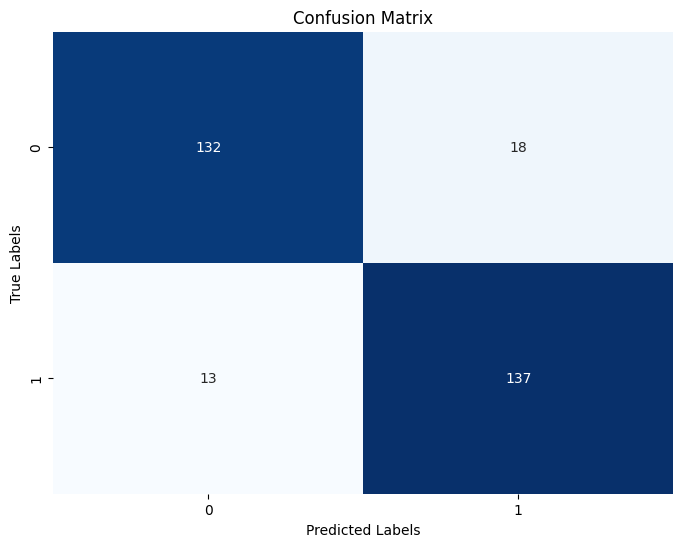

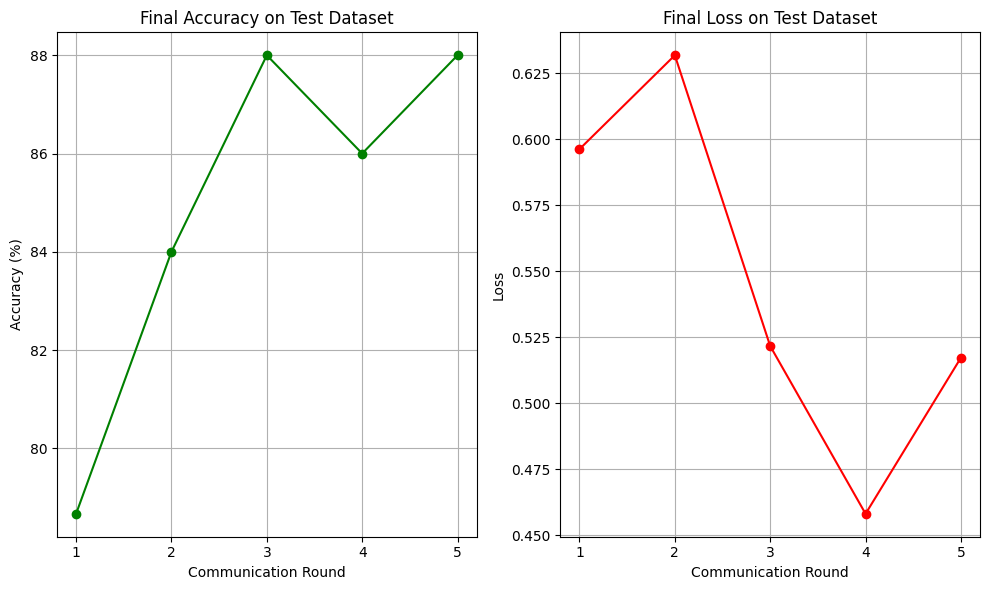

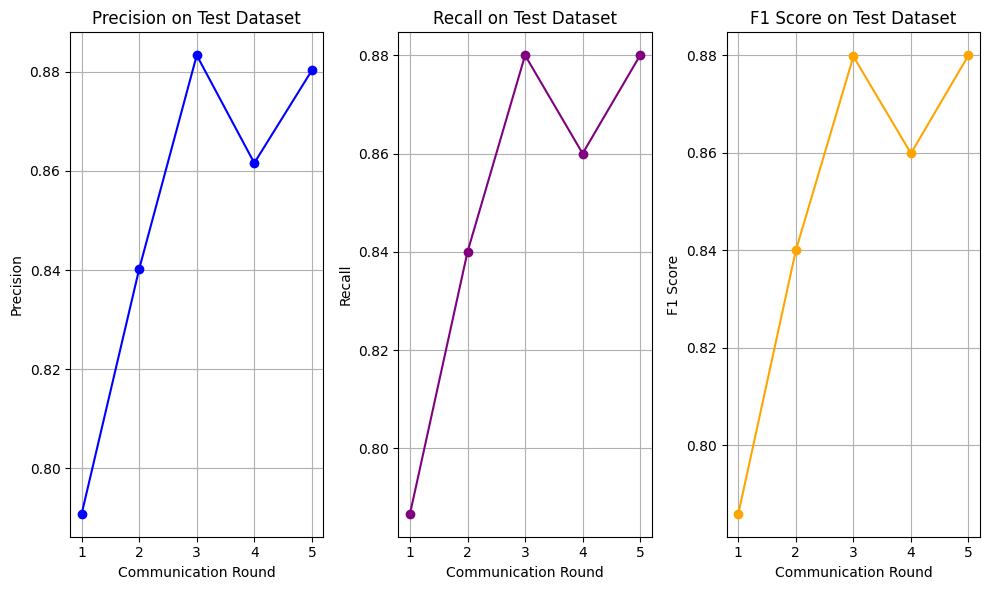

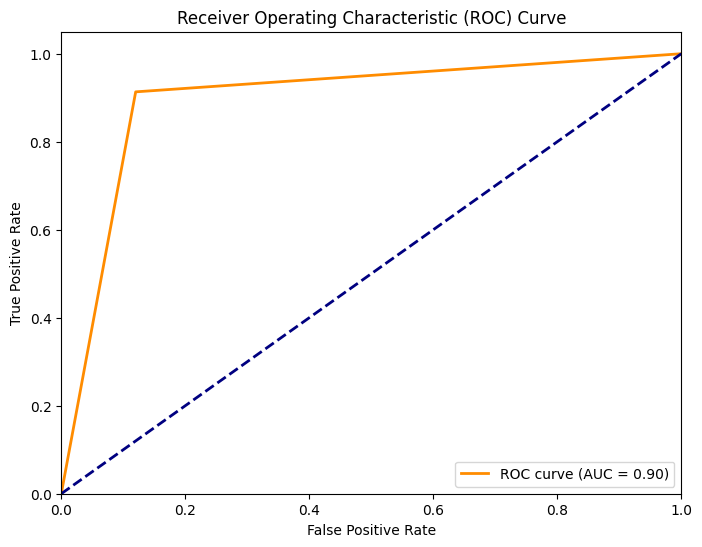

In [10]:
import csv
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# Define the number of communication rounds and clients
num_communication_rounds = 5
num_clients = 10
num_epochs_per_round = 100
num_classes = 2 

# Lists to store testing accuracy, final accuracy, final loss, precision, recall, and F1 score
testing_accuracies = []
final_accuracies = []
final_losses = []
precisions = []
recalls = []
f1_scores = []

# Open a CSV file for writing
csv_filename = 'output.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    # Create a CSV writer
    csv_writer = csv.writer(csvfile)

    # Write the header row
    csv_writer.writerow(['Round', 'Client', 'Epoch', 'Training Accuracy', 'Training Loss'])

    # Convert the train_dataset into a list of data points
    train_data_list = list(train_dataset)

    for round in range(num_communication_rounds):
        print(f"Communication Round {round + 1}")

        # Randomly assign data to clients for this round
        client_data = {}
        for i in range(num_clients):
            client_data[i] = random.sample(train_data_list, len(train_data_list) // num_clients)

        # Generate a random AES key using Fernet for this round
        key = Fernet.generate_key()
        cipher_suite = Fernet(key)

        client_models = []

        for client in range(num_clients):
            # Encrypt and send the global model to the client
            global_model_state = global_model.state_dict()
            global_model_encrypted = cipher_suite.encrypt(pickle.dumps(global_model_state))
            with open(f'global_model_encrypted_round_{round}_client_{client}.pkl', 'wb') as f:
                f.write(global_model_encrypted)

            # Client-side code (decrypt, train, and fine-tune)
            with open(f'global_model_encrypted_round_{round}_client_{client}.pkl', 'rb') as f:
                encrypted_data = f.read()
                decrypted_global_model_state = pickle.loads(cipher_suite.decrypt(encrypted_data))

            decrypted_global_model = mobilenet_v2(pretrained=False)
            decrypted_global_model.classifier[1] = torch.nn.Linear(decrypted_global_model.classifier[1].in_features, num_classes)
            decrypted_global_model.load_state_dict(decrypted_global_model_state)
            decrypted_global_model = decrypted_global_model.to(device)
            optimizer = optim.SGD(decrypted_global_model.parameters(), lr=0.01)

            print(f"Training Client {client}...")

            for epoch in tqdm(range(num_epochs_per_round), desc=f'Client {client}'):
                client_loader = DataLoader(client_data[client], batch_size=32, shuffle=True)
                total_train_loss = 0.0
                correct_train = 0
                total_train = 0

                for data, target in client_loader:
                    data, target = data.to(device), target.to(device)
                    optimizer.zero_grad()
                    outputs = decrypted_global_model(data)
                    loss = torch.nn.functional.cross_entropy(outputs, target)
                    loss.backward()
                    optimizer.step()

                    total_train_loss += loss.item()
                    _, predicted_train = outputs.max(1)
                    correct_train += predicted_train.eq(target).sum().item()
                    total_train += target.size(0)

                epoch_train_accuracy = 100 * correct_train / total_train
                epoch_train_loss = total_train_loss / len(client_loader)
                print(f'Training Accuracy for Client {client} - Epoch {epoch + 1}: {epoch_train_accuracy:.2f}%')
                print(f'Training Loss for Client {client} - Epoch {epoch + 1}: {epoch_train_loss:.4f}')

                # Write to CSV
                csv_writer.writerow([round + 1, client + 1, epoch + 1, epoch_train_accuracy, epoch_train_loss])


        # Evaluate the client model on the test dataset
            decrypted_global_model.eval()
            correct_test = 0
            total_test = 0
            test_loss = 0.0

            all_predictions = []
            all_targets = []

            with torch.no_grad():
                for data, target in test_dataset:
                    data, target = data.to(device), torch.tensor([target], dtype=torch.long).to(device)
                    outputs = decrypted_global_model(data.unsqueeze(0))
                    predictions = outputs.argmax()
                    correct_test += (predictions == target).item()

                    loss = torch.nn.functional.cross_entropy(outputs, target)
                    test_loss += loss.item()

                    all_predictions.append(predictions.item())
                    all_targets.append(target.item())

                    total_test += 1

            test_accuracy = 100 * correct_test / total_test
            avg_test_loss = test_loss / total_test

            # Calculate precision, recall, and F1 score for this round
            precision = precision_score(all_targets, all_predictions, average='weighted')
            recall = recall_score(all_targets, all_predictions, average='weighted')
            f1 = f1_score(all_targets, all_predictions, average='weighted')

            # Store metrics for each client
            client_testing_accuracies = [test_accuracy]
            client_testing_losses = [avg_test_loss]
            client_precisions = [precision]
            client_recalls = [recall]
            client_f1_scores = [f1]


            print(f'Testing Accuracy for Client {client}: {test_accuracy:.2f}%')
            print(f'Testing Loss for Client {client}: {avg_test_loss:.4f}')
            print(f'Precision for Client {client}: {precision:.4f}')
            print(f'Recall for Client {client}: {recall:.4f}')
            print(f'F1 Score for Client {client}: {f1:.4f}')

            decrypted_global_model.train()
            client_models.append(decrypted_global_model)

        # ... (Existing code)

        # Aggregate client models (simple model averaging)
        aggregated_model_state = {}
        for param_name in global_model.state_dict():
            aggregated_param = torch.stack([client.state_dict()[param_name].float() for client in client_models]).mean(dim=0)
            aggregated_model_state[param_name] = aggregated_param

        # Update the global model with the aggregated model
        global_model.load_state_dict(aggregated_model_state)

        # Store testing accuracy for this round
        testing_accuracies.append(client_testing_accuracies)

        # Append client-specific metrics to the overall lists
        final_accuracies.append(client_testing_accuracies[-1])  # Assuming you want the accuracy of the last client
        final_losses.append(client_testing_losses[-1])  # Assuming you want the loss of the last client
        precisions.append(client_precisions[-1])  # Assuming you want the precision of the last client
        recalls.append(client_recalls[-1])  # Assuming you want the recall of the last client
        f1_scores.append(client_f1_scores[-1])  # Assuming you want the F1 score of the last client

        # Save the final global model
        torch.save(global_model.state_dict(), f'final_global_model_round_{round}.pth')


# Save other relevant information
saved_data = {
    'num_communication_rounds': num_communication_rounds,
    'num_clients': num_clients,
    'num_epochs_per_round': num_epochs_per_round,
    'num_classes': num_classes,
    'testing_accuracies': testing_accuracies,
    'final_accuracies': final_accuracies,
    'final_losses': final_losses,
    'precisions': precisions,
    'recalls': recalls,
    'f1_scores': f1_scores,
}

with open('saved_data.pkl', 'wb') as f:
    pickle.dump(saved_data, f)

# Evaluate the final global model on the test dataset
global_model.eval()
correct = 0
total = 0
final_loss = 0.0
all_predictions = []
all_targets = []

with torch.no_grad():
    for data, target in test_dataset:
        data, target = data.to(device), torch.tensor([target], dtype=torch.long).to(device)
        outputs = global_model(data.unsqueeze(0))
        predictions = outputs.argmax()
        correct += (predictions == target).item()

        loss = torch.nn.functional.cross_entropy(outputs, target)
        final_loss += loss.item()

        all_predictions.append(predictions.item())
        all_targets.append(target.item())

        total += 1

final_accuracy = 100 * correct / total
avg_final_loss = final_loss / total
precision = precision_score(all_targets, all_predictions, average='weighted')
recall = recall_score(all_targets, all_predictions, average='weighted')
f1 = f1_score(all_targets, all_predictions, average='weighted')
conf_matrix = confusion_matrix(all_targets, all_predictions)
roc_fpr, roc_tpr, _ = roc_curve(all_targets, all_predictions)
roc_auc = auc(roc_fpr, roc_tpr)

print(f'Final Accuracy on Test Dataset: {final_accuracy:.2f}%')
print(f'Final Loss on Test Dataset: {avg_final_loss:.4f}')
print(f'Precision on Test Dataset: {precision:.4f}')
print(f'Recall on Test Dataset: {recall:.4f}')
print(f'F1 Score on Test Dataset: {f1:.4f}')



# Save the final global model and other evaluation results
torch.save(global_model.state_dict(), 'final_global_model.pth')

# Save other relevant evaluation results
evaluation_results = {
    'final_accuracy': final_accuracy,
    'avg_final_loss': avg_final_loss,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'conf_matrix': conf_matrix,
    'roc_fpr': roc_fpr,
    'roc_tpr': roc_tpr,
    'roc_auc': roc_auc,
}

with open('evaluation_results.pkl', 'wb') as f:
    pickle.dump(evaluation_results, f)


# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting the final accuracy and loss on the test dataset
plt.figure(figsize=(10, 6))

# Plotting final accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_communication_rounds + 1), final_accuracies, marker='o', color='green')
plt.title('Final Accuracy on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting final loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_communication_rounds + 1), final_losses, marker='o', color='red')
plt.title('Final Loss on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Loss')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting precision, recall, and F1 score for each round
plt.figure(figsize=(10, 6))

# Plotting precision
plt.subplot(1, 3, 1)
plt.plot(range(1, num_communication_rounds + 1), precisions, marker='o', color='blue')
plt.title('Precision on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Precision')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting recall
plt.subplot(1, 3, 2)
plt.plot(range(1, num_communication_rounds + 1), recalls, marker='o', color='purple')
plt.title('Recall on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Recall')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting F1 score
plt.subplot(1, 3, 3)
plt.plot(range(1, num_communication_rounds + 1), f1_scores, marker='o', color='orange')
plt.title('F1 Score on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('F1 Score')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(roc_fpr, roc_tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

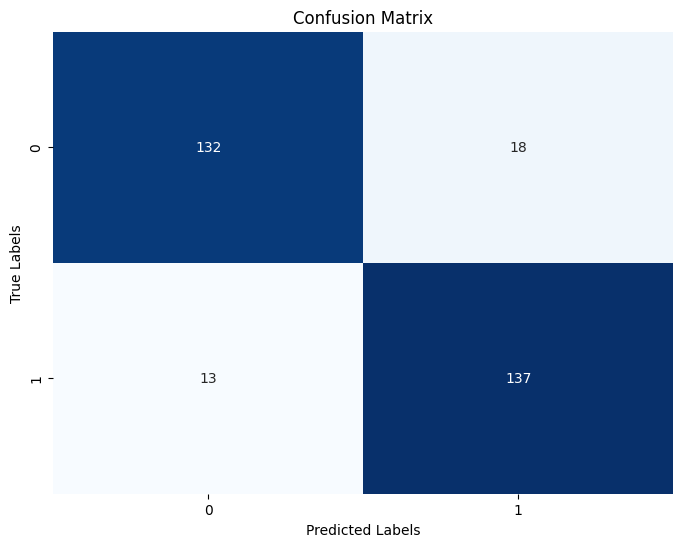

In [11]:
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix figure
plt.savefig('confusion_matrix.png')
plt.show()

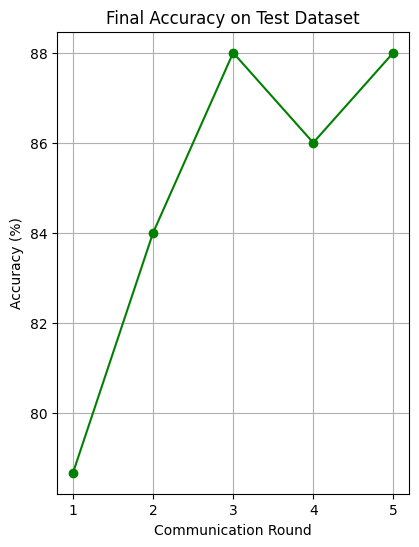

In [12]:
# Plotting the final accuracy and loss on the test dataset
plt.figure(figsize=(10, 6))

# Plotting final accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_communication_rounds + 1), final_accuracies, marker='o', color='green')
plt.title('Final Accuracy on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Save the final accuracy figure
plt.savefig('final_accuracy.png')
plt.show()

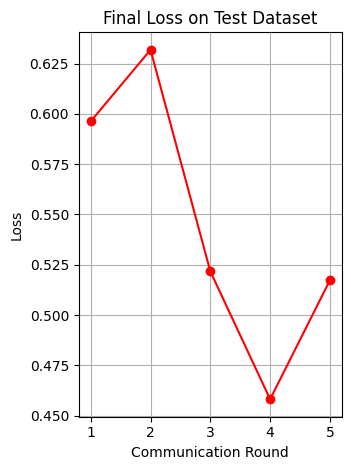

In [13]:
# Plotting final loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_communication_rounds + 1), final_losses, marker='o', color='red')
plt.title('Final Loss on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Loss')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Save the final loss figure
plt.savefig('final_loss.png')
plt.tight_layout()
plt.show()

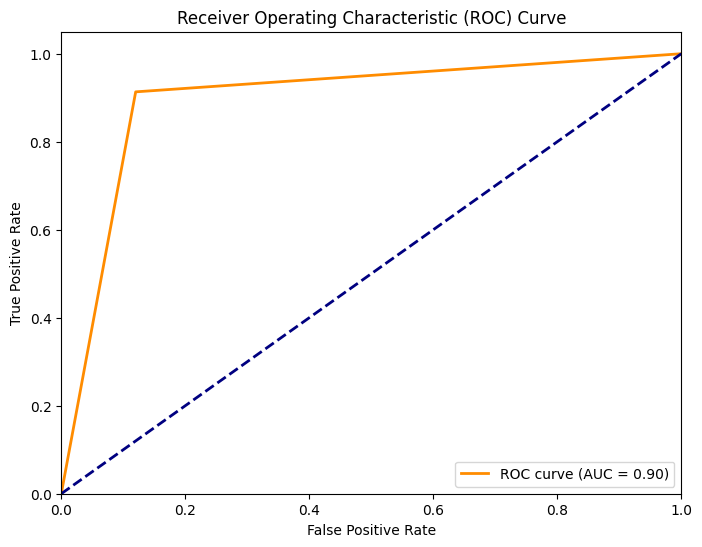

In [14]:
# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(roc_fpr, roc_tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save the ROC curve figure
plt.savefig('roc_curve.png')
plt.show()

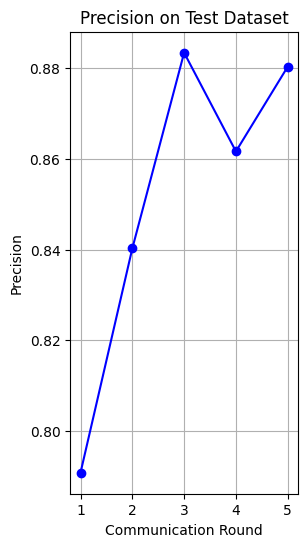

In [15]:
# Plotting precision, recall, and F1 score for each round
plt.figure(figsize=(10, 6))

# Plotting precision
plt.subplot(1, 3, 1)
plt.plot(range(1, num_communication_rounds + 1), precisions, marker='o', color='blue')
plt.title('Precision on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Precision')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Save the ROC curve figure
plt.savefig('Precision on test dataset')
plt.show()

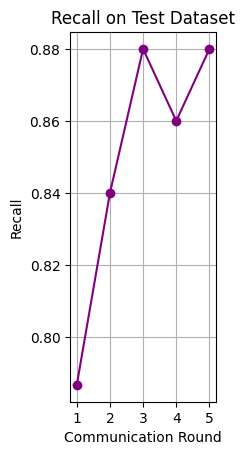

In [16]:
# Plotting recall
plt.subplot(1, 3, 2)
plt.plot(range(1, num_communication_rounds + 1), recalls, marker='o', color='purple')
plt.title('Recall on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Recall')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)


# Save the ROC curve figure
plt.savefig('Recall on test dataset')
plt.show()

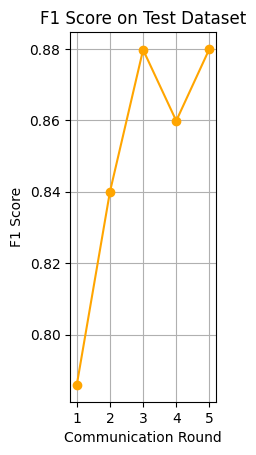

In [17]:
# Plotting F1 score
plt.subplot(1, 3, 3)
plt.plot(range(1, num_communication_rounds + 1), f1_scores, marker='o', color='orange')
plt.title('F1 Score on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('F1 Score')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Save the ROC curve figure
plt.savefig('F1 Score on test dataset')
plt.show()

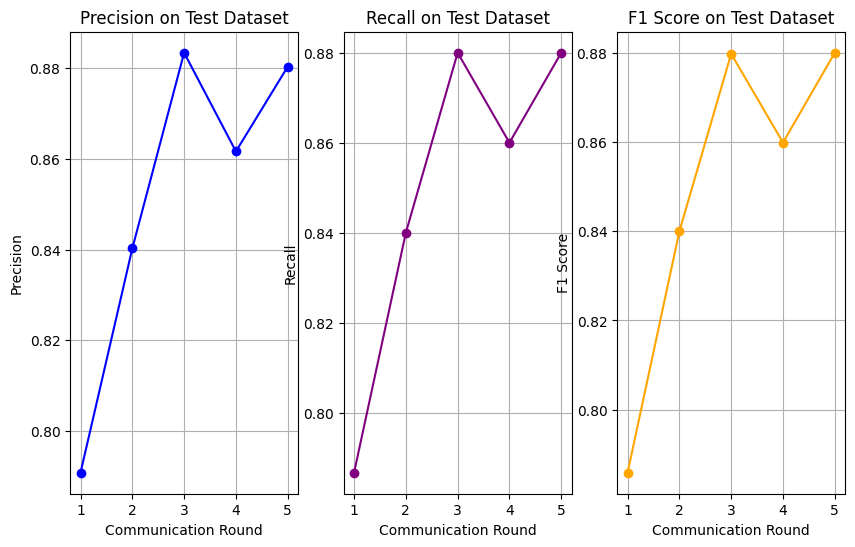

In [18]:
# Plotting precision, recall, and F1 score for each round
plt.figure(figsize=(10, 6))

# Plotting precision
plt.subplot(1, 3, 1)
plt.plot(range(1, num_communication_rounds + 1), precisions, marker='o', color='blue')
plt.title('Precision on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Precision')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting recall
plt.subplot(1, 3, 2)
plt.plot(range(1, num_communication_rounds + 1), recalls, marker='o', color='purple')
plt.title('Recall on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Recall')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting F1 score
plt.subplot(1, 3, 3)
plt.plot(range(1, num_communication_rounds + 1), f1_scores, marker='o', color='orange')
plt.title('F1 Score on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('F1 Score')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)


# Save the ROC curve figure
plt.savefig('Precision, Recall and F1 Score on test dataset')
plt.show()

In [21]:
from IPython.display import HTML
import os
import torch
from torchvision.models import mobilenet_v2

# Assuming 'model' is your PyTorch model
model = mobilenet_v2(pretrained=False)
model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, num_classes)

# Save the model to the working directory
torch.save(model.state_dict(), 'final_global_model_mobilenetv2.pth')

# Verify that the file is in the working directory
print(os.listdir())

# Optionally, you can generate a download link
output_file = 'final_global_model_mobilenetv2.pth'
output_link = f'<a href="{output_file}" download="{output_file}">Download {output_file}</a>'
display(HTML(output_link))


['global_model_encrypted_round_0_client_5.pkl', 'global_model_encrypted_round_3_client_3.pkl', 'final_global_model_round_0.pth', 'final_global_model_resnet50.pth', 'global_model_encrypted_round_1_client_0.pkl', 'global_model_encrypted_round_4_client_5.pkl', 'global_model_encrypted_round_1_client_4.pkl', 'global_model_encrypted_round_4_client_2.pkl', 'global_model_encrypted_round_3_client_4.pkl', '.virtual_documents', 'global_model_encrypted_round_2_client_7.pkl', 'Recall on test dataset.png', 'output.csv', 'final_global_model_round_2.pth', 'global_model_encrypted_round_1_client_7.pkl', 'global_model_encrypted_round_0_client_0.pkl', 'global_model_encrypted_round_1_client_1.pkl', 'global_model_encrypted_round_4_client_9.pkl', 'global_model_encrypted_round_3_client_7.pkl', 'global_model_encrypted_round_4_client_4.pkl', 'final_accuracy.png', 'Precision, Recall and F1 Score on test dataset.png', 'final_global_model_round_4.pth', 'global_model_encrypted_round_0_client_9.pkl', 'global_model_e